# LAC stranded assets

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tkr
import matplotlib.patches as mpatches

#import matplotlib as matplotlib
#import geopandas as gpd
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('font',**{'family':'serif','serif':['Times']})

In [382]:
## Figures parameters
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.facecolor'] = '#f0f0f0'
#plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams["axes.grid"] = False
plt.rcParams["grid.color"] = '#f0f0f0'
plt.rcParams["legend.frameon"] = False
plt.rcParams["figure.figsize"] = (10,7)

# Dictionaries

In [383]:
## Energy types on extended balance database to fuel types in emissions database (EIA)
dict_1 = pd.read_csv('../dictionary/energy_types_in_balances_to_fossil_fuel_types_emissions.csv', sep= ',', squeeze='true')

In [384]:
## Energy types on ENERDATA (Energy_1) database to fuel types in emissions database (EIA)
dict_2 = pd.read_csv('../dictionary/energy_types_in_enerdata_to_fossil_fuel_emissions.csv', sep= ',', squeeze='true')
#dict_2

In [385]:
## Technologies's lifespan sensitivity analysis
#dict_3 = pd.read_csv('../dictionary/lifespan_technologies_sensitivity.csv', sep= ',', squeeze='true')
#dict_3

In [386]:
## Technologies's technical lifespan
dict_3 = pd.read_csv('../dictionary/lifespan_technologies.csv', sep= ',', squeeze='true')
dict_3

,Product,lifespan
0,Natural gas,35
1,Hydro,75
2,Oil,32
3,"Coal, peat and oil shale",37
4,Wind,20
5,Solar photovoltaics,25
6,Nuclear,50
7,Memo: Renewables,0
8,Other renewables,0
9,NaN,0


In [387]:
## Technologies's payback time
#dict_3 = pd.read_csv('../dictionary/lifespan_technologies_META_world_bank.csv', sep= ',', squeeze='true')
#dict_3

In [388]:
## Technologies's lifespan
#dict_3 = pd.read_csv('../dictionary/lifespan_technologies1.csv', sep= ',', squeeze='true')
#dict_3

In [389]:
## Colors dictionary
color_dict_type_product = pd.read_csv('../dictionary/color_dict_type_product.csv', header=None, index_col=0, squeeze=True).to_dict()
#color_dict_type_product

In [390]:
## Dictionary metadatos 1.5 database
metadatos_iamc15 = pd.read_csv('../dictionary/metadatos_1.5_pathways_1.csv', sep= ',', squeeze='true')
metadatos_iamc15

,Unnamed: 0,model,scenario,exclude,category,subcategory,Kyoto-GHG|2010 (SAR),baseline,marker,reference,...,final energy|2100,carbon price|2030,carbon price|2030 (NPV),carbon price|2050,carbon price|2050 (NPV),carbon price|2100,carbon price|2100 (NPV),carbon price|Avg NPV (2030-2100),carbon price|AC NPV (2030-2100),carbon price|CC NPV (2030-2100)
0,0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,False,1.5C low overshoot,Lower 1.5C low overshoot,in range,ADVANCE_NoPolicy,NaN,"Luderer et al., 2018; Vrontisi et al., 2018",...,524.002100,297.638330,182.724116,1690.352070,391.109349,1476.668490,29.794704,206.719281,206.872724,208.136058
1,1,AIM/CGE 2.0,ADVANCE_2020_Med2C,False,Higher 2C,Higher 2C,in range,ADVANCE_NoPolicy,NaN,"Luderer et al., 2018; Vrontisi et al., 2018",...,589.935700,218.414900,134.087802,139.203790,32.208618,183.520370,3.702886,32.263834,29.550868,30.453452
2,2,AIM/CGE 2.0,ADVANCE_2020_WB2C,False,Lower 2C,Lower 2C,in range,ADVANCE_NoPolicy,NaN,"Luderer et al., 2018; Vrontisi et al., 2018",...,526.083200,219.346820,134.659920,411.949010,95.315711,893.296470,18.024021,81.658363,80.272387,81.143671
3,3,AIM/CGE 2.0,ADVANCE_2030_Med2C,False,Above 2C,Above 2C,in range,ADVANCE_NoPolicy,NaN,"Luderer et al., 2018; Vrontisi et al., 2018",...,576.909400,67.547260,41.468158,255.948220,59.220646,262.330310,5.293032,39.573620,39.425827,39.713369
4,4,AIM/CGE 2.0,ADVANCE_2030_Price1.5C,False,Lower 2C,Lower 2C,in range,ADVANCE_NoPolicy,NaN,"Luderer et al., 2018; Vrontisi et al., 2018",...,510.248200,78.647030,48.282454,1690.352070,391.109349,1476.668490,29.794704,196.304787,199.706876,200.067236
5,5,AIM/CGE 2.0,ADVANCE_2030_WB2C,False,Lower 2C,Lower 2C,in range,ADVANCE_NoPolicy,NaN,"Luderer et al., 2018; Vrontisi et al., 2018",...,504.793100,67.547260,41.468158,910.600460,210.692411,2468.867720,49.814284,154.550343,157.809959,157.941556
6,6,AIM/CGE 2.0,ADVANCE_INDC,False,Above 2C,Above 2C,in range,ADVANCE_NoPolicy,NaN,"Luderer et al., 2018; Vrontisi et al., 2018",...,556.169800,73.212150,44.945909,71.059450,16.441554,279.202000,5.633452,15.312615,14.603906,14.882751
7,7,AIM/CGE 2.0,ADVANCE_NoPolicy,False,Above 2C,Above 2C,in range,NaN,NaN,"Luderer et al., 2018; Vrontisi et al., 2018",...,718.962900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,AIM/CGE 2.0,ADVANCE_Reference,False,Above 2C,Above 2C,in range,ADVANCE_NoPolicy,NaN,"Luderer et al., 2018; Vrontisi et al., 2018",...,719.956500,10.881200,6.680113,10.896820,2.521278,10.232530,0.206462,1.940158,1.812148,1.857372
9,9,AIM/CGE 2.0,SFCM_SSP2_Bio_1p5Degree,False,Lower 2C,Lower 2C,in range,SFCM_SSP2_Bio_Baseline,NaN,"Liu et al., 2018",...,482.009600,342.263500,210.120099,802.001100,185.564968,1697.874700,34.257977,143.323093,141.631176,142.969300


In [391]:
## Pathway consistent
pathways_consistent = pd.read_csv('../excel_from_dead_on_arrival/pathways_ipcc_consistent_1.5_2.csv', sep= ',', squeeze='true')
pathways_consistent

,subcategory,pathway_group
0,Below 1.5C (II),1.5C° consistent
1,Higher 1.5C low overshoot,1.5C° consistent
2,Lower 1.5C high overshoot,1.5C° consistent
3,Lower 2C,2C° consistent
4,Higher 2C,2C° consistent
5,Higher 1.5C high overshoot,1.5C° consistent
6,Lower 1.5C low overshoot,1.5C° consistent
7,Above 2C,NaN
8,no-climate-assessment,NaN
9,reference,NaN


In [392]:
# Dictionary short names country
dict_short_names_country = {'Plurinational State of Bolivia':'Bolivia', 'Bolivarian Republic of Venezuela':'Venezuela'}

In [393]:
## LAC countries in ENERDATA
countries_lac        = list(['Costa Rica', 'Dominican Republic', 'Guatemala', 'Jamaica', 'Mexico', 'Panama', 'El Salvador', 'Trinidad and Tobago',
                             'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador','Peru', 'Paraguay', 'Uruguay', 'Venezuela'])
criterion_lac_enerdata = lambda row: row['Country'] in countries_lac ## criterion for filter countries LAC in ENERDATA

In [394]:
## ALL LAC countries
countries_lac_all = list(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia','Dominican Republic', 'Ecuador', 'Jamaica', 'Mexico', 'Panama', 'Paraguay', 'Peru',
                            'Trinidad and Tobago', 'Uruguay', 'Venezuela','Costa Rica', 'Cuba', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Nicaragua', 'Other non-OECD Americas', 'Curaçao', 'Rest of LAC'])
criterion_lac_all = lambda row: row['Country'] in countries_lac_all  ## criterion for filter all countries LAC                      
## I delet from the list 
## Non-OECD Americas: Brazil, Venezuela, Colombia, Argentina, Trinidad and Tobago and Ecuador
## Other non-OECD Americas: Anguilla, Antigua and Barbuda, Aruba, Bahamas, BArbados, Belize, Bermuda, Bonaire, Virgin Island,
## Cayman Island, Domica, Malvinas, The French Guiana, Grenada, Guadalupe, Guyana, MArtinique, Monserrat, Puerto Rico, Saba,
## Saint Pierre and Miquelon, Saint Vincent and the Grenadines, Sint Maartem, Suriname, The Turks and Caicos Islands.

In [395]:
## Dictionaries pipeline
#dict_pipeline_construction = list(['Under construction'])
#dict_pipeline_construction_authorized = list(['Authorized', 'Under construction'])
#dict_pipeline_construction_authorized_bidding = list(['Authorized', 'Bidding process', 'Under construction'])
dict_pipeline_construction_authorized_bidding_announced = list(['Announced', 'Authorized', 'Bidding process', 'Under construction'])

#dict_pipeline = dict_pipeline_construction
#dict_pipeline = dict_pipeline_construction_authorized
#dict_pipeline = dict_pipeline_construction_authorized_bidding
dict_pipeline = dict_pipeline_construction_authorized_bidding_announced

unit_status_pipeline = lambda row: row['Unit_status'] in dict_pipeline #criterion for filtering pipeline

In [396]:
dict_pipeline

['Announced', 'Authorized', 'Bidding process', 'Under construction']

In [397]:
## Dictionary operational
dict_operational = list(['Operational', 'Synchronized'])
unit_status_operational = lambda row: row['Unit_status'] in dict_operational

In [398]:
## Dictionary extended balance
dict_balances_electricity_main = list(['Electricity output (GWh)-main activity producer electricity plants'])
balances_electricity_main = lambda row: row['Flow'] in dict_balances_electricity_main
#array(['Electricity output (GWh)',
#       'Electricity output (GWh)-main activity producer electricity plants',
#       'Electricity output (GWh)-autoproducer electricity plants',
#       'Electricity output (GWh)-main activity producer CHP plants',
#       'Electricity output (GWh)-autoproducer CHP plants'], dtype=object)
dict_balances_electricity_total = list(['Electricity output (GWh)'])
balances_electricity_total_output = lambda row: row['Flow'] in dict_balances_electricity_total

In [399]:
## Dictionary operational + pipeline
dict_pipeline_operational = list(['Announced', 'Authorized', 'Bidding process', 'Under construction', 'Operational', 'Synchronized'])
unit_status_pip_operational = lambda row: row['Unit_status'] in dict_pipeline_operational

# Databases

## Database 1:  Enerdata

In [400]:
df = pd.read_csv('../data_from_enerdata/export_enerdata_power_units_02-2019.csv', sep= ';', low_memory = False) ## Replace the space by _ in the columns's name
df.columns = [c.replace('(', '_') for c in df.columns] ## replace ( by _
df.columns = [c.replace(')', '_') for c in df.columns] ## replace ) by _
df.columns = [c.replace(' ', '_') for c in df.columns] ## replace the spaces by _
df.columns = [c.replace('__', '_') for c in df.columns] ## replace __ by _
df = df[df.apply(lambda row: row['Country'] in countries_lac_all, axis=1)] ## Selecting the rows which contain all the countries in latam
df['Energy_1'] = df['Energy_1'].map(dict_2.set_index('Energy_1')['energy_types_in_emissions']) ## Changing the product in enerdata by Dictionary dict_2
df.rename(columns={'Energy_1':'Product'}, inplace=True) ## Changing the name of the columns Energy_1 by Product to match with the other two databases (IEA)

In [401]:
#df.Plant_name.contains('auto', case=False, na=False)
#df[df['Unit_name'].str.contains("auto")]
#df.Plant_name.contains('auto', case=False, na=False)
#df[df['Plant_name'].str.contains("Las Minas")]

In [402]:
#df.query("Unit_status == 'Synchronized'").Net_capacity_MW_
#df.query("Product == 'Natural gas'").groupby(["Country", "Unit_status"])['Net_capacity_MW_'].sum()/1000

In [403]:
#df.query("Unit_status == 'Synchronized'").Net_capacity_MW_
#df.query("Product == 'Natural gas'").query("Country== 'Jamaica'")

In [404]:
#Changing the status of the Id == '99627' since the year of commissioning is 2019 and the status is operational
df.loc[227,'Unit_status'] = 'Announced'
## Information source https://www.fmo.nl/project-detail/52107

In [405]:
#df.query("Id == '99627'")

In [406]:
df.query("Product == ['Oil', 'Natural gas','Coal, peat and oil shale' ]").query("Unit_status == 'Operational'")

,Id,Zone,Country,Plant_name,Unit_name,Unit_status,Operator,Construction's_begin,Date_of_Commissioning_from,Date_of_Commissioning_to,...,Load_factor_2009_%_,Load_factor_2010_%_,Load_factor_2011_%_,Load_factor_2012_%_,Load_factor_2013_%_,Load_factor_2014_%_,Load_factor_2015_%_,Load_factor_2016_%_,Load_factor_2017_%_,Load_factor_2018_%_
7,4601,Latin America,Costa Rica,Barranca,Barranca,Operational,ICE,NaN,1974-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,82064,Latin America,Costa Rica,Caldera,Caldera,Operational,Energy International,NaN,2004-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,4597,Latin America,Costa Rica,Garabito,Garabito,Operational,ICE,NaN,2010-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,82065,Latin America,Costa Rica,Gualipes-Energy International,Gualipes-Energy International,Operational,Energy International,NaN,2004-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,82066,Latin America,Costa Rica,Gualipes-ICE,Gualipes-ICE,Operational,ICE,NaN,2008-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,4603,Latin America,Costa Rica,Moin 2,Moin 2,Operational,ICE,NaN,1991-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,82062,Latin America,Costa Rica,Moin 3,Moin 3,Operational,ICE,NaN,2003-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,82063,Latin America,Costa Rica,Orotina,Orotina,Operational,ICE,NaN,2008-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,4600,Latin America,Costa Rica,San Antonio,San Antonio,Operational,ICE,NaN,1973-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,4592,Latin America,Costa Rica,San José,San José,Operational,Energy International,NaN,2008-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Database 2: Extended world energy balances
Unit: GWh

This table contains an extended set of data on the energy supply, trade and consumption of coal, oil, energy output, gas, 
electricity, heat, combustible renewables and waste.

In [407]:
balances = pd.read_csv('../data_from_EIA/WBIG_30012019211107029.csv', sep= ',')
##pd.DataFrame(balances.query("Flow == 'Electricity output (GWh)'").Product.unique().tolist()).to_csv('../dictionary/categories_products_balance.csv') ##List of the product in the balance
balances['Product'] = balances['Product'].map(dict_1.set_index('Product')['Emissions']) ## Changing the product in enerdata by Dictionary dict_2
balances = balances.replace({'Country':dict_short_names_country}).query("Measure == 'TJ'")
balances = (balances[balances.apply(balances_electricity_main, axis=1)]) ## activate in case to consider main activity producer

In [408]:
electricity_country_product_web_TWh = (balances[balances.apply(criterion_lac_all, axis=1)]).query("Product == ['Coal, peat and oil shale', 'Natural gas', 'Oil']").query("Time == '2016'").set_index(
["Country", "Product"])['Value'].sum(level=["Country", "Product"])/1000
electricity_country_product_web_TWh
#.to_csv('../paper/electricity_TWh_2016_balances.csv')

Country             Product                 
Argentina           Coal, peat and oil shale      1.843
                    Natural gas                  64.673
                    Oil                          20.373
Bolivia             Coal, peat and oil shale      0.000
                    Natural gas                   7.157
                    Oil                           0.192
Brazil              Coal, peat and oil shale     21.094
                    Natural gas                  45.205
                    Oil                           4.258
Chile               Coal, peat and oil shale     30.350
                    Natural gas                  11.339
                    Oil                           2.239
Colombia            Coal, peat and oil shale      5.395
                    Natural gas                  11.036
                    Oil                           2.060
Costa Rica          Coal, peat and oil shale      0.000
                    Natural gas                   0.000
   

## Database 4: Electricity generation from dashboard ENERDATA (fuel-based)

In [409]:
## Electricity by country and product in 2017 DASHBOARD ENERDATA
electricity_country_prod_enerdata_dashboard_TWh = (pd.read_csv('../data_from_enerdata/electricity_country_prod_enerdata_dashboard_TWh.csv')).set_index(["Country", "Product"])['Electricity_generation_GWh'].sum(level=["Country", "Product"])
electricity_country_prod_enerdata_dashboard_TWh
electricity_dashboard_TWh = electricity_country_prod_enerdata_dashboard_TWh.reset_index()
#.to_csv('../paper/electricity_TWh_2016_dashboard.csv')
electricity_dashboard_TWh

,Country,Product,Electricity_generation_GWh
0,Argentina,"Coal, peat and oil shale",2.545
1,Argentina,Natural gas,75.356
2,Argentina,Oil,20.961
3,Bolivia,"Coal, peat and oil shale",0.000
4,Bolivia,Natural gas,7.157
5,Bolivia,Oil,0.192
6,Brazil,"Coal, peat and oil shale",25.745
7,Brazil,Natural gas,56.484
8,Brazil,Oil,15.279
9,Chile,"Coal, peat and oil shale",30.231


## Database 3: IEA CO2 emissions from fuel combustion statistics
Unit: million tonnes of CO₂

CO2 emissions database 2017 (Ano base = 2016), Datos desde 2006 hasta 2017, Last update 11/20/2018

In [410]:
IEA_CO2_by_product_and_flow = pd.read_csv('../data_from_EIA/CO2_19112018224046173.csv', sep= ',')
IEA_CO2_by_product_and_flow['Product'] = IEA_CO2_by_product_and_flow['Product'].map({'"Coal, peat and oil shale"': "Coal, peat and oil shale", 'Oil': 'Oil', 'Other': 'Other', 'Natural gas': 'Natural gas', 'Total': 'Total'}) ##Change the double "" by ""
IEA_CO2_by_product_and_flow = IEA_CO2_by_product_and_flow.replace({'Country':dict_short_names_country}) ## Replace the countries Venezuela and Bolivia
IEA_CO2_by_product_and_flow_lac_enerdata = IEA_CO2_by_product_and_flow[IEA_CO2_by_product_and_flow.apply(criterion_lac_enerdata, axis=1)] ## Select countries in LAC ENERDATA
IEA_CO2_by_product_and_flow_lac_all      = IEA_CO2_by_product_and_flow[IEA_CO2_by_product_and_flow.apply(criterion_lac_all, axis=1)] ## Select countries in ALL LAC countries
#IEA_CO2_by_product_and_flow_lac_all

In [411]:
IEA_CO2_by_product_and_flow = pd.read_csv('../data_from_EIA/CO2_19112018224046173.csv', sep= ',')
IEA_CO2_by_product_and_flow['Product'] = IEA_CO2_by_product_and_flow['Product'].map({'"Coal, peat and oil shale"': "Coal, peat and oil shale", 'Oil': 'Oil', 'Other': 'Other', 'Natural gas': 'Natural gas', 'Total': 'Total'}) ##Change the double "" by ""
IEA_CO2_by_product_and_flow = IEA_CO2_by_product_and_flow.replace({'Country':dict_short_names_country}) ## Replace the countries Venezuela and Bolivia
IEA_CO2_by_product_and_flow

,COUNTRY,Country,PRODUCT,Product,FLOW,Flow,TIME,Time,Value,Flag Codes,Flags
0,WLD,World,COAL,"Coal, peat and oil shale",OTHEN,Other energy industry own use,2006,2006,289.7,NaN,NaN
1,WLD,World,COAL,"Coal, peat and oil shale",OTHEN,Other energy industry own use,2007,2007,331.8,NaN,NaN
2,WLD,World,COAL,"Coal, peat and oil shale",OTHEN,Other energy industry own use,2008,2008,338.0,NaN,NaN
3,WLD,World,COAL,"Coal, peat and oil shale",OTHEN,Other energy industry own use,2009,2009,362.3,NaN,NaN
4,WLD,World,COAL,"Coal, peat and oil shale",OTHEN,Other energy industry own use,2010,2010,408.0,NaN,NaN
5,WLD,World,COAL,"Coal, peat and oil shale",OTHEN,Other energy industry own use,2011,2011,419.6,NaN,NaN
6,WLD,World,COAL,"Coal, peat and oil shale",OTHEN,Other energy industry own use,2012,2012,426.6,NaN,NaN
7,WLD,World,COAL,"Coal, peat and oil shale",OTHEN,Other energy industry own use,2013,2013,432.2,NaN,NaN
8,WLD,World,COAL,"Coal, peat and oil shale",OTHEN,Other energy industry own use,2014,2014,400.8,NaN,NaN
9,WLD,World,COAL,"Coal, peat and oil shale",OTHEN,Other energy industry own use,2015,2015,363.0,NaN,NaN


In [460]:
## CO2 emissions (Million ton CO2) by country and product LAC all year 2016
CO2emissions_electricity_and_heat_generation_lac_all_2016 = IEA_CO2_by_product_and_flow_lac_all.query("Flow=='Electricity and heat production' & Time=='2016' & Product != 'Total'").set_index(["Country", "Product"])['Value'].sum(level=["Country", "Product"])
#CO2emissions_electricity_and_heat_generation_lac_all_2016.reset_index().query("Country == 'Jamaica'")
CO2emissions_electricity_and_heat_generation_lac_all_2016.groupby('Country').sum()
#.to_csv('../paper/emission_electricity_heat_2016.csv')

Country
Argentina                   55.2
Bolivia                      4.6
Brazil                      69.6
Chile                       35.1
Colombia                    16.9
Costa Rica                   0.1
Cuba                        11.1
Dominican Republic          11.6
Ecuador                      7.6
El Salvador                  1.6
Guatemala                    5.1
Haiti                        1.0
Honduras                     3.4
Jamaica                      2.8
Mexico                     148.8
Nicaragua                    1.6
Other non-OECD Americas     11.9
Panama                       2.6
Paraguay                     0.0
Peru                        13.7
Trinidad and Tobago          5.8
Uruguay                      0.3
Venezuela                   33.9
Name: Value, dtype: float64

## Database 4: CO2 emissions from dashboard ENERDATA (fuel-based)

In [413]:
CO2emissions_country_enerdata_dashboard_tCO2 = (pd.read_csv('../data_from_enerdata/CO2emissions_country_enerdata_dashboard_tCO2.csv')).set_index(["Country", "Product"])['CO2_emissions_tCO2'].sum(level=["Country", "Product"])
CO2emissions_country_enerdata_dashboard_tCO2.to_csv('../paper/emissions_electricity_2016_dashboard.csv')

In [414]:
(CO2emissions_electricity_and_heat_generation_lac_all_2016*1000/electricity_country_product_web_TWh).unstack('Product').to_csv('../paper/emissionfactor_EIA_balances.csv')

In [415]:
(CO2emissions_country_enerdata_dashboard_tCO2*1000/electricity_country_prod_enerdata_dashboard_TWh).unstack('Product').to_csv('../paper/emissionfactor_dashboard.csv')

## Database 5: IAMC 1.5C scenarios full database


In [416]:
#iamc_1_5 = pd.read_excel('../IAMC1_5/iamc15_scenario_data_all_regions_r1.xlsx')
#iamc_1_5.to_csv('../IAMC1_5/iamc15_scenario_data_all_regions_r1.csv')
#iamc15 = pd.read_csv('../IAMC1_5/iamc15_scenario_data_all_regions_r1-saved-into-csv-from-excel.csv')

## IAMC release 1.1
#iamc_1_5 = pd.read_excel('../IAMC1_5/iamc15_scenario_data_all_regions_r1.1.xlsx', sheet_name="data")
#iamc_1_5.to_csv('../IAMC1_5/iamc15_scenario_data_all_regions_r1.1-saved-into-csv-from-excel.csv')
iamc15 = pd.read_csv('../IAMC1_5/iamc15_scenario_data_all_regions_r1.1-saved-into-csv-from-excel.csv')

In [417]:
iamc15.head()

,Model,Scenario,Region,Variable,Unit,2000,2001,2002,2003,2004,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Biomass,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1212.41,NaN,NaN,NaN,NaN,1214.83
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Coal,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,261.30,NaN,NaN,NaN,NaN,260.46
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Gas,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,185.87,NaN,NaN,NaN,NaN,188.51
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Geothermal,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.93,NaN,NaN,NaN,NaN,13.62
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Hydro,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,406.20,NaN,NaN,NaN,NaN,410.24


## Quick stats of the data


In [418]:
# Generators by unit status
## How many generators by product
total_generators = df.groupby(['Product','Unit_status'])["Unit_status"].count().sum()
thermal_generators = df.query("Category == 'Thermal'").query("Product != 'Other renewables'").groupby(['Category', 'Unit_status'])['Unit_status'].count().sum()
thermal_generators_operational = df.query("Product == ['Coal, peat and oil shale', 'Oil', 'Natural gas']").query("Unit_status == ['Operational', 'Synchronized']").groupby(['Category', 'Unit_status'])['Unit_status'].count().sum()
thermal_generators_pipeline = df.query("Product == ['Coal, peat and oil shale', 'Oil', 'Natural gas']").query("Unit_status == ['Authorized', 'Announced', 'Bidding process', 'Under construction']").groupby(['Category', 'Unit_status'])['Unit_status'].count().sum()

print("The power plant tracker reports {a} generators, which {b} are thermal-based units {c}%".format(a=total_generators, b=thermal_generators, c= ((thermal_generators/total_generators)*100).round(2)))
print("The operational fuel-based generators reported are {d}".format(d=thermal_generators_operational))
print("The pipeline fuel-based generators reported are {e}".format(e=thermal_generators_pipeline))


The power plant tracker reports 14816 generators, which 5048 are thermal-based units 34.07%
The operational fuel-based generators reported are 4146
The pipeline fuel-based generators reported are 456


In [419]:
capacity_thermal_generators_operational = (df.query("Product == ['Coal, peat and oil shale', 'Oil', 'Natural gas']").query("Unit_status == ['Operational', 'Synchronized']").groupby(['Product', 'Country'])['Net_capacity_MW_'].sum()/1000)
print("The capacity of fossil-based installed capacity is {a} GW".format(a=capacity_thermal_generators_operational.sum().round(2)))

The capacity of fossil-based installed capacity is 169.36 GW


In [420]:
thermal_generators_pipeline_capacity = df.query("Product == ['Coal, peat and oil shale', 'Oil', 'Natural gas']").query("Unit_status == ['Authorized', 'Announced', 'Bidding process', 'Under construction']").groupby(['Country','Product'])['Net_capacity_MW_'].sum()/1000
print("The planned pipeline includes {a} GW of capacity to be installed, which rougly represents {b}% of the fossil-based current installed capacity in the region".format(a=thermal_generators_pipeline_capacity.round(2).sum(), b=thermal_generators_pipeline_capacity.sum()/capacity_thermal_generators_operational.sum()*100))

The planned pipeline includes 102.47999999999999 GW of capacity to be installed, which rougly represents 60.48854500834061% of the fossil-based current installed capacity in the region


In [421]:
print("The capacity of fossil-based installed capacity is {a} GW".format(a=capacity_thermal_generators_operational.sum().round(2)))

The capacity of fossil-based installed capacity is 169.36 GW


In [422]:
capacity_thermal_generators_operational.reset_index().sort_values(by = 'Net_capacity_MW_', ascending=False)

,Product,Country,Net_capacity_MW_
17,Natural gas,Mexico,43.94804
9,Natural gas,Argentina,23.02006
21,Natural gas,Venezuela,15.63800
11,Natural gas,Brazil,13.41298
24,Oil,Brazil,10.53870
33,Oil,Mexico,6.70283
6,"Coal, peat and oil shale",Mexico,5.95800
12,Natural gas,Chile,5.71247
2,"Coal, peat and oil shale",Chile,4.90451
18,Natural gas,Peru,4.46006


In [423]:
thermal_generators_pipeline_capacity.reset_index().sort_values(by = 'Net_capacity_MW_', ascending=False)

,Country,Product,Net_capacity_MW_
4,Brazil,Natural gas,38.15704
20,Mexico,Natural gas,21.80792
7,Chile,Natural gas,6.71340
0,Argentina,Natural gas,5.54366
26,Venezuela,Natural gas,5.15500
23,Panama,Natural gas,4.95862
3,Brazil,"Coal, peat and oil shale",4.78673
6,Chile,"Coal, peat and oil shale",3.39500
9,Colombia,"Coal, peat and oil shale",3.01090
2,Bolivia,Natural gas,1.75600


In [424]:
thermal_generators_pipeline_capacity.reset_index().groupby(['Country'])['Net_capacity_MW_'].sum().reset_index().sort_values(by = 'Net_capacity_MW_', ascending=False)

,Country,Net_capacity_MW_
2,Brazil,43.79901
10,Mexico,22.32479
3,Chile,10.77390
11,Panama,6.25559
0,Argentina,5.62966
13,Venezuela,5.15500
4,Colombia,3.54290
1,Bolivia,1.75600
5,Dominican Republic,1.16300
12,Peru,0.77680


In [425]:
## Capacity by country and status from ENERDATA
capacity_country_status_GW = ((df[df.apply(unit_status_pip_operational, axis=1)]).groupby(["Country",'Unit_status'])['Net_capacity_MW_'].sum())/1000
capacity_country_status_GW.sum()

797.3321799999999

In [426]:
## Operational capacity by country and product
capacity_country_operational_GW = ((df.query("Unit_status == 'Operational'").set_index(["Country", "Product"])['Net_capacity_MW_'].sum(level=["Country","Product"]))/1000)
capacity_country_operational_GW.reset_index().query("Product == 'Natural gas'")

,Country,Product,Net_capacity_MW_
5,Dominican Republic,Natural gas,1.46350
18,Jamaica,Natural gas,0.21800
23,Mexico,Natural gas,43.94804
41,Trinidad and Tobago,Natural gas,2.38560
42,Argentina,Natural gas,23.02006
52,Bolivia,Natural gas,1.56067
60,Brazil,Natural gas,13.41298
70,Chile,Natural gas,5.71247
72,Colombia,Natural gas,2.97295
80,Ecuador,Natural gas,0.67600


In [427]:
capacity_country_operational_GW.sum()

418.2609000000001

In [428]:
capacity_country_operational_GW.reset_index().query("Product == 'Coal, peat and oil shale'").query("Country == 'Argentina'")

,Country,Product,Net_capacity_MW_
49,Argentina,"Coal, peat and oil shale",0.5


In [429]:
(0.94062/capacity_country_operational_GW.sum())*100

0.224888341224341

In [430]:
capacity_country_operational_GW.reset_index().query("Product == 'Natural gas'").query("Country == 'Jamaica'")

,Country,Product,Net_capacity_MW_
18,Jamaica,Natural gas,0.218


In [431]:
(0.218/capacity_country_operational_GW.sum())*100

0.052120578328024435

In [432]:
df.query("Country == 'Argentina'").query("Unit_status == 'Operational'").query("Product == 'Coal, peat and oil shale'")['Net_capacity_MW_']

3125     75.0
3127     75.0
3128    350.0
Name: Net_capacity_MW_, dtype: float64

### Electricity output

#### By country

In [433]:
## Electricity by country in 2016 ENERDATA (Power plan Tracker)
electricity_country_enerdata_TWh = (df.query("Unit_status == 'Operational'").set_index(["Country"])['Production_2016_GWh_'].sum(level=["Country"]))/1000
electricity_country_enerdata_TWh.sum()

1027.936198491643

In [434]:
## Electricity by country in 2016 EXTENDED WORLD ENERGY BALANCES (All technologies)
electricity_country_web_TWh = (balances[balances.apply(criterion_lac_all, axis=1)]).query("Time == '2016' & Product != 'Total' & Product != 'Memo: Renewables'").set_index(
["Country"])['Value'].sum(level=["Country"])/1000
electricity_country_web_TWh.sum()

1252.4340000000002

In [435]:
## Electricity by country in 2017 Dashboard (Only coal, oil and natural gas)
#electricity_dashboard_TWh.sum(axis=1).sum()

In [436]:
## Electricity by country in 2016 EXTENDED WORLD ENERGY BALANCES 
electricity_country_web_TWh_historical = (balances[balances.apply(criterion_lac_all, axis=1)]).query("Product != 'Total' & Product != 'Memo: Renewables'").set_index(["Time", "Product"])['Value'].sum(level=["Time", "Product"])/1000
electricity_country_web_TWh_historical = electricity_country_web_TWh_historical.reset_index().pivot_table('Value', index='Time', columns='Product')
#.plot.bar(stacked=True)
total_electricity_year=electricity_country_web_TWh_historical.sum(axis=1)
electricity_country_web_TWh_historical=electricity_country_web_TWh_historical.loc[:, (electricity_country_web_TWh_historical != 0).any(axis=0)]
electricity_country_web_TWh_historical

Product,Biofuels and renewable wastes,"Coal, peat and oil shale",Geothermal,Hydro,Natural gas,Nuclear,Oil,Solar photovoltaics,Wind
Time,,,,,,,,,
2009,1.055,105.544,10.134,603.388,214.416,31.619,71.227,0.001,2.162
2010,1.298,111.404,9.892,621.746,245.151,27.573,70.211,0.000,3.330
2011,1.552,117.215,9.840,665.453,244.690,32.119,71.375,0.005,4.351
2012,2.206,135.954,9.535,650.682,270.498,31.203,73.576,0.073,9.172
2013,2.863,145.179,10.049,626.457,305.031,33.457,74.834,0.246,11.608
2014,2.939,138.639,10.017,614.319,323.690,30.811,74.685,0.761,19.584
2015,3.313,139.327,10.148,596.379,343.172,33.450,75.200,2.188,31.500
2016,3.750,132.579,9.994,627.644,325.502,34.716,69.587,4.173,44.489
2017,1.142,21.606,0.000,352.313,53.639,15.739,3.706,0.650,42.352


In [437]:
share_electricity_country_web_TWh_historical = electricity_country_web_TWh_historical.apply(lambda s:s/ total_electricity_year)

In [438]:
## Share TOTAL electricity generation reported by enerdata/extended world balances (by country)
electricity_country_enerdata_TWh.sum()/electricity_country_web_TWh.sum()

0.8207507928494777

In [439]:
## Share electricity generation reported by enerdata/extended world balances (by country)
electricity_country_enerdata_TWh/electricity_country_web_TWh

Country
Argentina              0.884440
Bolivia                0.800828
Brazil                 0.970620
Chile                  0.029055
Colombia               0.871539
Costa Rica             0.000000
Cuba                        NaN
Dominican Republic     0.000000
Ecuador                0.000000
El Salvador            0.000000
Guatemala              0.775828
Haiti                       NaN
Honduras                    NaN
Jamaica                0.000000
Mexico                 1.141807
Nicaragua                   NaN
Panama                 0.752851
Paraguay               0.000000
Peru                   0.940145
Trinidad and Tobago         NaN
Uruguay                     NaN
Venezuela                   NaN
dtype: float64

In [440]:
electricity_country_web_TWh

Country
Argentina             133.020
Bolivia                 9.110
Brazil                480.359
Chile                  72.129
Colombia               67.508
Costa Rica             10.709
Cuba                   19.509
Dominican Republic     15.487
Ecuador                21.749
El Salvador             5.243
Guatemala              11.539
Haiti                   0.874
Honduras                8.209
Jamaica                 2.452
Mexico                266.110
Nicaragua               4.000
Panama                 10.853
Paraguay               63.770
Peru                   49.804
Name: Value, dtype: float64

In [441]:
df.Production_2016_GWh_.sum()/1000000

1.0294944792850294

#### By country and product

In [442]:
electricity_country_prod_enerdata_TWh_colombia = df.query("Unit_status == 'Operational'").query("Country == 'Colombia'").query("Product == 'Oil'")[['Country', 'Plant_name', 'Production_2016_GWh_', 'Net_capacity_MW_']]
electricity_country_prod_enerdata_TWh_colombia['Production_2016_GWh_'].sum()/1000
#.to_excel('../data_from_enerdata/colombia_test.xlsx')

1.2022840000000001

In [443]:
electricity_country_prod_enerdata_TWh_argentina = df.query("Unit_status == 'Operational'").query("Country == 'Argentina'").query("Product == 'Coal, peat and oil shale'")[['Country', 'Plant_name', 'Production_2016_GWh_', 'Net_capacity_MW_']]
#electricity_country_prod_enerdata_TWh_colombia.to_excel('../data_from_enerdata/argentina_test.xlsx')

In [444]:
## Electricity by country and product in 2016 ENERDATA
electricity_country_prod_enerdata_TWh = ((df.query("Unit_status == 'Operational'").set_index(["Country", "Product"])['Production_2016_GWh_'].sum(level=["Country", "Product"]))/1000)
electricity_country_prod_enerdata_TWh.sum()
#lectricity_country_prod_enerdata_TWh.dropna().reset_index().query("Country == 'Colombia'")

1027.8098784916438

In [445]:
electricity_country_prod_web_TWh_2016 = ((balances[balances.apply(criterion_lac_all, axis=1)]).query("Time == '2016' & Product != 'Total' & Product != 'Memo: Renewables'").set_index(["Product"])['Value'].sum(level=["Product"])/1000)
electricity_country_prod_web_TWh_2016.sum()

1252.434

In [446]:
## Electricity by country and product in 2016 EXTENDED WORLD ENERGY BALANCES 
electricity_country_prod_web_TWh = ((balances[balances.apply(criterion_lac_all, axis=1)]).query("Time == '2016' & Product != 'Total' & Product != 'Memo: Renewables'").set_index(
["Country", "Product"])['Value'].sum(level=["Country", "Product"])/1000)
electricity_country_prod_web_TWh

Country    Product                      
Argentina  Coal, peat and oil shale          1.843
           Patent fuel                       0.000
           Natural gas                      64.673
           Oil                              20.373
           Other                             0.000
           Biofuels and renewable wastes     0.000
           Electricity and heat              0.000
           Nuclear                           8.285
           Hydro                            37.278
           Geothermal                        0.000
           Solar photovoltaics               0.014
           Solar thermal                     0.000
           Wind                              0.554
Bolivia    Coal, peat and oil shale          0.000
           Patent fuel                       0.000
           Natural gas                       7.157
           Oil                               0.192
           Other                             0.000
           Biofuels and renewable wastes 

In [447]:
## Question 16 reviewer 2

In [448]:
electricity_enerdata_fuel_based = electricity_country_prod_enerdata_TWh.reset_index().query('Product in ["Oil", "Natural gas", "Coal, peat and oil shale"]').rename(columns={'Production_2016_GWh_':'Electricity_generation_GWh'})
electricity_enerdata_fuel_based.sum(axis=1).sum()

450.1671233869332

In [458]:
electricity_enerdata_fuel_based.groupby('Country').sum().to_excel('../results_exported/electricity_enerdata_fuel_based.xlsx')

In [68]:
#electricity_enerdata_fuel_based = electricity_country_prod_enerdata_TWh.reset_index().query('Product in ["Oil", "Natural gas", "Coal, peat and oil shale"]').sum(axis=1).sum()
share_PPT_dashboard = electricity_enerdata_fuel_based.sum(axis=1).sum()/electricity_dashboard_TWh.sum(axis=1).sum()
share_PPT_dashboard

0.6763876927919832

In [69]:
electricity_dashboard_TWh.sum(axis=1).sum()

665.5459999999999

In [70]:
print(" Electricity in PPT represents {a}% out of the dasboard".format(a=share_PPT_dashboard*100))

 Electricity in PPT represents 67.63876927919831% out of the dasboard


In [459]:
electricity_dashboard_TWh.groupby('Country').sum().to_excel('../results_exported/electricity_dashboard_TWh.xlsx')

In [71]:
electricity_country_prod_enerdata_dashboard_TWh.reset_index().query("Country == 'Argentina'")

,Country,Product,Electricity_generation_GWh
0,Argentina,"Coal, peat and oil shale",2.545
1,Argentina,Natural gas,75.356
2,Argentina,Oil,20.961


In [ ]:
## Calculating the share between PPT ENERDARA and word balances

In [361]:
## Share electricity generation reported by PPT ENERDATA/extended world balances (by country and product)
(electricity_country_prod_enerdata_TWh/electricity_country_prod_web_TWh).dropna()

Country      Product                 
Argentina    Coal, peat and oil shale      1.380901
             Hydro                         0.736887
             Natural gas                   1.165185
             Nuclear                       0.926649
             Oil                           1.028862
             Solar photovoltaics           1.018571
             Wind                          0.986949
Bolivia      Hydro                         0.653081
             Natural gas                   1.000000
             Oil                           1.000000
             Wind                          0.997429
Brazil       Coal, peat and oil shale      1.220489
             Hydro                         0.919667
             Natural gas                   1.249508
             Nuclear                       0.943675
             Oil                           3.588304
             Solar photovoltaics           1.066334
             Wind                          0.957719
Chile        Coal, peat an

In [73]:
## Share electricity generation reported by Dashboard ENERDATA/PPT ENERDATA (by country and product)
share_electricity_enerdata_dashboard = (((electricity_country_prod_enerdata_dashboard_TWh/electricity_country_prod_enerdata_TWh).dropna()))
print("The numbers less than 1 represent the electricity in the PPT is greater than the dashboard, so I have to scale down these values")

The numbers less than 1 represent the electricity in the PPT is greater than the dashboard, so I have to scale down these values


In [74]:
electricity_country_prod_enerdata_TWh/electricity_country_prod_enerdata_dashboard_TWh

Country              Product                 
Argentina            Coal, peat and oil shale    0.722637
                     Hydro                            NaN
                     Natural gas                 1.038554
                     Nuclear                          NaN
                     Oil                         0.081433
                     Other renewables                 NaN
                     Solar photovoltaics              NaN
                     Wind                             NaN
Bolivia              Coal, peat and oil shale         NaN
                     Hydro                            NaN
                     Natural gas                 0.844990
                     Oil                         0.463698
                     Other renewables                 NaN
                     Solar photovoltaics              NaN
                     Wind                             NaN
Brazil               Coal, peat and oil shale    0.508392
                     Hydro

In [75]:
share_electricity_enerdata_dashboard

Country              Product                 
Argentina            Coal, peat and oil shale     1.383822
                     Natural gas                  0.962878
                     Oil                         12.280099
Bolivia              Natural gas                  1.183447
                     Oil                          2.156576
Brazil               Coal, peat and oil shale     1.966988
                     Natural gas                  1.442325
                     Oil                          1.249067
Chile                Coal, peat and oil shale          inf
                     Natural gas                  5.651942
                     Oil                               inf
Colombia             Coal, peat and oil shale     1.117064
                     Natural gas                  1.760206
                     Oil                          3.390214
Costa Rica           Oil                               inf
Dominican Republic   Coal, peat and oil shale          inf
          

### Scaling down the electricity output in df when exceed the dashboard

In [76]:
## Filter countries with more electricity reported in the Tracker than in the Dashboard ENERDATA (by country and product) (Replace when the ratio is if by nan)
condition_enerdata_greater_dashboard = share_electricity_enerdata_dashboard[share_electricity_enerdata_dashboard < 1].replace([np.inf, -np.inf], np.nan).to_frame().rename(columns = {0:'extra_share'}).reset_index(drop = False)
#condition_enerdata_greater_dashboard['extra_share'] = condition_enerdata_greater_dashboard['extra_share']
condition_enerdata_greater_dashboard

,Country,Product,extra_share
0,Argentina,Natural gas,0.962878
1,Mexico,"Coal, peat and oil shale",0.909477
2,Mexico,Natural gas,0.978596
3,Uruguay,Natural gas,0.000000


In [77]:
df.sample(2)

,Id,Zone,Country,Plant_name,Unit_name,Unit_status,Operator,Construction's_begin,Date_of_Commissioning_from,Date_of_Commissioning_to,...,Load_factor_2009_%_,Load_factor_2010_%_,Load_factor_2011_%_,Load_factor_2012_%_,Load_factor_2013_%_,Load_factor_2014_%_,Load_factor_2015_%_,Load_factor_2016_%_,Load_factor_2017_%_,Load_factor_2018_%_
11471,88478,Latin America,Brazil,Verace IV,Verace IV,Operational,Eólica Geribatu,NaN,2015-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31.0,37.32,40.49,NaN
12937,149940,Latin America,Colombia,CA - UNIVERSAL STREAM,CAA,Bidding process,UNIVERSAL STREAM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
## Merge df with condition_enerdata_greater_dashboard by country and product (create a new column)
df = df.merge(condition_enerdata_greater_dashboard, on = ["Country", "Product"], how = "left")
#.rename(columns = {'Production_2016_(GWh)':'electricity_output_2016'})
df.columns

Index(['Id', 'Zone', 'Country', 'Plant_name', 'Unit_name', 'Unit_status',
       'Operator', 'Construction's_begin', 'Date_of_Commissioning_from',
       'Date_of_Commissioning_to', 'Date_of_Decommissioning_from',
       'Date_of_Decommissioning_to', 'Category', 'Product', 'Energy_2',
       'Energy_3', 'Technology', 'Sub_Energy_1', 'Sub_Energy_2',
       'Sub_Energy_3', 'Sub-techno.', 'CHP', 'CCS', 'Barge', 'Desalination',
       'Net_capacity_MW_', 'City', 'City_Latitude', 'City_Longitude',
       'CAPEX_USDm_', 'Date_of_financing', 'Production_2007_GWh_',
       'Production_2008_GWh_', 'Production_2009_GWh_', 'Production_2010_GWh_',
       'Production_2011_GWh_', 'Production_2012_GWh_', 'Production_2013_GWh_',
       'Production_2014_GWh_', 'Production_2015_GWh_', 'Production_2016_GWh_',
       'Production_2017_GWh_', 'Production_2018_GWh_', 'Load_factor_2007_%_',
       'Load_factor_2008_%_', 'Load_factor_2009_%_', 'Load_factor_2010_%_',
       'Load_factor_2011_%_', 'Load_factor_2

In [79]:
## Multiply by df.extra_share to discount the extra electricity output reported in the tracker
df["Production_2016_GWh_"] = np.where(df.extra_share.isnull(), df.Production_2016_GWh_, (df.Production_2016_GWh_*df.extra_share))

In [80]:
df.head(2)

,Id,Zone,Country,Plant_name,Unit_name,Unit_status,Operator,Construction's_begin,Date_of_Commissioning_from,Date_of_Commissioning_to,...,Load_factor_2010_%_,Load_factor_2011_%_,Load_factor_2012_%_,Load_factor_2013_%_,Load_factor_2014_%_,Load_factor_2015_%_,Load_factor_2016_%_,Load_factor_2017_%_,Load_factor_2018_%_,extra_share
0,39352,Latin America,Costa Rica,Aeroenergía,Aeroenergía,Operational,PRIV-CAP1,NaN,1998-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,94798,Latin America,Costa Rica,Altamira Globeleq,Altamira Globeleq,Operational,Globeleq Mesoamerica Energy,2016-01-01,2017-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking the calculation 

In [81]:
## Electricity by country and product in 2016 ENERDATA
electricity_country_prod_enerdata_TWh = ((df.query("Unit_status == 'Operational'").set_index(["Country", "Product"])['Production_2016_GWh_'].sum(level=["Country", "Product"]))/1000)
electricity_country_prod_enerdata_TWh

Country             Product                 
Costa Rica          Wind                          0.000000
                    Hydro                         0.000000
                    Oil                           0.000000
                    Other renewables              0.000000
                    Solar photovoltaics           0.000000
Dominican Republic  Natural gas                   0.000000
                    Hydro                         0.000000
                    Coal, peat and oil shale      0.000000
                    Oil                           0.000000
                    Wind                          0.000000
                    Solar photovoltaics           0.000000
Guatemala           Hydro                         3.798761
                    Oil                           0.843865
                    Other renewables              1.909300
                    Coal, peat and oil shale      2.172912
                    Solar photovoltaics           0.012371
           

In [82]:
## Share electricity ENERDATA dashboard
share_electricity_enerdata_dashboard = (((electricity_country_prod_enerdata_dashboard_TWh/electricity_country_prod_enerdata_TWh).dropna()))
share_electricity_enerdata_dashboard

Country              Product                 
Argentina            Coal, peat and oil shale     1.383822
                     Natural gas                  1.000000
                     Oil                         12.280099
Bolivia              Natural gas                  1.183447
                     Oil                          2.156576
Brazil               Coal, peat and oil shale     1.966988
                     Natural gas                  1.442325
                     Oil                          1.249067
Chile                Coal, peat and oil shale          inf
                     Natural gas                  5.651942
                     Oil                               inf
Colombia             Coal, peat and oil shale     1.117064
                     Natural gas                  1.760206
                     Oil                          3.390214
Costa Rica           Oil                               inf
Dominican Republic   Coal, peat and oil shale          inf
          

### Scaling up the electricity output in df when is less than the dashboard

In [83]:
##capacity factor
capacity_factor = (electricity_country_prod_enerdata_TWh/electricity_country_prod_enerdata_dashboard_TWh).dropna()
## capacity_factor>1, scaling down the electricity output in PPT ENERDATA; capacity_factor=1, any to to; capacity_factor<1, scale up the electricity output in PPT ENERDATA
capacity_factor

Country              Product                 
Argentina            Coal, peat and oil shale    0.722637
                     Natural gas                 1.000000
                     Oil                         0.081433
Bolivia              Natural gas                 0.844990
                     Oil                         0.463698
Brazil               Coal, peat and oil shale    0.508392
                     Natural gas                 0.693325
                     Oil                         0.800597
Chile                Coal, peat and oil shale    0.000000
                     Natural gas                 0.176930
                     Oil                         0.000000
Colombia             Coal, peat and oil shale    0.895204
                     Natural gas                 0.568115
                     Oil                         0.294967
Costa Rica           Oil                         0.000000
Dominican Republic   Coal, peat and oil shale    0.000000
                     Natur

In [84]:
## condition_enerdata_less_dashboard (countries and products fulfill the condition capacity factor > 0 y < 1)
countries_condition_capacity_factor = capacity_factor.to_frame().reset_index().rename(columns = {0:'capacity_factor'}).query("capacity_factor > 0").query("capacity_factor < 0.99999999999")

In [85]:
countries_condition_capacity_factor

,Country,Product,capacity_factor
0,Argentina,"Coal, peat and oil shale",0.722637
2,Argentina,Oil,0.081433
3,Bolivia,Natural gas,0.844990
4,Bolivia,Oil,0.463698
5,Brazil,"Coal, peat and oil shale",0.508392
6,Brazil,Natural gas,0.693325
7,Brazil,Oil,0.800597
9,Chile,Natural gas,0.176930
11,Colombia,"Coal, peat and oil shale",0.895204
12,Colombia,Natural gas,0.568115


In [86]:
## capacity (MW) units which have capacity reported but not electricity output
capacity_country_operational_TW_units_electricity_nan = df.query("Unit_status == 'Operational'").query("Production_2016_GWh_ == 'NaN'").set_index(["Country", "Product"])['Net_capacity_MW_'].sum(level=["Country","Product"])/1000000
capacity_country_operational_TW_units_electricity_nan.reset_index().query("Country == 'Colombia'")

,Country,Product,Net_capacity_MW_
63,Colombia,Hydro,0.001584
64,Colombia,Natural gas,0.000667
65,Colombia,"Coal, peat and oil shale",0.000290
66,Colombia,Other renewables,0.000076
67,Colombia,Solar photovoltaics,0.000010


In [87]:
(electricity_country_prod_enerdata_dashboard_TWh-electricity_country_prod_enerdata_TWh).reset_index().query("Country == 'Colombia'")

,Country,Product,0
30,Colombia,"Coal, peat and oil shale",0.650785
31,Colombia,Hydro,NaN
32,Colombia,Natural gas,6.882084
33,Colombia,Oil,2.873716
34,Colombia,Other renewables,NaN
35,Colombia,Solar photovoltaics,NaN
36,Colombia,Wind,NaN


In [88]:
factor = ((electricity_country_prod_enerdata_dashboard_TWh-electricity_country_prod_enerdata_TWh)/capacity_country_operational_TW_units_electricity_nan).reset_index().rename(columns = {0:'utilization_factor'})

In [89]:
factor.dropna()

,Country,Product,utilization_factor
2,Argentina,Natural gas,7.958677e-12
4,Argentina,Oil,6.351970e+04
10,Bolivia,Natural gas,3.278011e+03
11,Bolivia,Oil,1.039366e+03
15,Brazil,"Coal, peat and oil shale",1.660539e+04
17,Brazil,Natural gas,6.167608e+03
19,Brazil,Oil,5.845387e+02
23,Chile,"Coal, peat and oil shale",6.163919e+03
25,Chile,Natural gas,1.824826e+03
26,Chile,Oil,1.125162e+03


In [90]:
## Merge df with condition_enerdata_less_dashboard by country and product (create a new column)
utilization_rate_countries_fill_condition = countries_condition_capacity_factor.merge(factor, on = ["Country", "Product"], how = "left")

In [91]:
utilization_rate_countries_fill_condition

,Country,Product,capacity_factor,utilization_factor
0,Argentina,"Coal, peat and oil shale",0.722637,NaN
1,Argentina,Oil,0.081433,63519.701567
2,Bolivia,Natural gas,0.844990,3278.010873
3,Bolivia,Oil,0.463698,1039.366105
4,Brazil,"Coal, peat and oil shale",0.508392,16605.386763
5,Brazil,Natural gas,0.693325,6167.608167
6,Brazil,Oil,0.800597,584.538713
7,Chile,Natural gas,0.176930,1824.825880
8,Colombia,"Coal, peat and oil shale",0.895204,2243.312651
9,Colombia,Natural gas,0.568115,10319.514170


In [92]:
## Merge df with condition_enerdata_greater_dashboard by country and product (create a new column)
df = df.merge(utilization_rate_countries_fill_condition[['Country', 'Product', 'utilization_factor']], on = ["Country", "Product"], how = "left")

In [93]:
##Verify utilization rate is only in the rows with oil, gas and coal 
df.query("utilization_factor != 'NaN'").Product.unique()
#df.query("Production_2016_GWh_ != 'NaN'")['Production_2016_GWh_']
#loc[df['Production_2016_GWh_'] == 'NaN']

array(['Oil', 'Coal, peat and oil shale', 'Natural gas'], dtype=object)

In [94]:
df.utilization_factor.unique()

array([           nan, 7.13751363e+02, 3.08330262e+04, 3.47418278e+03,
       3.33333334e-01, 6.35197016e+04, 3.27801087e+03, 1.03936610e+03,
       5.84538713e+02, 1.66053868e+04, 6.16760817e+03, 1.82482588e+03,
       1.03195142e+04, 2.24331265e+03, 3.57802075e+03, 1.16447663e+03,
       1.04084375e+05])

In [95]:
#df["Production_2016_GWh_"] = np.where(df.Production_2016_GWh_.isnull() & df.utilization_factor.notnull(),  df.Net_capacity_MW_*df.utilization_factor, df.Production_2016_GWh_)
df["Production_2016_GWh_"] = np.where(df.Production_2016_GWh_.isnull() & df.utilization_factor.notnull(),  df.Net_capacity_MW_/1000*df.utilization_factor, df.Production_2016_GWh_)

In [96]:
df.loc[12993]

Id                                         109281
Zone                                Latin America
Country                                  Colombia
Plant_name                             Dona Juana
Unit_name                              Dona Juana
Unit_status                               Stopped
Operator                        Biogas Dona Juana
Construction's_begin                          NaN
Date_of_Commissioning_from             2016-12-31
Date_of_Commissioning_to                      NaN
Date_of_Decommissioning_from           2017-12-31
Date_of_Decommissioning_to                    NaN
Category                                  Thermal
Product                          Other renewables
Energy_2                                      NaN
Energy_3                                      NaN
Technology                                    NaN
Sub_Energy_1                                  NaN
Sub_Energy_2                                  NaN
Sub_Energy_3                                  NaN


#### Checking the calculation

In [97]:
## Electricity by country and product in 2016 ENERDATA
electricity_country_prod_enerdata_TWh = ((df.query("Unit_status == 'Operational'").set_index(["Country", "Product"])['Production_2016_GWh_'].sum(level=["Country", "Product"])))/1000
electricity_country_prod_enerdata_TWh.sample(5)

Country    Product                 
Peru       Other renewables             0.137682
Mexico     Coal, peat and oil shale    34.591000
           Oil                         33.926000
Chile      Natural gas                 11.845000
Argentina  Natural gas                 75.356000
Name: Production_2016_GWh_, dtype: float64

In [98]:
## Share electricity ENERDATA dashboard
share_electricity_enerdata_dashboard = (((electricity_country_prod_enerdata_dashboard_TWh/electricity_country_prod_enerdata_TWh).dropna()))
share_electricity_enerdata_dashboard

Country              Product                 
Argentina            Coal, peat and oil shale    1.383822
                     Natural gas                 1.000000
                     Oil                         1.000000
Bolivia              Natural gas                 1.000000
                     Oil                         1.000000
Brazil               Coal, peat and oil shale    1.000000
                     Natural gas                 1.000000
                     Oil                         1.000000
Chile                Coal, peat and oil shale         inf
                     Natural gas                 1.000000
                     Oil                              inf
Colombia             Coal, peat and oil shale    1.000000
                     Natural gas                 1.000000
                     Oil                         3.390214
Costa Rica           Oil                              inf
Dominican Republic   Coal, peat and oil shale         inf
                     Natur

### Scaling up the electricity output in df when is less than the dashboard (Case: No capacity operational missing)

In [99]:
share_electricity_enerdata_dashboard_capacity_full = share_electricity_enerdata_dashboard.reset_index().replace([np.inf, -np.inf], np.nan).rename(columns = {0:'extra_share_1'}).query("extra_share_1 > 1.0001")
share_electricity_enerdata_dashboard_capacity_full

,Country,Product,extra_share_1
0,Argentina,"Coal, peat and oil shale",1.383822
13,Colombia,Oil,3.390214
21,Guatemala,"Coal, peat and oil shale",1.822900
29,Peru,"Coal, peat and oil shale",1.068722


In [100]:
### Factor countries and products 
factor_1 = ((electricity_country_prod_enerdata_dashboard_TWh-electricity_country_prod_enerdata_TWh)/capacity_country_operational_GW).reset_index().rename(columns = {0:'utilization_factor_full_cap'}).dropna()

In [101]:
share_electricity_enerdata_dashboard_capacity_full = share_electricity_enerdata_dashboard_capacity_full.merge(factor_1, on = ["Country", "Product"], how = "left")

In [102]:
share_electricity_enerdata_dashboard_capacity_full

,Country,Product,extra_share_1,utilization_factor_full_cap
0,Argentina,"Coal, peat and oil shale",1.383822,1.411780
1,Colombia,Oil,3.390214,7.483635
2,Guatemala,"Coal, peat and oil shale",1.822900,3.058129
3,Peru,"Coal, peat and oil shale",1.068722,0.393439


In [103]:
## Merge df with condition_enerdata_greater_dashboard by country and product (create a new column)
df = df.merge(share_electricity_enerdata_dashboard_capacity_full[['Country', 'Product', 'utilization_factor_full_cap']], on = ["Country", "Product"], how = "left")

In [1]:
##df.query("utilization_factor_full_cap != 'NaN'")

In [105]:
df.utilization_factor_full_cap.isnull().loc[3106]

True

In [106]:
df["Production_2016_GWh_"] = np.where(df.utilization_factor_full_cap.isnull(), df.Production_2016_GWh_, (df.Production_2016_GWh_+(df.Net_capacity_MW_*df.utilization_factor_full_cap)))

In [107]:
df.loc[3106]

Id                                                93769
Zone                                      Latin America
Country                                       Argentina
Plant_name                      Saenz Pena (APR Energy)
Unit_name                       Saenz Pena (APR Energy)
Unit_status                                 Operational
Operator                                     APR Energy
Construction's_begin                                NaN
Date_of_Commissioning_from                   2008-12-31
Date_of_Commissioning_to                            NaN
Date_of_Decommissioning_from                        NaN
Date_of_Decommissioning_to                          NaN
Category                                        Thermal
Product                                             Oil
Energy_2                                            NaN
Energy_3                                            NaN
Technology                            Combustion engine
Sub_Energy_1                                    

In [108]:
df.loc[12875]

Id                                                171644
Zone                                       Latin America
Country                                            Chile
Plant_name                                          Ocoa
Unit_name                                           Ocoa
Unit_status                                  Operational
Operator                        Parque Fotovoltaico Ocoa
Construction's_begin                                 NaN
Date_of_Commissioning_from                    2018-12-31
Date_of_Commissioning_to                             NaN
Date_of_Decommissioning_from                         NaN
Date_of_Decommissioning_to                           NaN
Category                                      Renewables
Product                              Solar photovoltaics
Energy_2                                             NaN
Energy_3                                             NaN
Technology                                            PV
Sub_Energy_1                   

#### Checking the calculation

In [109]:
## Electricity by country and product in 2016 ENERDATA
electricity_country_prod_enerdata_TWh = ((df.query("Unit_status == 'Operational'").set_index(["Country", "Product"])['Production_2016_GWh_'].sum(level=["Country", "Product"])))/1000
electricity_country_prod_enerdata_TWh.sample(5)

Country             Product         
Bolivia             Wind                 0.03491
Argentina           Other renewables     0.13295
Dominican Republic  Oil                  0.00000
Brazil              Oil                 15.27900
Mexico              Wind                10.50654
Name: Production_2016_GWh_, dtype: float64

In [110]:
## Share electricity ENERDATA dashboard
share_electricity_enerdata_dashboard = (((electricity_country_prod_enerdata_dashboard_TWh/electricity_country_prod_enerdata_TWh).dropna()))
share_electricity_enerdata_dashboard

Country              Product                 
Argentina            Coal, peat and oil shale    1.000000
                     Natural gas                 1.000000
                     Oil                         1.000000
Bolivia              Natural gas                 1.000000
                     Oil                         1.000000
Brazil               Coal, peat and oil shale    1.000000
                     Natural gas                 1.000000
                     Oil                         1.000000
Chile                Coal, peat and oil shale         inf
                     Natural gas                 1.000000
                     Oil                              inf
Colombia             Coal, peat and oil shale    1.000000
                     Natural gas                 1.000000
                     Oil                         1.000000
Costa Rica           Oil                              inf
Dominican Republic   Coal, peat and oil shale         inf
                     Natur

### Filling up the electricity output in df with the dashboard (capacities reported in tracker)

In [111]:
share_electricity_enerdata_dashboard_no_electricity_ppk = share_electricity_enerdata_dashboard.reset_index().replace([np.inf, -np.inf], np.nan).rename(columns = {0:'expansion_factor'}).query("expansion_factor == 'NaN'")
share_electricity_enerdata_dashboard_no_electricity_ppk

,Country,Product,expansion_factor
8,Chile,"Coal, peat and oil shale",NaN
10,Chile,Oil,NaN
14,Costa Rica,Oil,NaN
15,Dominican Republic,"Coal, peat and oil shale",NaN
16,Dominican Republic,Natural gas,NaN
17,Dominican Republic,Oil,NaN
18,Ecuador,Natural gas,NaN
19,Ecuador,Oil,NaN
20,El Salvador,Oil,NaN
23,Jamaica,Oil,NaN


In [112]:
### Factor countries and products 
factor_2 = (electricity_country_prod_enerdata_dashboard_TWh/capacity_country_operational_GW).dropna().reset_index().rename(columns = {0:'share_no_electricity_ppk'}).dropna()

In [113]:
share_electricity_enerdata_dashboard_no_electricity_ppk = share_electricity_enerdata_dashboard_no_electricity_ppk.merge(factor_2, on = ["Country", "Product"], how = "left")

In [114]:
share_electricity_enerdata_dashboard_no_electricity_ppk

,Country,Product,expansion_factor,share_no_electricity_ppk
0,Chile,"Coal, peat and oil shale",NaN,6.163919
1,Chile,Oil,NaN,1.125162
2,Costa Rica,Oil,NaN,0.308307
3,Dominican Republic,"Coal, peat and oil shale",NaN,7.758291
4,Dominican Republic,Natural gas,NaN,2.614964
5,Dominican Republic,Oil,NaN,5.449889
6,Ecuador,Natural gas,NaN,4.085799
7,Ecuador,Oil,NaN,2.749316
8,El Salvador,Oil,NaN,3.279654
9,Jamaica,Oil,NaN,4.665404


In [115]:
## Merge df with condition share_electricity_enerdata_dashboard_no_electricity_ppk.share_no_electricity_ppk
df = df.merge(share_electricity_enerdata_dashboard_no_electricity_ppk[['Country', 'Product', 'share_no_electricity_ppk']], on = ["Country", "Product"], how = "left")

In [116]:
df.head()

,Id,Zone,Country,Plant_name,Unit_name,Unit_status,Operator,Construction's_begin,Date_of_Commissioning_from,Date_of_Commissioning_to,...,Load_factor_2013_%_,Load_factor_2014_%_,Load_factor_2015_%_,Load_factor_2016_%_,Load_factor_2017_%_,Load_factor_2018_%_,extra_share,utilization_factor,utilization_factor_full_cap,share_no_electricity_ppk
0,39352,Latin America,Costa Rica,Aeroenergía,Aeroenergía,Operational,PRIV-CAP1,NaN,1998-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,94798,Latin America,Costa Rica,Altamira Globeleq,Altamira Globeleq,Operational,Globeleq Mesoamerica Energy,2016-01-01,2017-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4608,Latin America,Costa Rica,Angostura,Angostura,Operational,ICE,NaN,2000-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,82074,Latin America,Costa Rica,Anonos,Anonos,Authorized,CNFL,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4609,Latin America,Costa Rica,Arenal,Arenal,Operational,ICE,NaN,1979-12-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df["Production_2016_GWh_"] = np.where(df.share_no_electricity_ppk.isnull(), df.Production_2016_GWh_, df.Net_capacity_MW_*df.share_no_electricity_ppk)

In [118]:
df.loc[3106]

Id                                                93769
Zone                                      Latin America
Country                                       Argentina
Plant_name                      Saenz Pena (APR Energy)
Unit_name                       Saenz Pena (APR Energy)
Unit_status                                 Operational
Operator                                     APR Energy
Construction's_begin                                NaN
Date_of_Commissioning_from                   2008-12-31
Date_of_Commissioning_to                            NaN
Date_of_Decommissioning_from                        NaN
Date_of_Decommissioning_to                          NaN
Category                                        Thermal
Product                                             Oil
Energy_2                                            NaN
Energy_3                                            NaN
Technology                            Combustion engine
Sub_Energy_1                                    

#### Checking the calculation

In [119]:
## Electricity by country and product in 2016 ENERDATA
electricity_country_prod_enerdata_TWh = ((df.query("Unit_status == 'Operational'").set_index(["Country", "Product"])['Production_2016_GWh_'].sum(level=["Country", "Product"])))/1000
electricity_country_prod_enerdata_TWh.sample(5)

Country    Product            
Argentina  Solar photovoltaics     0.014260
Peru       Solar photovoltaics     0.241819
Brazil     Other renewables       24.076554
Bolivia    Hydro                   1.123300
Brazil     Nuclear                14.970460
Name: Production_2016_GWh_, dtype: float64

In [120]:
## Share electricity ENERDATA dashboard
share_electricity_enerdata_dashboard = (((electricity_country_prod_enerdata_dashboard_TWh/electricity_country_prod_enerdata_TWh).dropna()))
share_electricity_enerdata_dashboard

Country              Product                 
Argentina            Coal, peat and oil shale    1.0
                     Natural gas                 1.0
                     Oil                         1.0
Bolivia              Natural gas                 1.0
                     Oil                         1.0
Brazil               Coal, peat and oil shale    1.0
                     Natural gas                 1.0
                     Oil                         1.0
Chile                Coal, peat and oil shale    1.0
                     Natural gas                 1.0
                     Oil                         1.0
Colombia             Coal, peat and oil shale    1.0
                     Natural gas                 1.0
                     Oil                         1.0
Costa Rica           Oil                         1.0
Dominican Republic   Coal, peat and oil shale    1.0
                     Natural gas                 1.0
                     Oil                         1.0


In [121]:
electricity_country_prod_enerdata_dashboard_TWh.sum()
electricity_country_prod_enerdata_TWh.sum()

1237.2627551047108

## Emission factors

### Electricity production and CO2 emissions ENERDATA

In [122]:
## Emission factor CO2  (CO2 emissions ENERDATA/electricity generation ENERDATA)
CO2_emis_2016_capacity_country_operational_2018_paper = (CO2emissions_country_enerdata_dashboard_tCO2/electricity_country_prod_enerdata_TWh)*1000
CO2_emis_2016_capacity_country_operational_2018_paper.dropna().reset_index().pivot_table(index='Country', columns='Product').to_csv('../results_exported/emission_factor_bycountry_enerdata.csv')
CO2_emis_2016_capacity_country_operational_2018_paper.head()

Country    Product                 
Argentina  Coal, peat and oil shale    668.762279
           Hydro                              NaN
           Natural gas                 413.994904
           Nuclear                            NaN
           Oil                         704.546539
dtype: float64

In [123]:
## Mean emission factor by product for paper
CO2_emis_2016_capacity_country_operational_2018_paper.reset_index().set_index(['Country', 'Product']).groupby('Product').mean()

,0
Product,
"Coal, peat and oil shale",930.164107
Hydro,NaN
Natural gas,427.720229
Nuclear,NaN
Oil,640.331107
Other renewables,NaN
Solar photovoltaics,NaN
Wind,NaN


In [124]:
## Emission factor CO2 (electricity generation ENERDATA/capacity ENERDATA * CO2 emissions EIA/electricity generation ENERDATA)
CO2_emis_2016_capacity_country_operational_2018 = (electricity_country_prod_enerdata_TWh/capacity_country_operational_GW)*(CO2emissions_country_enerdata_dashboard_tCO2/electricity_country_prod_enerdata_TWh)/1000
CO2_emis_2016_capacity_country_operational_2018.dropna()

Country              Product                 
Argentina            Coal, peat and oil shale    0.003404
                     Natural gas                 0.001355
                     Oil                         0.010058
Bolivia              Natural gas                 0.002797
                     Oil                         0.001537
Brazil               Coal, peat and oil shale    0.004559
                     Natural gas                 0.001449
                     Oil                         0.000610
Chile                Coal, peat and oil shale    0.005646
                     Natural gas                 0.000851
                     Oil                         0.000839
Colombia             Coal, peat and oil shale    0.003324
                     Natural gas                 0.001634
                     Oil                         0.004977
Costa Rica           Oil                         0.000209
Dominican Republic   Coal, peat and oil shale    0.007599
                     Natur

In [125]:
## Factor electricity by capacity  (OK)
factor_electricity_capacity = electricity_country_prod_enerdata_TWh/capacity_country_operational_GW/1000
factor_electricity_capacity
#.groupby('Country').mean().mean()

Country             Product                 
Costa Rica          Wind                        0.000000
                    Hydro                       0.000000
                    Oil                         0.000308
                    Other renewables            0.000000
                    Solar photovoltaics         0.000000
Dominican Republic  Natural gas                 0.002615
                    Hydro                       0.000000
                    Coal, peat and oil shale    0.007758
                    Oil                         0.005450
                    Wind                        0.000000
                    Solar photovoltaics         0.000000
Guatemala           Hydro                       0.002646
                    Oil                         0.001094
                    Other renewables            0.001653
                    Coal, peat and oil shale    0.006774
                    Solar photovoltaics         0.000134
                    Wind                   

In [126]:
## Expansion factor
expansion_factor = (CO2emissions_country_enerdata_dashboard_tCO2.sum()-CO2emissions_country_enerdata_dashboard_tCO2.reset_index().query("Country == 'Other'").sum(axis=1).sum())/CO2emissions_country_enerdata_dashboard_tCO2.sum()
expansion_factor

0.9425754368500379

In [127]:
####################################

In [128]:
###################################

In [129]:
### Electricity production and CO2 emissions EIA

## CO2 emissions (Million ton CO2) by country and product LAC all year 2016
CO2emissions_electricity_and_heat_generation_lac_all_2016 = IEA_CO2_by_product_and_flow_lac_all.query("Flow=='Electricity and heat production' & Time=='2016' & Product != 'Total'").set_index(["Country", "Product"])['Value'].sum(level=["Country", "Product"])
CO2emissions_electricity_and_heat_generation_lac_all_2016.dropna().reset_index().pivot_table(index='Country', columns='Product').to_csv('../paper/emission_factor_bycountry_EIA_balances.csv')
CO2emissions_electricity_and_heat_generation_lac_all_2016.head(3)

## Emission factor CO2  (CO2 emissions EIA/electricity generation ENERDATA)
CO2_emis_2016_capacity_country_operational_2018_paper = (CO2emissions_electricity_and_heat_generation_lac_all_2016/electricity_country_prod_web_TWh)*1000
CO2_emis_2016_capacity_country_operational_2018_paper.round(4).dropna()

## Emission factor CO2  (CO2 emissions EIA/electricity generation ENERDATA)
CO2_emis_2016_capacity_country_operational_2018_paper_product = ((CO2emissions_electricity_and_heat_generation_lac_all_2016/electricity_country_prod_enerdata_TWh)*1000)
#.reset_index().groupby(['Product']).mean()
#CO2_emis_2016_capacity_country_operational_2018_paper_product

## Emission factor CO2 (electricity generation ENERDATA/capacity ENERDATA * CO2 emissions EIA/electricity generation ENERDATA)
CO2_emis_2016_capacity_country_operational_2018 = (electricity_country_prod_enerdata_TWh/capacity_country_operational_GW)*(CO2emissions_electricity_and_heat_generation_lac_all_2016/electricity_country_prod_enerdata_TWh)/1000
#CO2_emis_2016_capacity_country_operational_2018

## Factor electricity by capacity 
factor_electricity_capacity = electricity_country_prod_enerdata_TWh/capacity_country_operational_GW/1000
factor_electricity_capacity.groupby('Country').mean().mean()

CO2emissions_electricity_and_heat_generation_lac_enerdata_2016 = IEA_CO2_by_product_and_flow_lac_enerdata.query("Flow=='Electricity and heat production' & Time=='2016' & Product != 'Total'").set_index(
["Country", "Product"])['Value'].sum(level=["Country", "Product"])

## Expansion factor
expansion_factor = CO2emissions_electricity_and_heat_generation_lac_enerdata_2016.sum()/CO2emissions_electricity_and_heat_generation_lac_all_2016.sum()
expansion_factor

CO2_emis_2016_capacity_country_operational_2018_byproduct = CO2_emis_2016_capacity_country_operational_2018.groupby(['Product']).mean()
CO2_emis_2016_capacity_country_operational_2018_byproduct.dropna()

In [130]:
##########################

In [131]:
##########################

## Calculating year of comissioning/discomissioning and lifespan

In [132]:
## Setting the capacity between the years 2018 to 2100 (Adding columns to dataframe)
to = 2018
tf = 2100
years = np.arange(to,tf+1)
capacity_over_2018_2100 = pd.concat((tf-to+1)* [df['Net_capacity_MW_']], axis=1)
capacity_over_2018_2100.columns = years
capacity_over_2018_2100.head()
df[capacity_over_2018_2100.columns] = capacity_over_2018_2100 ## pega el dataframe capacity como columnas a df

In [133]:
years

array([2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028,
       2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039,
       2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050,
       2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061,
       2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072,
       2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083,
       2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094,
       2095, 2096, 2097, 2098, 2099, 2100])

In [134]:
df.query("Country == 'Colombia'").query("Unit_status == ['Operational', 'Synchronized']").groupby('Product')["Net_capacity_MW_"].sum()

Product
Coal, peat and oil shale     1628.50
Hydro                       12177.12
Natural gas                  2972.95
Oil                           384.00
Other renewables              161.95
Solar photovoltaics             9.80
Wind                           18.42
Name: Net_capacity_MW_, dtype: float64

In [135]:
## New column called year of comissioning calculated extracting the year from the column Date_of_comissioning_from
df['year_of_comissioning'] = pd.to_datetime(df["Date_of_Commissioning_from"]).apply(lambda x:x.year) ##Extract the year from the column date of comissioning
df['year_of_decommissioning'] = pd.to_datetime(df["Date_of_Decommissioning_from"]).apply(lambda x:x.year) ##Extract the year from the column date of comissioning
df = df.merge(dict_3, on= 'Product', how='left') ## Matching technology with lifespan
titles= [c for c in df.columns if  type(c)==str]

In [136]:
df.query("year_of_comissioning == '2017'").query("Unit_status == 'Operational'").columns

Index([                        'Id',                       'Zone',
                          'Country',                 'Plant_name',
                        'Unit_name',                'Unit_status',
                         'Operator',       'Construction's_begin',
       'Date_of_Commissioning_from',   'Date_of_Commissioning_to',
       ...
                               2094,                         2095,
                               2096,                         2097,
                               2098,                         2099,
                               2100,       'year_of_comissioning',
          'year_of_decommissioning',                   'lifespan'],
      dtype='object', length=145)

In [137]:
df.columns.tolist()

['Id',
 'Zone',
 'Country',
 'Plant_name',
 'Unit_name',
 'Unit_status',
 'Operator',
 "Construction's_begin",
 'Date_of_Commissioning_from',
 'Date_of_Commissioning_to',
 'Date_of_Decommissioning_from',
 'Date_of_Decommissioning_to',
 'Category',
 'Product',
 'Energy_2',
 'Energy_3',
 'Technology',
 'Sub_Energy_1',
 'Sub_Energy_2',
 'Sub_Energy_3',
 'Sub-techno.',
 'CHP',
 'CCS',
 'Barge',
 'Desalination',
 'Net_capacity_MW_',
 'City',
 'City_Latitude',
 'City_Longitude',
 'CAPEX_USDm_',
 'Date_of_financing',
 'Production_2007_GWh_',
 'Production_2008_GWh_',
 'Production_2009_GWh_',
 'Production_2010_GWh_',
 'Production_2011_GWh_',
 'Production_2012_GWh_',
 'Production_2013_GWh_',
 'Production_2014_GWh_',
 'Production_2015_GWh_',
 'Production_2016_GWh_',
 'Production_2017_GWh_',
 'Production_2018_GWh_',
 'Load_factor_2007_%_',
 'Load_factor_2008_%_',
 'Load_factor_2009_%_',
 'Load_factor_2010_%_',
 'Load_factor_2011_%_',
 'Load_factor_2012_%_',
 'Load_factor_2013_%_',
 'Load_factor_20

In [138]:
## Paper
year_comissioning_operational_mean = (df.query("Product == ['Coal, peat and oil shale', 'Oil', 'Natural gas']").query("Unit_status == 'Operational'").groupby(['Product'])['year_of_comissioning'].mean())
print("Operational generators have operate on average since 2002 is {e}".format(e=year_comissioning_operational_mean.mean()))

Operational generators have operate on average since 2002 is 2002.6592263362734


In [139]:
df.query("Country == 'Colombia'").query("Unit_status == 'Operational'").groupby('Product')["Net_capacity_MW_"].sum()

Product
Coal, peat and oil shale     1628.50
Hydro                       12177.12
Natural gas                  2972.95
Oil                           384.00
Other renewables              161.95
Solar photovoltaics             9.80
Wind                           18.42
Name: Net_capacity_MW_, dtype: float64

In [140]:
## Checking year_of_comissioning is later than the current year 
df.query("Unit_status == 'Authorized'").year_of_comissioning.min()
df.query("Unit_status == 'Announced'").year_of_comissioning.min()
df.query("Unit_status == 'Bidding process'").year_of_comissioning.min()
df.query("Unit_status == 'Operational'").year_of_comissioning.min()
df.query("Unit_status == 'Under construction'").year_of_comissioning.min()

2017.0

In [141]:
## Filling year of comissioning where is blank with the average of the variable by country, product and unit status
df['year_of_comissioning'] = df.groupby(['Country','Product', 'Unit_status'], sort=False)['year_of_comissioning'].apply(lambda x: x.fillna(x.mean())).round(decimals=0)

In [142]:
## Cheching the year of comissing after filled is later that the current year
df.query("Unit_status == 'Authorized'").year_of_comissioning.min()
df.query("Unit_status == 'Announced'").year_of_comissioning.min()
df.query("Unit_status == 'Bidding process'").year_of_comissioning.unique()
df.query("Unit_status == 'Operational'").year_of_comissioning.unique()
df.query("Unit_status == 'Under construction'").year_of_comissioning.min()

2017.0

### Filling missing year of comissioning

In [143]:
## Filling year of comissioning when still black with the average of the variable by country and unit status
df['year_of_comissioning'] = df.groupby(['Country', 'Unit_status'], sort=False)['year_of_comissioning'].apply(lambda x: x.fillna(x.mean())).round(decimals=0)

In [144]:
## Cheching the year of comissing after filled is later that the current year
df.query("Unit_status == 'Authorized'").year_of_comissioning.min()
df.query("Unit_status == 'Announced'").year_of_comissioning.min()
df.query("Unit_status == 'Bidding process'").year_of_comissioning.unique()
df.query("Unit_status == 'Operational'").year_of_comissioning.unique()
df.query("Unit_status == 'Under construction'").year_of_comissioning.min()

2017.0

In [145]:
## Filling year of comissioning when still black with the average of the variable by country
df['year_of_comissioning'] = df.groupby(['Unit_status'], sort=False)['year_of_comissioning'].apply(lambda x: x.fillna(x.mean())).round(decimals=0)

In [146]:
df.query("Unit_status == 'Authorized'").year_of_comissioning.unique().min()
df.query("Unit_status == 'Announced'").year_of_comissioning.unique().min()
df.query("Unit_status == 'Bidding process'").year_of_comissioning.unique().min()
df.query("Unit_status == 'Operational'").year_of_comissioning.unique().min()
df.query("Unit_status == 'Under construction'").year_of_comissioning.unique().min()

2017.0

In [147]:
df.query("Unit_status == 'Authorized'").year_of_comissioning.unique().max()
df.query("Unit_status == 'Announced'").year_of_comissioning.unique().max()
df.query("Unit_status == 'Bidding process'").year_of_comissioning.unique().max()
df.query("Unit_status == 'Operational'").year_of_comissioning.unique().max()
df.query("Unit_status == 'Under construction'").year_of_comissioning.unique().max()

2033.0

In [148]:
## Pipeline with year of comissioning 2018
pipeline_year_comissioning_2018 = df.query("Product == ['Coal, peat and oil shale', 'Oil', 'Natural gas']").query("Unit_status == ['Authorized', 'Announced', 'Bidding process', 'Under construction']").query("year_of_comissioning == 2018")['year_of_comissioning'].count()
print("The power plant tracker reports {n} generators with year of comissioning prior than the current year".format(n = pipeline_year_comissioning_2018))

The power plant tracker reports 23 generators with year of comissioning prior than the current year


In [149]:
## When year of comissioning of the pipeline is earlier than 2019 I change it by 2019
df.loc[(df.year_of_comissioning <= 2018) & ~(df.Unit_status == 'Operational') , 'year_of_comissioning'] = 2019

In [150]:
## To calculate year decommissioning expected 
df['year_decommissioning_expected'] =  df['year_of_comissioning'] + df['lifespan']

In [151]:
df.query("lifespan == 'NaN'").Product.unique()

array([], dtype=object)

In [152]:
## Paper
year_decomissioning_operational_expected_mean = (df.query("Product == ['Coal, peat and oil shale', 'Oil', 'Natural gas']").query("Unit_status == ['Operational', 'Synchronized']").groupby(['Product'])['year_decommissioning_expected'].mean())
print("Average year of decomissioning expected is {e}".format(e=year_decomissioning_operational_expected_mean.mean()))
print("The remaining lifetime of the operational generator is {e} years".format(e=year_decomissioning_operational_expected_mean.mean()-2019))

Average year of decomissioning expected is 2037.2302404380225
The remaining lifetime of the operational generator is 18.23024043802252 years


In [153]:
## How many thermal units have not been stopped after lifespan
df.query("year_decommissioning_expected <= 2019").query("lifespan > 0").query("Unit_status == 'Operational'")

,Id,Zone,Country,Plant_name,Unit_name,Unit_status,Operator,Construction's_begin,Date_of_Commissioning_from,Date_of_Commissioning_to,...,2095,2096,2097,2098,2099,2100,year_of_comissioning,year_of_decommissioning,lifespan,year_decommissioning_expected
0,39352,Latin America,Costa Rica,Aeroenergía,Aeroenergía,Operational,PRIV-CAP1,NaN,1998-12-31,NaN,...,6.00,6.00,6.00,6.00,6.00,6.00,1998.0,NaN,20,2018.0
7,4601,Latin America,Costa Rica,Barranca,Barranca,Operational,ICE,NaN,1974-12-31,NaN,...,36.00,36.00,36.00,36.00,36.00,36.00,1974.0,NaN,32,2006.0
14,78177,Latin America,Costa Rica,CNFL Virilla - Brasil,CNFL Virilla - Brasil,Operational,CNFL,NaN,1912-12-31,NaN,...,24.00,24.00,24.00,24.00,24.00,24.00,1912.0,NaN,75,1987.0
28,39350,Latin America,Costa Rica,Tilarán PESA,Tilarán PESA,Operational,PRIV-CAP1,NaN,1996-12-31,NaN,...,20.00,20.00,20.00,20.00,20.00,20.00,1996.0,NaN,20,2016.0
104,4600,Latin America,Costa Rica,San Antonio,San Antonio,Operational,ICE,NaN,1973-12-31,NaN,...,37.00,37.00,37.00,37.00,37.00,37.00,1973.0,NaN,32,2005.0
114,82068,Latin America,Costa Rica,Tierras Morenas,Tierras Morenas,Operational,PRIV-CAP1,NaN,1999-12-31,NaN,...,20.00,20.00,20.00,20.00,20.00,20.00,1999.0,NaN,20,2019.0
284,4815,Latin America,Guatemala,El Salto,El Salto,Operational,EGEE (INDE),NaN,1938-12-31,NaN,...,2.00,2.00,2.00,2.00,2.00,2.00,1938.0,NaN,75,2013.0
288,4824,Latin America,Guatemala,Escuintla Gas - 5,Escuintla Gas - 5,Operational,EGEE (INDE),NaN,1985-12-31,NaN,...,41.85,41.85,41.85,41.85,41.85,41.85,1985.0,NaN,32,2017.0
355,4809,Latin America,Guatemala,Santa María SHPP,Santa María SHPP,Operational,EGEE (INDE),NaN,1927-12-31,NaN,...,6.00,6.00,6.00,6.00,6.00,6.00,1927.0,NaN,75,2002.0
484,4905,Latin America,Jamaica,Bogue,Bogue,Operational,JPSCo,NaN,1972-12-31,NaN,...,104.00,104.00,104.00,104.00,104.00,104.00,1972.0,NaN,35,2007.0


In [154]:
df.query("Unit_status == 'Authorized'").year_of_comissioning.unique().min()
df.query("Unit_status == 'Announced'").year_of_comissioning.unique().min()
df.query("Unit_status == 'Bidding process'").year_of_comissioning.unique().min()
df.query("Unit_status == 'Operational'").year_of_comissioning.unique().min()
df.query("Unit_status == 'Under construction'").year_of_comissioning.unique().min()

2019.0

In [155]:
## Operational generators which surpass the year of decomissioning expected
operational_year_decomissioning_expected = df.query("Product == ['Coal, peat and oil shale', 'Oil', 'Natural gas']").query("Unit_status == 'Operational'").query("year_decommissioning_expected < 2019")['year_decommissioning_expected'].count()
print("The PPT reports {n} generators operating beyond their lifespan".format(n = operational_year_decomissioning_expected))

The PPT reports 251 generators operating beyond their lifespan


In [156]:
## Some unit are still operational after economic lifespan, I set 5 year more for decomissioning them
df.loc[df['year_decommissioning_expected'] < 2019, ['year_decommissioning_expected']] = 2024

In [157]:
df.query("Country == 'Colombia'").query("Unit_status == 'Operational'").groupby('Product')["Net_capacity_MW_"].sum()

Product
Coal, peat and oil shale     1628.50
Hydro                       12177.12
Natural gas                  2972.95
Oil                           384.00
Other renewables              161.95
Solar photovoltaics             9.80
Wind                           18.42
Name: Net_capacity_MW_, dtype: float64

### Setting zero after years decomissioning expected and prior comission

In [158]:
#Setting zero after years decomissioning expected
v = pd.DataFrame(df[years].columns.values.astype(int)<df.year_decommissioning_expected.values[:,None],columns=years,index=df.index)
df[years]=df[years][v] #set df[ not v ] to nan
df[years]=df[years].fillna(0) 
## Alternative way to do
#for year in years:
#    for line in df.index:
#        if df.loc[line, "year_decommissioning_expected"] < year:
#            df.loc[line, year] = 0            
#df.year_decommissioning_expected.fillna(df.year_decommissioning_expected.mean())

In [159]:
#Setting zero prior year of comissioning
w = pd.DataFrame(df[years].columns.values.astype(int)>=df.year_of_comissioning.values[:,None],columns=years,index=df.index)
df[years]=df[years][w]  #set df[ not w ] to nan
df[years]=df[years].fillna(0)

In [160]:
#df.query("Country == 'Uruguay'").groupby(['Unit_status', 'Product'])["Net_capacity_MW_"].sum().reset_index().query("Unit_status == 'Operational'")
df.query("year_of_comissioning == 2022").query("Product == 'Natural gas'").groupby(["Country", "Unit_status"])[2022].sum()/1000


Country    Unit_status    
Brazil     Authorized          0.53463
           Bidding process    31.07271
Jamaica    Announced           0.09400
Venezuela  Announced           3.34500
Name: 2022, dtype: float64

In [161]:
CO2_emis_2016_capacity_country_operational_2018.reset_index().query("Country == 'Uruguay'")

,Country,Product,0
109,Uruguay,"Coal, peat and oil shale",NaN
110,Uruguay,Hydro,NaN
111,Uruguay,Natural gas,NaN
112,Uruguay,Oil,0.004062
113,Uruguay,Other renewables,NaN
114,Uruguay,Solar photovoltaics,NaN
115,Uruguay,Wind,NaN


In [356]:
df.groupby(['Unit_status'])['Unit_status'].count()

Unit_status
Announced                  767
Authorized                1271
Bidding process           2667
Cancelled                  114
FID                          4
Frozen                     605
Mothballed                  17
Operational               8455
Stopped                    332
Suspended construction       2
Synchronized                32
Under construction         611
Name: Unit_status, dtype: int64

### Installed capacity by year of comissioning

In [162]:
## Existing and planned total capacity
#capacity_year_comissioning = df.set_index('Unit_status').loc[['Operational','Announced', 'Authorized', 'Bidding process', 'Under construction', 'Synchronized']].set_index('Product').loc[['Natural gas', 'Oil', 'Coal, peat and oil shale', 'Hydro', 'Nuclear', 'Wind', 'Solar photovoltaics', 'Other renewables']].reset_index().astype({"year_of_comissioning": int})
#capacity_year_comissioning = (capacity_year_comissioning[['Country', 'year_of_comissioning', 'Product', 'Net_capacity_MW_']].pivot_table(index='year_of_comissioning', columns=['Product', 'Country'], values='Net_capacity_MW_', aggfunc=np.sum).sort_values(by=['year_of_comissioning']))/1000
## Changing the order of the columns (For the plot)
#capacity_year_comissioning = capacity_year_comissioning[['Coal, peat and oil shale', 'Natural gas',  'Oil', 'Hydro', 'Solar photovoltaics', 'Wind', 'Nuclear','Other renewables']]
#capacity_existing_by_country_technology = capacity_year_comissioning.loc[1900:2018]
#capacity_planned_by_country_technology = capacity_year_comissioning.loc[2019:2035]
#capacity_existing_by_country_technology.sum().reset_index().groupby('Country').sum()
#capacity_planned_by_country_technology.sum().reset_index().groupby('Country').sum()

In [163]:
## Installed capacity by year of comissioning operational + pipeline
## Filtering df and pivot table
capacity_year_comissioning = df.set_index('Unit_status').loc[['Operational','Announced', 'Authorized', 'Bidding process', 'Under construction', 'Synchronized']].set_index('Product').loc[['Natural gas', 'Oil', 'Coal, peat and oil shale', 'Hydro', 'Nuclear', 'Wind', 'Solar photovoltaics', 'Other renewables']].reset_index().astype({"year_of_comissioning": int})
capacity_year_comissioning = (capacity_year_comissioning[['Country', 'year_of_comissioning', 'Product', 'Net_capacity_MW_']].pivot_table(index='year_of_comissioning', columns=['Product', 'Country'], values='Net_capacity_MW_', aggfunc=np.sum).sort_values(by=['year_of_comissioning']))/1000
## Changing the order of the columns (For the plot)
capacity_year_comissioning = capacity_year_comissioning[['Coal, peat and oil shale', 'Natural gas',  'Oil', 'Hydro', 'Solar photovoltaics', 'Wind', 'Nuclear','Other renewables']]
capacity_year_comissioning

Product              Coal, peat and oil shale                             \
Country                             Argentina   Brazil    Chile Colombia   
year_of_comissioning                                                       
1900                                      NaN      NaN      NaN      NaN   
1901                                      NaN      NaN      NaN      NaN   
1902                                      NaN      NaN      NaN      NaN   
1903                                      NaN      NaN      NaN      NaN   
1905                                      NaN      NaN      NaN      NaN   
1907                                      NaN      NaN      NaN      NaN   
1908                                      NaN      NaN      NaN      NaN   
1909                                      NaN      NaN      NaN      NaN   
1910                                      NaN      NaN      NaN      NaN   
1911                                      NaN      NaN      NaN      NaN   
1912                                      NaN      NaN      NaN      NaN   
1913                                      NaN      NaN      NaN      NaN   
1914                                      NaN      NaN      NaN      NaN   
1915                                      NaN      NaN      NaN      NaN   
1918                                      NaN      NaN      NaN      NaN   
1919                                      NaN      NaN      NaN      NaN   
1920                                      NaN      NaN      NaN      NaN   
1923                                      NaN      NaN      NaN      NaN   
1924                                      NaN      NaN      NaN      NaN   
1925                                      NaN      NaN      NaN      NaN   
1926                                      NaN      NaN      NaN      NaN   
1927                                      NaN      NaN      NaN      NaN   
1928                                      NaN      NaN      NaN      NaN   
1929                                      NaN      NaN      NaN      NaN   
1930                                      NaN      NaN      NaN      NaN   
1931                                      NaN      NaN      NaN      NaN   
1934                                      NaN      NaN      NaN      NaN   
1935                                      NaN      NaN      NaN      NaN   
1936                                      NaN      NaN      NaN      NaN   
1937                                      NaN      NaN      NaN      NaN   
...                                       ...      ...      ...      ...   
2004                                      NaN      NaN      NaN      NaN   
2005                                      NaN      NaN      NaN      NaN   
2006                                      NaN      NaN      NaN      NaN   
2007                                      NaN  0.10385  0.13190      NaN   
2008                                      NaN      NaN      NaN      NaN   
2009                                      NaN  0.13836  0.40100      NaN   
2010                                      NaN      NaN  0.56138      NaN   
2011                                      NaN  0.35000  0.75631      NaN   
2012                                      NaN  0.72027  0.32248      NaN   
2013                                      NaN  0.72514  0.24900   0.0094   
2014                                      NaN      NaN      NaN      NaN   
2015                                      NaN      NaN  0.14270   0.3290   
2016                                      NaN  0.00270  0.48960   0.0099   
2017                                      NaN      NaN      NaN      NaN   
2018                                      NaN  0.00255      NaN   0.2730   
2019                                      NaN  0.34000  1.63500   0.2020   
2020                                      NaN      NaN  1.76000   1.8990   
2021                                      NaN  4.44673      NaN      NaN   
2022                                      NaN   

In [164]:
## Installed capacity by year of comissioning operational + pipeline
## Filtering df and pivot table
capacity_year_comissioning = df.set_index('Unit_status').loc[['Operational','Announced', 'Authorized', 'Bidding process', 'Under construction', 'Synchronized']].set_index('Product').loc[['Natural gas', 'Oil', 'Coal, peat and oil shale', 'Hydro', 'Nuclear', 'Wind', 'Solar photovoltaics', 'Other renewables']].reset_index().astype({"year_of_comissioning": int})
capacity_year_comissioning = (capacity_year_comissioning[['year_of_comissioning', 'Product', 'Net_capacity_MW_']].pivot_table(index='year_of_comissioning', columns='Product', values='Net_capacity_MW_', aggfunc=np.sum).sort_values(by=['year_of_comissioning']))/1000
## Changing the order of the columns (For the plot)
capacity_year_comissioning = capacity_year_comissioning[['Coal, peat and oil shale', 'Natural gas',  'Oil', 'Hydro', 'Solar photovoltaics', 'Wind', 'Nuclear','Other renewables']]

In [165]:
## Total capacity installed over the time operational + stopped + monthballed
capacity_over_time_year_comissioning = df.set_index('Unit_status').loc[['Operational', 'Synchronized', 'Monthballed', 'Stopped']].set_index('Product').loc[['Natural gas', 'Oil', 'Coal, peat and oil shale', 'Hydro', 'Nuclear', 'Wind', 'Solar photovoltaics', 'Other renewables']].reset_index().astype({"year_of_comissioning": int})
capacity_over_time_year_comissioning = (capacity_over_time_year_comissioning[['year_of_comissioning', 'Product', 'Net_capacity_MW_']].pivot_table(index='year_of_comissioning', columns='Product', values='Net_capacity_MW_', aggfunc=np.sum).sort_values(by=['year_of_comissioning']))/1000
## replace the na by 0 to cumsum
capacity_over_time_year_comissioning_cum = capacity_over_time_year_comissioning.fillna(0).cumsum()
capacity_over_time_year_comissioning_cum
## Add new column for the total by row
capacity_over_time_year_comissioning_cum['Total'] = capacity_over_time_year_comissioning_cum.sum(axis = 1)
capacity_over_time_year_comissioning_cum = (capacity_over_time_year_comissioning_cum[['Coal, peat and oil shale','Natural gas', 'Oil', 'Hydro', 'Nuclear', 'Wind', 'Solar photovoltaics', 'Other renewables']].div(capacity_over_time_year_comissioning_cum.Total, axis=0).dropna())*100
#capacity_over_time_year_comissioning_cum = capacity_over_time_year_comissioning_cum*100
#cumulative_capacity_cum.reset_index().iloc[30:77,]
capacity_over_time_year_comissioning_cum

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


Product,"Coal, peat and oil shale",Natural gas,Oil,Hydro,Nuclear,Wind,Solar photovoltaics,Other renewables
year_of_comissioning,,,,,,,,
1900,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1901,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1902,0.000000,0.000000,94.827586,5.172414,0.000000,0.000000,0.000000,0.000000
1903,0.000000,0.000000,20.522388,79.477612,0.000000,0.000000,0.000000,0.000000
1905,0.000000,0.000000,3.518874,81.552570,0.000000,0.000000,0.000000,14.928556
1907,0.000000,0.000000,3.495763,81.673729,0.000000,0.000000,0.000000,14.830508
1908,0.000000,0.000000,3.358437,82.393650,0.000000,0.000000,0.000000,14.247914
1909,0.000000,0.000000,3.095975,83.769584,0.000000,0.000000,0.000000,13.134440
1910,0.000000,0.000000,2.586612,86.439881,0.000000,0.000000,0.000000,10.973507


In [166]:
4.428967+27.736265+9.147663

41.312895000000005

In [167]:
capacity_over_time_year_comissioning.tail()

Product,"Coal, peat and oil shale",Hydro,Natural gas,Nuclear,Oil,Other renewables,Solar photovoltaics,Wind
year_of_comissioning,,,,,,,,
2015,0.77170,4.07508,2.35866,NaN,1.22615,0.59982,0.56545,4.28355
2016,0.50220,7.01948,6.15155,NaN,1.94004,1.00336,1.26713,4.70577
2017,NaN,2.71959,4.12143,NaN,0.27073,1.13567,2.47822,3.64246
2018,0.57555,2.90961,2.22916,NaN,0.08455,0.18149,3.15496,2.05439
2019,0.94200,1.33603,2.00474,NaN,4.29657,0.26343,0.21072,0.20592


In [168]:
1.13567+2.47822+3.64246

7.256349999999999

In [169]:
2.71959+4.12143+0.27073+1.13567+2.47822+3.64246

14.3681

In [170]:
7.256349999999999/14.3681

0.505031980568064

## Electricity output forecast

In [171]:
## Electricity output forecast
electricity_generation = df[df.apply(unit_status_pip_operational, axis=1)].set_index(["Country","Product"]).sum(level=["Country", "Product"])[years].apply(lambda s:s* factor_electricity_capacity).dropna()
electricity_generation=electricity_generation.groupby('Country').sum()
electricity_generation

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,134.702931,147.029979,161.708634,177.332085,177.330297,177.330297,169.796782,173.324311,172.252424,172.252424,...,13.041894,13.022540,13.022540,8.611946,8.575012,3.521400,3.521400,3.521400,3.521400,0.000000
Bolivia,8.507920,13.277865,18.634765,19.670049,31.526966,34.398562,35.913500,37.695326,37.524457,37.329421,...,22.252473,22.050794,21.958358,21.771116,20.088880,19.053596,7.143628,4.172060,2.168046,0.000000
Brazil,499.270778,582.389737,625.336262,713.797904,855.738582,870.604814,834.190621,833.784862,842.914411,842.798121,...,121.325961,114.449389,106.124480,84.231349,54.843128,4.647286,1.901544,0.000000,0.000000,0.000000
Chile,44.989000,60.932608,71.895979,80.597356,80.596422,80.596422,77.322074,77.319914,77.310080,77.252056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Colombia,69.242440,74.295355,86.464910,86.464910,122.394964,122.394964,118.161571,118.161571,118.157382,117.509893,...,33.636594,33.301072,33.229513,28.883637,26.058119,26.058119,0.000000,0.000000,0.000000,0.000000
Costa Rica,0.193000,0.193000,0.193000,0.193000,0.193000,0.152920,0.130414,0.130414,0.130414,0.130414,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Dominican Republic,16.369000,23.313767,23.313767,22.699876,22.699876,22.391957,22.391957,21.367863,20.805434,20.698221,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Ecuador,10.868000,11.182607,11.182607,11.182607,11.182607,11.182607,9.610916,9.610916,9.610916,9.386846,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
El Salvador,2.505000,2.505000,2.505000,2.505000,2.505000,2.505000,1.975992,1.975992,1.975992,1.480108,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Committed emissions operational + pipeline

In [172]:
##Summing up the database with all plants up to 2100 WITHOUT EXTRAPOLATION
committed_emissions = df[df.apply(unit_status_pip_operational, axis=1)].set_index(["Country","Product"]).sum(level=["Country", "Product"])[years].apply(lambda s:s* CO2_emis_2016_capacity_country_operational_2018).dropna()
committed_emissions.head()

2018       2019       2020       2021  \
Country   Product                                                             
Argentina Coal, peat and oil shale   1.702   1.702000   1.702000   1.702000   
          Natural gas               31.197  32.923943  37.437278  38.223300   
          Oil                       14.768  14.816279  15.552531  15.632996   
Bolivia   Natural gas                4.365   7.105938   9.276314   9.276314   
          Oil                        0.183   0.183000   0.183000   0.183000   

                                         2022       2023       2024  \
Country   Product                                                     
Argentina Coal, peat and oil shale   1.702000   1.702000   1.702000   
          Natural gas               38.223300  38.223300  35.836356   
          Oil                       15.632996  15.632996  15.622938   
Bolivia   Natural gas                9.276314   9.215342   8.941528   
          Oil                        0.132436   0.132436   0.132436   

                                         2025       2026       2027  ...   \
Country   Product                                                    ...    
Argentina Coal, peat and oil shale   1.702000   1.702000   1.702000  ...    
          Natural gas               35.836356  35.416241  35.416241  ...    
          Oil                       15.622938  15.582706  15.582706  ...    
Bolivia   Natural gas                8.705975   8.601763   8.482812  ...    
          Oil                        0.132436   0.132436   0.132436  ...    

                                    2091  2092  2093  2094  2095  2096  2097  \
Country   Product                                                              
Argentina Coal, peat and oil shale   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          Natural gas                0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          Oil                        0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Bolivia   Natural gas                0.0   0.0   0.0   0.0   0.0   0.0   0.0   
          Oil                        0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                                    2098  2099  2100  
Country   Product                                     
Argentina Coal, peat and oil shale   0.0   0.0   0.0  
          Natural gas                0.0   0.0   0.0  
          Oil                        0.0   0.0   0.0  
Bolivia   Natural gas                0.0   0.0   0.0  
          Oil                        0.0   0.0   0.0  

[5 rows x 83 columns]

In [173]:
#df.query("Country == 'Colombia'").query("Unit_status == 'Operational'").groupby('Product')["Net_capacity_MW_"].sum()

In [174]:
#committed_emissions.reset_index().Country.unique()

In [175]:
## To know where the first zero appear in the index
sum_comm = committed_emissions.sum()
s = sum_comm.sort_index()
last = s.loc[s != 0].index
last

Index([2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029,
       2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041,
       2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053,
       2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064],
      dtype='object')

In [176]:
##Extrapolate total committed emissions with the fraction CO2 emissions ENERDATA countries/all countries LAC from IEA 
others = committed_emissions.reset_index().groupby(['Product']).sum()*((1-expansion_factor)/expansion_factor)
others['Country']= 'Rest of LAC'
others = others.reset_index().set_index(['Country', 'Product'])

In [177]:
##Concatenate the two dataframes
committed_emissions = pd.concat([committed_emissions, others])

In [178]:
committed_emissions.to_csv('../results_exported/committed_emissions_enerdata.csv')
#committed_emissions.to_csv('../results_exported/committed_emissions_EIA_balances.csv')

In [179]:
committed_emissions.sum().sum()/1000

13.619355262084351

In [180]:
##Committed emissions by product
committed_emissions_product = (committed_emissions.sum(axis=1)/1000).to_frame().reset_index().set_index(['Product']).sum(level = ['Product'])
#committed_emissions_product.sum()
committed_emissions_product.reset_index().query("Product == 'Natural gas'")
committed_emissions_product

,0
Product,
"Coal, peat and oil shale",4.235613
Natural gas,7.798100
Oil,1.585642


In [181]:
9.842166/17.528864346869742

0.5614833799405601

In [182]:
##Committed emissions by country
committed_emissions_country = (committed_emissions.sum(axis=1)/1000).to_frame().reset_index().set_index(['Country']).sum(level = ['Country'])
committed_emissions_country

,0
Country,
Argentina,1.309905
Bolivia,0.267622
Brazil,3.648830
Chile,1.739410
Colombia,0.587791
Costa Rica,0.002163
Dominican Republic,0.356963
Ecuador,0.083526
El Salvador,0.021121


In [183]:
df[df.apply(unit_status_pip_operational, axis=1)].set_index(["Country","Product"]).sum(level=["Country", "Product"])[years].reset_index().query("Country == 'Colombia'")

,Country,Product,2018,2019,2020,2021,2022,2023,2024,2025,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
76,Colombia,Wind,18.42,18.42,18.42,18.42,2648.97,2648.97,2630.55,2630.55,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
77,Colombia,Hydro,12177.12,13422.12,14231.57,14231.57,21695.76,21695.76,21653.36,21653.36,...,9636.16,9540.04,9519.54,8274.54,7465.09,7465.09,0.0,0.0,0.0,0.0
78,Colombia,Solar photovoltaics,9.80,79.80,467.40,467.40,4004.00,4004.00,4004.00,4004.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
79,Colombia,Other renewables,161.95,161.95,161.95,161.95,161.95,161.95,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
80,Colombia,Natural gas,2972.95,3010.95,3504.95,3504.95,3504.95,3504.95,3377.95,3377.95,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
81,Colombia,"Coal, peat and oil shale",1628.50,1760.50,3516.50,3516.50,4200.40,4200.40,3793.40,3793.40,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
82,Colombia,Oil,384.00,384.00,384.00,384.00,384.00,384.00,258.00,258.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0


### Committed emissions operational

In [184]:
##Summing up the database with all plants up to 2100 WITHOUT EXTRAPOLATION
committed_emissions_operational = df[df.apply(unit_status_operational, axis=1)].set_index(["Country","Product"]).sum(level=["Country", "Product"])[last].apply(lambda s:s* CO2_emis_2016_capacity_country_operational_2018).dropna()
#committed_emissions_operational.sum().sum()
#committed_emissions_operational

In [185]:
last

Index([2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029,
       2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041,
       2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053,
       2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064],
      dtype='object')

In [186]:
##Summing up the database with all plants up to 2100 WITHOUT EXTRAPOLATION
a_committed_emissions_operational = df[df.Unit_status.isin(dict_operational)].set_index(
    ["Unit_status", "Country","Product"])[2018].sum(level=["Unit_status", "Country", "Product"])
#.apply(lambda s:s* CO2_emis_2016_capacity_country_operational_2018).dropna()
#committed_emissions_operational.sum().sum()
a_committed_emissions_operational.reset_index().query("Country == 'Colombia'")

,Unit_status,Country,Product,2018
76,Operational,Colombia,Hydro,12177.12
77,Operational,Colombia,Natural gas,2972.95
78,Operational,Colombia,"Coal, peat and oil shale",1628.50
79,Operational,Colombia,Other renewables,161.95
80,Operational,Colombia,Oil,384.00
81,Operational,Colombia,Solar photovoltaics,9.80
82,Operational,Colombia,Wind,18.42


In [187]:
np.setdiff1d(df[df.Unit_status.isin(dict_operational)].index, df.query("Unit_status == 'Operational'").index)

array([11808, 11812, 11877, 11934, 11978, 12006, 12063, 12065, 12069,
       12283, 12330, 12371, 12413, 12467, 12487, 12551, 12600, 12688,
       12692, 12693, 12703, 12805, 12806, 12815, 12837, 12841, 12861,
       12865, 12868, 12870, 13749, 14697], dtype=int64)

In [188]:
## Checking
df[["Net_capacity_MW_", 2018, "Unit_status"]].loc[ (df.Unit_status=="Operational") & (df.year_of_comissioning>=2018 )]

,Net_capacity_MW_,2018,Unit_status
70,28.00,28.00,Operational
228,50.00,0.00,Operational
572,350.00,350.00,Operational
573,36.00,36.00,Operational
574,36.00,36.00,Operational
575,36.00,36.00,Operational
576,36.00,36.00,Operational
581,40.00,40.00,Operational
655,32.01,32.01,Operational
696,1.00,1.00,Operational


In [189]:
## Look for the units their unit status does not match with the year of comissioning
are_different = (df["Net_capacity_MW_"] != df[2018])
are_different
df[["Net_capacity_MW_", 2018, "Unit_status"]].loc[are_different & (df.Unit_status=="Operational")]

,Net_capacity_MW_,2018,Unit_status
228,50.0,0.0,Operational
1119,30.0,0.0,Operational
1120,30.0,0.0,Operational
8519,33.0,0.0,Operational
13648,180.0,0.0,Operational
14112,270.0,0.0,Operational


In [190]:
df.query("Country == 'Colombia'").groupby(['Unit_status', 'Product'])["Net_capacity_MW_"].sum().reset_index().query("Unit_status == 'Operational'")

,Unit_status,Product,Net_capacity_MW_
21,Operational,"Coal, peat and oil shale",1628.50
22,Operational,Hydro,12177.12
23,Operational,Natural gas,2972.95
24,Operational,Oil,384.00
25,Operational,Other renewables,161.95
26,Operational,Solar photovoltaics,9.80
27,Operational,Wind,18.42


In [191]:
df.query("Country == 'Colombia'").groupby(['Unit_status', 'Product'])[2018].sum().reset_index().query("Unit_status == 'Operational'")

,Unit_status,Product,2018
21,Operational,"Coal, peat and oil shale",1628.50
22,Operational,Hydro,12177.12
23,Operational,Natural gas,2972.95
24,Operational,Oil,384.00
25,Operational,Other renewables,161.95
26,Operational,Solar photovoltaics,9.80
27,Operational,Wind,18.42


In [192]:
##Extrapolate total committed emissions with the fraction CO2 emissions ENERDATA countries/all countries LAC from IEA 
others_op = committed_emissions_operational.reset_index().groupby(['Product']).sum()*((1-expansion_factor)/expansion_factor)
others_op['Country']= 'Rest of LAC'
others_op = others_op.reset_index().set_index(['Country', 'Product'])

In [193]:
##Concatenate the two dataframes
committed_emissions_operational = pd.concat([committed_emissions_operational, others_op])

In [194]:
committed_emissions_operational.sum().sum()/1000

6.9180736213080545

In [195]:
committed_emissions_operational_sum = committed_emissions_operational.sum().sum()/1000

In [196]:
committed_emissions_operational.reset_index(inplace=True)
committed_emissions_operational['plant_type'] = 'Existing'
committed_emissions_operational = committed_emissions_operational.set_index(['Country', 'Product', 'plant_type']).reset_index()

In [197]:
## Committed emissions operational by product
committed_emissions_operational_product = committed_emissions_operational.set_index(['Product']).sum(level = ['Product']).sum(axis=1)
committed_emissions_operational_product/1000

Product
Coal, peat and oil shale    1.822616
Natural gas                 3.609371
Oil                         1.486086
dtype: float64

In [198]:
print("Committed emissions from operational generators are largely locked-in by natural gas with {e}%, followed by coal with {f}%".format(e=committed_emissions_operational_product['Natural gas']/committed_emissions_operational_product.sum()*100, f=committed_emissions_operational_product['Coal, peat and oil shale']/committed_emissions_operational_product.sum()*100))

Committed emissions from operational generators are largely locked-in by natural gas with 52.173070632990736%, followed by coal with 26.3457122510301%


In [199]:
## Committed emissions operational by country
committed_emissions_operational_country = committed_emissions_operational.set_index(['Country']).sum(level = ['Country'])
committed_emissions_operational_country.head()

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,47.667,47.180480,47.180480,47.180480,47.180480,47.180480,44.783478,44.783478,44.323131,44.323131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bolivia,4.548,4.548000,4.548000,4.548000,4.497436,4.436464,4.162650,3.927097,3.822885,3.703934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,41.923,41.909463,41.893263,41.833952,41.780836,40.319204,35.205908,35.076139,35.067210,35.066038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chile,34.725,34.767767,34.749379,34.749379,34.748683,34.748683,31.808505,31.806895,31.799566,31.756321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Colombia,12.182,11.949326,11.474006,11.474006,10.722800,10.722800,8.535392,8.535392,8.535392,8.231822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [200]:
committed_emissions_operational_country.sum(axis=1)/1000

Country
Argentina              1.019277
Bolivia                0.095726
Brazil                 0.889818
Chile                  0.812298
Colombia               0.187070
Costa Rica             0.002163
Dominican Republic     0.123151
Ecuador                0.080328
El Salvador            0.021121
Guatemala              0.139297
Jamaica                0.015881
Mexico                 1.870323
Panama                 0.068231
Peru                   0.314385
Trinidad and Tobago    0.079040
Uruguay                0.007761
Venezuela              0.794938
Rest of LAC            0.397267
dtype: float64

### Committed emissions pipeline

In [201]:
##Summing up the database with all plants up to 2100 WITHOUT EXTRAPOLATION
committed_emissions_pipeline = df[df.apply(unit_status_pipeline, axis=1)].set_index(["Country","Product"]).sum(level=["Country", "Product"])[last].apply(lambda s:s* CO2_emis_2016_capacity_country_operational_2018).dropna()
#committed_emissions_pipeline.sum().sum()

In [202]:
##Extrapolate total committed emissions with the fraction CO2 emissions ENERDATA countries/all countries LAC from IEA 
others_pip = committed_emissions_pipeline.reset_index().groupby(['Product']).sum()*((1-expansion_factor)/expansion_factor)
others_pip['Country']= 'Rest of LAC'
others_pip = others_pip.reset_index().set_index(['Country', 'Product'])

In [203]:
##Concatenate the two dataframes
committed_emissions_pipeline = pd.concat([committed_emissions_pipeline, others_pip])

In [204]:
committed_emissions_pipeline.sum().sum()/1000

6.7012816407762985

In [205]:
committed_emissions_pipeline_sum = committed_emissions_pipeline.sum().sum()/1000

In [206]:
committed_emissions_pipeline.reset_index(inplace=True)
committed_emissions_pipeline['plant_type'] = 'Planned'
committed_emissions_pipeline = committed_emissions_pipeline.set_index(['Country', 'Product', 'plant_type']).reset_index()

In [207]:
committed_emissions_pipeline

,Country,Product,plant_type,2018,2019,2020,2021,2022,2023,2024,...,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064
0,Argentina,Natural gas,Planned,0.0,2.213463,6.726798,7.512820,7.512820,7.512820,7.512820,...,0.786021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Argentina,Oil,Planned,0.0,0.048279,0.784531,0.864996,0.864996,0.864996,0.864996,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bolivia,Natural gas,Planned,0.0,2.740938,4.911314,4.911314,4.911314,4.911314,4.911314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Brazil,"Coal, peat and oil shale",Planned,0.0,1.550202,1.550202,21.824703,21.824703,21.824703,21.824703,...,21.824703,20.274501,20.274501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Brazil,Natural gas,Planned,0.0,1.881921,4.564274,4.642506,50.433511,55.279856,55.279856,...,50.715582,50.637350,4.846345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Brazil,Oil,Planned,0.0,0.016015,0.038261,0.521972,0.521972,0.521972,0.521972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Chile,"Coal, peat and oil shale",Planned,0.0,9.231256,19.168265,19.168265,19.168265,19.168265,19.168265,...,19.168265,9.937009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Chile,Natural gas,Planned,0.0,2.077161,2.142711,5.715087,5.715087,5.715087,5.715087,...,3.572376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Chile,Oil,Planned,0.0,0.558062,0.558062,0.558062,0.558062,0.558062,0.558062,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Colombia,"Coal, peat and oil shale",Planned,0.0,0.671431,6.983551,6.983551,10.007984,10.007984,10.007984,...,10.007984,9.336552,3.024433,3.024433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [208]:
## Committed emissions operational by product
committed_emissions_pipeline_product = committed_emissions_pipeline.set_index(['Product']).sum(level = ['Product']).sum(axis=1)
committed_emissions_pipeline_product/1000

Product
Natural gas                 4.188729
Oil                         0.099556
Coal, peat and oil shale    2.412997
dtype: float64

In [209]:
(13.61-4.18)/13.61

0.6928728875826599

In [210]:
## Committed emissions operational by product and country
committed_emissions_pipeline_product_country = committed_emissions_pipeline.set_index(['Country', 'Product']).sum(level = ['Country','Product']).sum(axis=1)
committed_emissions_pipeline_product_country/1000

Country             Product                 
Argentina           Natural gas                 0.262949
                    Oil                         0.027680
Bolivia             Natural gas                 0.171896
Brazil              Coal, peat and oil shale    0.807514
                    Natural gas                 1.934795
                    Oil                         0.016703
Chile               Coal, peat and oil shale    0.709226
                    Natural gas                 0.200028
                    Oil                         0.017858
Colombia            Coal, peat and oil shale    0.370295
                    Natural gas                 0.030426
Dominican Republic  Coal, peat and oil shale    0.210868
                    Natural gas                 0.011359
                    Oil                         0.011585
Ecuador             Natural gas                 0.003197
Mexico              Coal, peat and oil shale    0.116147
                    Natural gas            

In [211]:
committed_emissions_pipeline.set_index(['Country']).sum(level = ['Country']).sum(axis=1)/1000

Country
Argentina             0.290629
Bolivia               0.171896
Brazil                2.759012
Chile                 0.927112
Colombia              0.400722
Dominican Republic    0.233813
Ecuador               0.003197
Mexico                1.209721
Panama                0.080292
Peru                  0.064653
Venezuela             0.175418
Rest of LAC           0.384818
dtype: float64

In [212]:
committed_emissions_pipeline_product.sum()/1000

6.7012816407763

In [213]:
print("Committed emissions from planned pipeline generators are largely locked-in by natural gas with {e}%, followed by coal with {f}%".format(e=committed_emissions_pipeline_product['Natural gas']/committed_emissions_pipeline_product.sum()*100, f=committed_emissions_pipeline_product['Coal, peat and oil shale']/committed_emissions_pipeline_product.sum()*100))

Committed emissions from planned pipeline generators are largely locked-in by natural gas with 62.50638131343189%, followed by coal with 36.00799881016371%


In [214]:
print("Committed emissions from the natural gas planned pipeline are {e} GtCO2".format(e=committed_emissions_pipeline_product['Natural gas']/1000))

Committed emissions from the natural gas planned pipeline are 4.188728655270639 GtCO2


In [215]:
print("Committed emissions are {e} GtCO2, if natural gas planned pipeline is cancelled, commited emissions drop to {f}".format(e=(committed_emissions_operational_product.sum()+committed_emissions_pipeline_product.sum())/1000, f=(committed_emissions_operational_product.sum()+committed_emissions_pipeline_product.sum())/1000-committed_emissions_pipeline_product['Natural gas']/1000))

Committed emissions are 13.619355262084355 GtCO2, if natural gas planned pipeline is cancelled, commited emissions drop to 9.430626606813716


In [216]:
1-(11.20/13.6)

0.17647058823529416

In [217]:
print("Committed emissions are {e} GtCO2, if Coal, peat and oil shale planned pipeline is cancelled, commited emissions drop to {f}".format(e=(committed_emissions_operational_product.sum()+committed_emissions_pipeline_product.sum())/1000, f=(committed_emissions_operational_product.sum()+committed_emissions_pipeline_product.sum())/1000-committed_emissions_pipeline_product['Coal, peat and oil shale']/1000))

Committed emissions are 13.619355262084355 GtCO2, if Coal, peat and oil shale planned pipeline is cancelled, commited emissions drop to 11.206357848607905


In [218]:
## Committed emissions pipeline by country
committed_emissions_pipeline_country = committed_emissions_pipeline.set_index(['Country', 'Product']).sum(level = ['Country', 'Product'])
#committed_emissions_pipeline_country.sum(axis=1).reset_index().pivot(columns='Product', index='Country', values=0).round(2)).to_csv('../plots/emissions_pipeline_country.csv')
committed_emissions_pipeline_country.head(2)

2018      2019      2020      2021      2022      2023  \
Country   Product                                                               
Argentina Natural gas   0.0  2.213463  6.726798  7.512820  7.512820  7.512820   
          Oil           0.0  0.048279  0.784531  0.864996  0.864996  0.864996   

                           2024      2025      2026      2027  ...       2055  \
Country   Product                                              ...              
Argentina Natural gas  7.512820  7.512820  7.512820  7.512820  ...   0.786021   
          Oil          0.864996  0.864996  0.864996  0.864996  ...   0.000000   

                       2056  2057  2058  2059  2060  2061  2062  2063  2064  
Country   Product                                                            
Argentina Natural gas   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
          Oil           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[2 rows x 47 columns]

In [219]:
## Committed emissions pipeline / committed emissions exiting
committed_emissions_pipeline_country.groupby('Country').sum().sum(axis=1)/committed_emissions_operational_country.sum(axis=1)

Country
Argentina              0.285132
Bolivia                1.795714
Brazil                 3.100649
Chile                  1.141344
Colombia               2.142099
Costa Rica                  NaN
Dominican Republic     1.898592
Ecuador                0.039803
El Salvador                 NaN
Guatemala                   NaN
Jamaica                     NaN
Mexico                 0.646798
Panama                 1.176755
Peru                   0.205649
Rest of LAC            0.968663
Trinidad and Tobago         NaN
Uruguay                     NaN
Venezuela              0.220668
dtype: float64

### Committed emissions operational + pipeline

In [220]:
## Combining the operational and pipeline databases
committed_emissions = pd.concat([committed_emissions_operational, committed_emissions_pipeline]).set_index(['plant_type', 'Country', 'Product'])

In [221]:
## Committed emissions calculated by country in 2018 by me
committed_emissions.reset_index().groupby(['Country', 'Product']).sum()[2018].sort_values(ascending=False).reset_index().query("Country == 'Colombia'")

,Country,Product,2018
15,Colombia,"Coal, peat and oil shale",5.413
18,Colombia,Natural gas,4.858
25,Colombia,Oil,1.911


In [222]:
## Committed emissions calculated by country in 2018 by me
committed_emissions.reset_index().groupby(['Country']).sum()[2018].sort_values(ascending=False)

Country
Mexico                 120.607000
Argentina               47.667000
Brazil                  41.923000
Chile                   34.725000
Venezuela               32.614000
Rest of LAC             20.520282
Peru                    12.290000
Colombia                12.182000
Dominican Republic       8.666000
Trinidad and Tobago      5.463000
Guatemala                5.067000
Ecuador                  4.980000
Bolivia                  4.548000
Panama                   2.630000
Jamaica                  1.533000
El Salvador              1.459000
Uruguay                  0.338000
Costa Rica               0.131000
Name: 2018, dtype: float64

In [223]:
## Total committed emissions calculated by country 2018-2060 by me 
committed_emissions.reset_index().groupby(['Country', 'Product']).sum().sum(axis=1).reset_index().query("Product == 'Natural gas'").sort_values(by = 0)

,Country,Product,0
18,Ecuador,Natural gas,20.376851
16,Dominican Republic,Natural gas,51.396650
35,Trinidad and Tobago,Natural gas,79.040377
12,Colombia,Natural gas,105.465146
3,Bolivia,Natural gas,263.963171
9,Chile,Natural gas,297.825816
30,Peru,Natural gas,343.713007
33,Rest of LAC,Natural gas,447.802491
37,Venezuela,Natural gas,569.630820
1,Argentina,Natural gas,894.566927


In [224]:
committed_emissions.sum().sum()/1000

13.619355262084353

In [225]:
## Committed emissions from IEA by country
CO2emissions_electricity_and_heat_generation_lac_all_2016.head()

Country             Product    
Venezuela           Oil            17.4
Jamaica             Oil             2.8
Mexico              Oil            26.8
Dominican Republic  Natural gas     1.8
Bolivia             Oil             0.2
Name: Value, dtype: float64

In [226]:
## Committed emissions calculated by me 2018/Committed emissions IEA 2016
(committed_emissions.reset_index().groupby(['Country', 'Product']).sum()[2018]/CO2emissions_electricity_and_heat_generation_lac_all_2016).dropna()

Country              Product                 
Argentina            Coal, peat and oil shale    0.549032
                     Natural gas                 0.852377
                     Oil                         0.952774
Bolivia              Natural gas                 0.992045
                     Oil                         0.915000
Brazil               Coal, peat and oil shale    0.466831
                     Natural gas                 0.765039
                     Oil                         0.656327
Chile                Coal, peat and oil shale    1.006945
                     Natural gas                 0.972600
                     Oil                         0.835000
Colombia             Coal, peat and oil shale    0.859206
                     Natural gas                 0.694000
                     Oil                         0.530833
Costa Rica           Oil                         1.310000
Dominican Republic   Coal, peat and oil shale    0.992917
                     Natur

In [227]:
### Years committed emissions by country
(committed_emissions.reset_index().groupby(['Country']).sum().sum(axis=1)/committed_emissions.reset_index().groupby(['Country']).sum()[2018]).sort_values(ascending=False).reset_index()

,Country,0
0,Brazil,87.036464
1,Bolivia,58.843821
2,Panama,56.472608
3,Chile,50.091001
4,Colombia,48.250816
5,Dominican Republic,41.191238
6,Rest of LAC,38.112806
7,Peru,30.841152
8,Venezuela,29.752741
9,Guatemala,27.491052


In [228]:
### Years committed emissions by country and product
(committed_emissions.reset_index().groupby(['Country', 'Product']).sum().sum(axis=1)/committed_emissions.reset_index().groupby(['Country', 'Product']).sum()[2018]).sort_values(ascending=False).reset_index()

,Country,Product,0
0,Brazil,Natural gas,120.905377
1,Panama,"Coal, peat and oil shale",116.928571
2,Dominican Republic,"Coal, peat and oil shale",96.077806
3,Colombia,"Coal, peat and oil shale",85.913110
4,Brazil,"Coal, peat and oil shale",72.163837
5,Chile,Natural gas,61.243228
6,Bolivia,Natural gas,60.472662
7,Chile,"Coal, peat and oil shale",49.718373
8,Rest of LAC,Natural gas,45.496903
9,Rest of LAC,"Coal, peat and oil shale",41.801576


In [229]:
## Export years of comissioning by country to excel
(committed_emissions.reset_index().groupby(['Country']).sum().sum(axis=1)/committed_emissions.reset_index().groupby(['Country']).sum()[2018]).sort_values(ascending=False).reset_index().to_csv('../Code/world-map-plots-master/world-map-plots-master/committed_emissions_years_country.csv', index = False)

In [230]:
## Export years of comissioning by country and product to excel
(committed_emissions.reset_index().groupby(['Country', 'Product']).sum().sum(axis=1)/committed_emissions.reset_index().groupby(['Country', 'Product']).sum()[2018]).sort_values(ascending=False).reset_index().to_csv('../Code/world-map-plots-master/world-map-plots-master/committed_emissions_years_country_product.csv', index = False)

In [231]:
## Committed emissions 2018 by country
(committed_emissions.reset_index().groupby(['Country']).sum()[2018]).reset_index().to_csv('../Code/world-map-plots-master/world-map-plots-master/committed_emissions_2018_country.csv', index = False)

In [232]:
## Committed emissions 2018 by country and by product
(committed_emissions.reset_index().groupby(['Country', 'Product']).sum()[2018]).reset_index().to_csv('../Code/world-map-plots-master/world-map-plots-master/committed_emissions_2018_country_product.csv', index = False)

In [233]:
## Committed emissions by plan status and product
committed_emissions_plant_status_product = committed_emissions.groupby(['plant_type', 'Product']).sum().reset_index()
committed_emissions_plant_status_product['Plant / Product'] = committed_emissions_plant_status_product['plant_type'] + [' / '] +committed_emissions_plant_status_product['Product']
committed_emissions_plant_status_product = (committed_emissions_plant_status_product.drop(columns=['plant_type', 'Product']).set_index(['Plant / Product']).T)

In [234]:
committed_emissions_plant_status_product

Plant / Product,"Existing / Coal, peat and oil shale",Existing / Natural gas,Existing / Oil,"Planned / Coal, peat and oil shale",Planned / Natural gas,Planned / Oil
2018,101.326638,171.398483,84.618161,0.000000,0.000000,0.000000
2019,93.332807,170.057139,84.535852,18.554440,33.102450,1.698772
2020,92.828528,168.582952,84.532498,35.793516,54.057385,2.503481
2021,91.796618,168.521472,84.531054,57.303201,59.018729,3.102028
2022,90.999647,168.521472,84.318740,61.870909,111.049760,3.102028
2023,89.451746,168.456785,82.706793,61.870909,116.191359,3.102028
2024,82.046388,150.955611,63.499342,64.843813,116.191359,3.111112
2025,80.982231,150.701250,63.321815,64.843813,116.191359,3.111112
2026,80.982231,146.953234,62.997624,64.843813,116.191359,3.111112
2027,80.982231,146.659367,60.685716,64.843813,116.191359,3.111112


In [235]:
committed_emissions_plant_status_product.fillna(0).cumsum()/1000

Plant / Product,"Existing / Coal, peat and oil shale",Existing / Natural gas,Existing / Oil,"Planned / Coal, peat and oil shale",Planned / Natural gas,Planned / Oil
2018,0.101327,0.171398,0.084618,0.000000,0.000000,0.000000
2019,0.194659,0.341456,0.169154,0.018554,0.033102,0.001699
2020,0.287488,0.510039,0.253687,0.054348,0.087160,0.004202
2021,0.379285,0.678560,0.338218,0.111651,0.146179,0.007304
2022,0.470284,0.847082,0.422536,0.173522,0.257228,0.010406
2023,0.559736,1.015538,0.505243,0.235393,0.373420,0.013508
2024,0.641782,1.166494,0.568742,0.300237,0.489611,0.016619
2025,0.722765,1.317195,0.632064,0.365081,0.605802,0.019731
2026,0.803747,1.464148,0.695062,0.429924,0.721994,0.022842
2027,0.884729,1.610808,0.755748,0.494768,0.838185,0.025953


In [236]:
## Decreasing rates (average annual) operational units between 2018 and 2026
com_emis_2019_operat = committed_emissions_plant_status_product.loc[[2019], ['Existing / Coal, peat and oil shale', 'Existing / Natural gas', 'Existing / Oil']].sum(axis = 1)
com_emis_2030_operat = committed_emissions_plant_status_product.loc[[2030], ['Existing / Coal, peat and oil shale', 'Existing / Natural gas', 'Existing / Oil']].sum(axis = 1)
rate = (((com_emis_2030_operat.values[0]/com_emis_2019_operat.values[0])**(1/(2030-2019)))-1)*100
print("the committed emissions for the operational plants decrease at an average annual rate of {a}".format(a=rate.round(decimals=2)))

the committed emissions for the operational plants decrease at an average annual rate of -2.88


In [237]:
## Increasing rates (average annual) pipeline units between 2018 and 2030
com_emis_2019_pip = committed_emissions_plant_status_product.loc[[2019], ['Planned / Coal, peat and oil shale', 'Planned / Natural gas', 'Planned / Oil']].sum(axis = 1)
com_emis_2030_pip = committed_emissions_plant_status_product.loc[[2030], ['Planned / Coal, peat and oil shale', 'Planned / Natural gas', 'Planned / Oil']].sum(axis = 1)
rate = (((com_emis_2030_pip.values[0]/com_emis_2019_pip.values[0])**(1/(2030-2019)))-1)*100
print("the committed emissions for the planned pipeline generator decrease at an average annual rate of {a}".format(a=rate.round(decimals=2)))

the committed emissions for the planned pipeline generator decrease at an average annual rate of 12.13


In [238]:
committed_emissions_plant_status_product.loc[[2018], ['Existing / Coal, peat and oil shale', 'Existing / Natural gas', 'Existing / Oil']].sum(axis = 1).values[0]

357.3432818551031

In [239]:
## % committed emissions in GN 2018
a=committed_emissions_plant_status_product.loc[[2018], ['Existing / Natural gas']].values[0]/committed_emissions_plant_status_product.loc[[2018], ['Existing / Coal, peat and oil shale', 'Existing / Natural gas', 'Existing / Oil']].sum(axis = 1).values[0]
print("The committed emissions from natural gas generators in 2018 represents {a}%".format(a=a*100))

The committed emissions from natural gas generators in 2018 represents [47.964658]%


In [240]:
## Committed emissions by plan status, product and country
committed_emissions_plant_status_product_country = committed_emissions.reset_index()
committed_emissions_plant_status_product_country['Plant / Product'] = committed_emissions_plant_status_product_country['plant_type'] + [' / '] + committed_emissions_plant_status_product_country['Product']
committed_emissions_plant_status_product_country = committed_emissions_plant_status_product_country.drop(columns=['plant_type', 'Product']).set_index(['Country', 'Plant / Product'])

In [241]:
committed_emissions_plant_status_product_country.sum(axis=1).reset_index().rename(columns = {0:'value'}).sort_values(by='value', ascending=False).sort_values(by = 'value')

,Country,Plant / Product,value
56,Mexico,Planned / Oil,0.102128
14,Costa Rica,Existing / Oil,2.162546
53,Ecuador,Planned / Natural gas,3.197322
4,Bolivia,Existing / Oil,3.658525
63,Rest of LAC,Planned / Oil,5.716935
33,Uruguay,Existing / Oil,7.761000
22,Guatemala,Existing / Oil,9.020213
51,Dominican Republic,Planned / Natural gas,11.359228
52,Dominican Republic,Planned / Oil,11.585315
29,Peru,"Existing / Coal, peat and oil shale",14.467000


### Carbon intensity of electricity

In [242]:
## Electricity generation from enerdata in 2016
electricity_country_enerdata_TWh

Country
Costa Rica               0.000000
Dominican Republic       0.000000
Guatemala                8.952277
Jamaica                  0.000000
Mexico                 303.846190
Panama                   8.170690
El Salvador              0.000000
Trinidad and Tobago      0.000000
Argentina              117.648200
Bolivia                  7.295540
Brazil                 466.245914
Chile                    2.095740
Colombia                58.835855
Ecuador                  0.000000
Peru                    46.822984
Paraguay                 0.000000
Uruguay                  8.022809
Venezuela                0.000000
Name: Production_2016_GWh_, dtype: float64

In [243]:
## Electricity generation forecast 2018 onwards
electricity_generation.head(2)

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,134.702931,147.029979,161.708634,177.332085,177.330297,177.330297,169.796782,173.324311,172.252424,172.252424,...,13.041894,13.022540,13.022540,8.611946,8.575012,3.521400,3.521400,3.52140,3.521400,0.0
Bolivia,8.507920,13.277865,18.634765,19.670049,31.526966,34.398562,35.913500,37.695326,37.524457,37.329421,...,22.252473,22.050794,21.958358,21.771116,20.088880,19.053596,7.143628,4.17206,2.168046,0.0


In [244]:
committed_emissions_country_2018_2064 = committed_emissions.groupby('Country').sum()/1000
committed_emissions_country_2018_2064.head()

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.047667,0.049442,0.054692,0.055558,0.055558,0.055558,0.053161,0.053161,0.052701,0.052701,...,0.000786,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Bolivia,0.004548,0.007289,0.009459,0.009459,0.009409,0.009348,0.009074,0.008838,0.008734,0.008615,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,0.041923,0.045358,0.048046,0.068823,0.114561,0.117946,0.112832,0.112703,0.112694,0.112693,...,0.072540,0.070912,0.025121,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Chile,0.034725,0.046634,0.056618,0.060191,0.060190,0.060190,0.057250,0.057248,0.057241,0.057198,...,0.022741,0.009937,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Colombia,0.012182,0.012683,0.019327,0.019327,0.021600,0.021600,0.019413,0.019413,0.019413,0.019109,...,0.010008,0.009337,0.003024,0.003024,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
intensity_CO2_electricity_generation_gr_kWh = (committed_emissions_country_2018_2064/electricity_generation)*1000000
intensity_CO2_electricity_generation_gr_kWh

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,353.867577,336.273068,338.212057,313.300866,313.304024,313.304024,313.087759,306.715738,305.951843,305.951843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bolivia,534.560739,548.954092,507.616483,480.899353,298.434978,271.749076,252.661627,234.469667,232.760167,230.789752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,83.968463,77.881869,76.832263,96.418234,133.873854,135.475629,135.259778,135.169964,133.695354,133.712411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chile,771.855342,765.341361,787.504631,746.808524,746.808541,746.808541,740.408471,740.408335,740.407715,740.404056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colombia,175.932564,170.708541,223.522819,223.522819,176.478729,176.478729,164.289452,164.289452,164.295277,162.617198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Costa Rica,678.756477,678.756477,678.756477,678.756477,678.756477,678.756477,678.756477,678.756477,678.756477,678.756477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dominican Republic,529.415358,637.940459,637.940459,620.227022,620.227022,622.665877,622.665877,605.566373,609.964435,610.679535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ecuador,458.225985,453.503579,453.503579,453.503579,453.503579,453.503579,452.706375,452.706375,452.706375,451.209350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
El Salvador,582.435130,582.435130,582.435130,582.435130,582.435130,582.435130,582.435130,582.435130,582.435130,582.435130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Historical emissions and committed emissions

#### Historical emissions IEA

In [246]:
## Historic committed emissions
CO2emissions_electricity_and_heat_generation_lac_all_historical = IEA_CO2_by_product_and_flow_lac_all.query("Flow=='Electricity and heat production' & Product != 'Total'& Product != 'Other'").set_index(["Time", "Product"])['Value'].sum(level=["Time", "Product"])
CO2emissions_electricity_and_heat_generation_lac_all_historical = CO2emissions_electricity_and_heat_generation_lac_all_historical.reset_index().groupby(['Time','Product'])['Value'].sum().unstack().rename(columns={'Coal, peat and oil shale':'Existing / Coal, peat and oil shale', 'Natural gas':'Existing / Natural gas', 'Oil':'Existing / Oil'})
CO2emissions_electricity_and_heat_generation_lac_all_historical['Planned / Coal, peat and oil shale'] = 0
CO2emissions_electricity_and_heat_generation_lac_all_historical['Planned / Natural gas'] = 0
CO2emissions_electricity_and_heat_generation_lac_all_historical['Planned / Oil'] = 0
CO2emissions_electricity_and_heat_generation_lac_all_historical.iat[11,0] = 0
CO2emissions_electricity_and_heat_generation_lac_all_historical.iat[11,1] = 0
CO2emissions_electricity_and_heat_generation_lac_all_historical.iat[11,2] = 0
CO2emissions_electricity_and_heat_generation_lac_all_historical

Product,"Existing / Coal, peat and oil shale",Existing / Natural gas,Existing / Oil,"Planned / Coal, peat and oil shale",Planned / Natural gas,Planned / Oil
Time,,,,,,
2006,70.5,123.5,120.3,0,0,0
2007,70.6,131.5,129.9,0,0,0
2008,66.3,141.6,132.7,0,0,0
2009,70.0,142.1,127.0,0,0,0
2010,80.3,156.7,131.1,0,0,0
2011,80.5,159.3,135.7,0,0,0
2012,92.4,177.8,145.7,0,0,0
2013,104.7,185.6,145.3,0,0,0
2014,109.1,198.2,139.5,0,0,0


In [343]:
committed_emissions_plant_status_product_hist = pd.concat([committed_emissions_plant_status_product, CO2emissions_electricity_and_heat_generation_lac_all_historical], axis=0).sort_index()
committed_emissions_plant_status_product_hist.loc[2017,] = (committed_emissions_plant_status_product_hist.loc[2016,]+committed_emissions_plant_status_product_hist.loc[2018,])/2
committed_emissions_plant_status_product_hist

,"Existing / Coal, peat and oil shale",Existing / Natural gas,Existing / Oil,"Planned / Coal, peat and oil shale",Planned / Natural gas,Planned / Oil
2006,70.500000,123.500000,120.300000,0.000000,0.000000,0.000000
2007,70.600000,131.500000,129.900000,0.000000,0.000000,0.000000
2008,66.300000,141.600000,132.700000,0.000000,0.000000,0.000000
2009,70.000000,142.100000,127.000000,0.000000,0.000000,0.000000
2010,80.300000,156.700000,131.100000,0.000000,0.000000,0.000000
2011,80.500000,159.300000,135.700000,0.000000,0.000000,0.000000
2012,92.400000,177.800000,145.700000,0.000000,0.000000,0.000000
2013,104.700000,185.600000,145.300000,0.000000,0.000000,0.000000
2014,109.100000,198.200000,139.500000,0.000000,0.000000,0.000000
2015,115.100000,209.300000,136.100000,0.000000,0.000000,0.000000


In [345]:
committed_emissions_plant_status_product_hist.to_excel('../results_exported/committed_emissions_plant_status_product_hist.xlsx')

#### Historical emissions ENERDATA

In [248]:
historical_emissions = pd.read_csv('../paper/historical_emissions_enerdata.cvs', sep= ',', squeeze='true').rename(columns={'Unnamed: 0':'Plant/Product'}) 
historical_emissions.tail()

,Plant/Product,"Existing / Coal, peat and oil shale",Existing / Natural gas,Existing / Oil,"Planned / Coal, peat and oil shale",Planned / Natural gas,Planned / Oil
22,2012,76.76050,145.1900,114.72250,0,0,0
23,2013,82.34625,154.0095,115.73675,0,0,0
24,2014,87.93200,162.8290,116.75100,0,0,0
25,2015,93.93200,171.2800,113.07900,0,0,0
26,2016,95.50600,163.0410,99.06800,0,0,0


In [249]:
committed_emissions_plant_status_product_hist = pd.concat([committed_emissions_plant_status_product, historical_emissions.set_index('Plant/Product')], axis=0).sort_index()
#committed_emissions_plant_status_product_hist.loc[2017,] = (committed_emissions_plant_status_product_hist.loc[2016,]+committed_emissions_plant_status_product_hist.loc[2018,])/2
committed_emissions_plant_status_product_hist.index.names = ['']
committed_emissions_plant_status_product_hist

Plant / Product,"Existing / Coal, peat and oil shale",Existing / Natural gas,Existing / Oil,"Planned / Coal, peat and oil shale",Planned / Natural gas,Planned / Oil
,,,,,,
1990,18.414000,32.293000,83.785000,0.000000,0.000000,0.000000
1991,20.502700,35.384300,87.651700,0.000000,0.000000,0.000000
1992,22.591400,38.475600,91.518400,0.000000,0.000000,0.000000
1993,24.680100,41.566900,95.385100,0.000000,0.000000,0.000000
1994,26.768800,44.658200,99.251800,0.000000,0.000000,0.000000
1995,28.857500,47.749500,103.118500,0.000000,0.000000,0.000000
1996,30.946200,50.840800,106.985200,0.000000,0.000000,0.000000
1997,33.034900,53.932100,110.851900,0.000000,0.000000,0.000000
1998,35.123600,57.023400,114.718600,0.000000,0.000000,0.000000


### Committed emissions by year of comissioning

In [250]:
##Summing up the database with all plants up to 2100 WITHOUT EXTRAPOLATION
committed_emissions_year_comissioning = (df[df.apply(unit_status_pip_operational, axis=1)].set_index(["year_of_comissioning", "Country","Product"]).sum(level=["year_of_comissioning", "Country", "Product"])[last].unstack('year_of_comissioning').apply(lambda s:s* CO2_emis_2016_capacity_country_operational_2018).stack('year_of_comissioning')/expansion_factor)/1000
## Committed emissions by year of commissioning
committed_emissions_year_comissioning = committed_emissions_year_comissioning.sum(level = ['year_of_comissioning', 'Product']).sum(axis=1).reset_index().rename(columns = {0:'value'}).astype({"year_of_comissioning": int}).pivot_table(index='year_of_comissioning', columns='Product', values='value', aggfunc=np.sum).sort_values(by=['year_of_comissioning'])
committed_emissions_year_comissioning

Product,"Coal, peat and oil shale",Natural gas,Oil
year_of_comissioning,,,
1900,NaN,NaN,0.000010
1901,NaN,NaN,0.000003
1939,0.000854,0.000233,NaN
1946,NaN,0.000259,NaN
1949,0.000768,NaN,NaN
1952,NaN,NaN,0.000019
1953,NaN,NaN,0.000058
1954,NaN,NaN,0.001515
1955,NaN,NaN,0.000047


In [251]:
##Summing up the database with all plants up to 2100 WITHOUT EXTRAPOLATION
committed_emissions_year_comissioning = (df[df.apply(unit_status_pip_operational, axis=1)].set_index(["year_of_comissioning", "Country","Product"]).sum(level=["year_of_comissioning", "Country", "Product"])[last].unstack('year_of_comissioning').apply(lambda s:s* CO2_emis_2016_capacity_country_operational_2018).stack('year_of_comissioning')/expansion_factor)/1000
## Committed emissions by year of commissioning
committed_emissions_year_comissioning = committed_emissions_year_comissioning.sum(level = ['year_of_comissioning', 'Product']).sum(axis=1).reset_index().rename(columns = {0:'value'}).astype({"year_of_comissioning": int}).pivot_table(index='year_of_comissioning', columns='Product', values='value', aggfunc=np.sum).sort_values(by=['year_of_comissioning'])
committed_emissions_year_comissioning.head(2)

Product,"Coal, peat and oil shale",Natural gas,Oil
year_of_comissioning,,,
1900,NaN,NaN,0.000010
1901,NaN,NaN,0.000003


In [252]:
##Summing up the database with all plants up to 2100 WITHOUT EXTRAPOLATION
committed_emissions_year_comissioning_operational = (df[df.apply(unit_status_operational, axis=1)].set_index(["year_of_comissioning", "Country","Product"]).sum(level=["year_of_comissioning", "Country", "Product"])[last].unstack('year_of_comissioning').apply(lambda s:s* CO2_emis_2016_capacity_country_operational_2018).stack('year_of_comissioning')/expansion_factor)/1000
committed_emissions_year_comissioning_operational = committed_emissions_year_comissioning_operational.sum(level = ['year_of_comissioning', 'Product']).sum(axis=1).reset_index().rename(columns = {0:'value'}).astype({"year_of_comissioning": int}).pivot_table(index='year_of_comissioning', columns='Product', values='value', aggfunc=np.sum).sort_values(by=['year_of_comissioning']).reindex(np.arange(1900,2031)).fillna(0)
committed_emissions_year_comissioning_operational.head(2)

Product,"Coal, peat and oil shale",Natural gas,Oil
year_of_comissioning,,,
1900,0.0,0.0,0.000010
1901,0.0,0.0,0.000003


In [253]:
committed_emissions_year_comissioning_pipeline = (df[df.apply(unit_status_pipeline, axis=1)].set_index(["year_of_comissioning", "Country","Product"]).sum(level=["year_of_comissioning", "Country", "Product"])[last].unstack('year_of_comissioning').apply(lambda s:s* CO2_emis_2016_capacity_country_operational_2018).stack('year_of_comissioning')/expansion_factor)/1000
committed_emissions_year_comissioning_pipeline = committed_emissions_year_comissioning_pipeline.sum(level = ['year_of_comissioning', 'Product']).sum(axis=1).reset_index().rename(columns = {0:'value'}).astype({"year_of_comissioning": int}).pivot_table(index='year_of_comissioning', columns='Product', values='value', aggfunc=np.sum).sort_values(by=['year_of_comissioning']).reindex(np.arange(1900,2031)).fillna(0)
committed_emissions_year_comissioning_pipeline.head(2)

Product,"Coal, peat and oil shale",Natural gas,Oil
year_of_comissioning,,,
1900,0.0,0.0,0.0
1901,0.0,0.0,0.0


In [254]:
committed_emissions_year_comissioning = committed_emissions_year_comissioning_operational+committed_emissions_year_comissioning_pipeline

In [255]:
## Exporting to excel
committed_emissions_year_comissioning_planned = committed_emissions_year_comissioning.loc[2019:2050].to_excel('../results_exported/committed_emissions_year_comissioning_planned{}.xlsx'.format(dict_pipeline))

In [256]:
## Peak committed emissions in 2022
committed_emissions_2022_comissioning = df.query("year_of_comissioning == 2022").query("Product == 'Natural gas'")
#.groupby(['Country', 'Product'])['Net_capacity_MW_'].sum()/1000
committed_emissions_2022_comissioning.query("Country == 'Brazil'")
#['Net_capacity_MW_'].sum()
#.dropna(axis=0, subset=['Date_of_Commissioning_from']) ## to identify generators with information about date of comissioning

,Id,Zone,Country,Plant_name,Unit_name,Unit_status,Operator,Construction's_begin,Date_of_Commissioning_from,Date_of_Commissioning_to,...,2095,2096,2097,2098,2099,2100,year_of_comissioning,year_of_decommissioning,lifespan,year_decommissioning_expected
3997,146978,Latin America,Brazil,Araraquara I,Araraquara I,Bidding process,ARS Energia Ltda,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,NaN,35,2057.0
4008,146981,Latin America,Brazil,Araucária II,Araucária II,Bidding process,Unknown,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,NaN,35,2057.0
4050,146994,Latin America,Brazil,Asa Branca I TPP,Asa Branca I TPP,Bidding process,Unknown,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,NaN,35,2057.0
4052,146995,Latin America,Brazil,Asa Branca II TPP,Asa Branca II TPP,Bidding process,Unknown,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,NaN,35,2057.0
4175,147008,Latin America,Brazil,Atlântico Verde Energias,Atlântico Verde Energias,Bidding process,Unknown,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,NaN,35,2057.0
4253,147042,Latin America,Brazil,Azulão,Azulão,Bidding process,Unknown,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,NaN,35,2057.0
4313,147058,Latin America,Brazil,Barra Bonita 1,Barra Bonita 1,Bidding process,Unknown,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,NaN,35,2057.0
4332,147070,Latin America,Brazil,Barra do Riacho Norte,Barra do Riacho Norte,Bidding process,Unknown,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,NaN,35,2057.0
4443,147101,Latin America,Brazil,Betim,Betim,Bidding process,Unknown,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,NaN,35,2057.0
4644,98331,Latin America,Brazil,Botucatu,Botucatu,Authorized,Compass Geraçao,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2022.0,NaN,35,2057.0


### Cumulative committed emissions by year of comissioning

In [257]:
cum_committed_emissions_year_comissioning = committed_emissions_year_comissioning.fillna(0).cumsum()

In [258]:
print("The committed emissions of the generators those started to operate until the year 2000 are {a} GtCO2".format(a=cum_committed_emissions_year_comissioning.loc[2000:2000].sum().sum().round(2)))

The committed emissions of the generators those started to operate until the year 2000 are 1.43 GtCO2


In [259]:
cum_committed_emissions_year_comissioning

Product,"Coal, peat and oil shale",Natural gas,Oil
year_of_comissioning,,,
1900,0.000000,0.000000,0.000010
1901,0.000000,0.000000,0.000013
1902,0.000000,0.000000,0.000013
1903,0.000000,0.000000,0.000013
1904,0.000000,0.000000,0.000013
1905,0.000000,0.000000,0.000013
1906,0.000000,0.000000,0.000013
1907,0.000000,0.000000,0.000013
1908,0.000000,0.000000,0.000013


In [260]:
cum_committed_emissions_year_comissioning.loc[2000:2000].sum()

Product
Coal, peat and oil shale    0.631341
Natural gas                 0.570089
Oil                         0.233267
dtype: float64

In [261]:
emissions_added_generator_installed_between_2001_2018 = cum_committed_emissions_year_comissioning.loc[2018:2018].sum().sum()-cum_committed_emissions_year_comissioning.loc[2000:2000].sum().sum()
print("The committed emissions added from the generator installed between 2001 and 2018 are {a} GtCO2".format(a=emissions_added_generator_installed_between_2001_2018.round(2)))

The committed emissions added from the generator installed between 2001 and 2018 are 5.48 GtCO2


In [262]:
## Share of total committed emissions 
cum_committed_emissions_year_comissioning.loc[2030:2030].sum()/cum_committed_emissions_year_comissioning.loc[2030:2030].sum().sum()

Product
Coal, peat and oil shale    0.311000
Natural gas                 0.572575
Oil                         0.116426
dtype: float64

In [263]:
emissions_added_generator_installed_between_2001_2018/cum_committed_emissions_year_comissioning.loc[2000:2000].sum().sum()

3.820963496921228

In [264]:
## For the secondary axis
share = np.linspace(0,100,75)
year = np.linspace(1900,2026,75)
share_df = pd.DataFrame(data=np.column_stack((year,share)),columns=['year','share'])

### Slicing the scenarios and variables I need from IAMC 1.5C to interpolate, calculating net and gross CO2 emissions

In [265]:
iamc15

,Model,Scenario,Region,Variable,Unit,2000,2001,2002,2003,2004,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Biomass,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1212.41,NaN,NaN,NaN,NaN,1214.83
1,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Coal,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,261.30,NaN,NaN,NaN,NaN,260.46
2,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Gas,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,185.87,NaN,NaN,NaN,NaN,188.51
3,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Geothermal,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.93,NaN,NaN,NaN,NaN,13.62
4,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Hydro,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,406.20,NaN,NaN,NaN,NaN,410.24
5,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Nuclear,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,276.11,NaN,NaN,NaN,NaN,285.66
6,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Solar,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3431.32,NaN,NaN,NaN,NaN,3508.15
7,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Solar|PV,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3431.32,NaN,NaN,NaN,NaN,3508.15
8,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Wind,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3160.32,NaN,NaN,NaN,NaN,3190.51
9,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5ASIA,Capacity|Electricity|Wind|Onshore,GW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3160.32,NaN,NaN,NaN,NaN,3190.51


In [266]:
## columns which the head in numeric
years = [c for c in iamc15.columns if c.isnumeric()]
## columns which the head is not numeric
indexes = [c for c in iamc15.columns if not c.isnumeric()]
## New matrix setting the indexes as index 
foo = iamc15.rename(columns=lambda c: int(c) if c.isnumeric() else c).set_index(indexes)
## Swap the levels escenario and model
foo = foo.reindex(last,axis=1).sort_index()
#foo.head()

In [267]:
## Select the variables
foo_R5_LAM = foo.query('Variable in ["Emissions|CO2|Energy|Supply|Electricity", "Carbon Sequestration|CCS|Biomass|Energy|Supply|Electricity"]').query("Region=='R5LAM'")
## Interpolation
foo_R5_LAM = foo_R5_LAM.interpolate(limit_direction='both', axis=1).reset_index()
foo_R5_LAM.head(2)

,Model,Scenario,Region,Variable,Unit,2018,2019,2020,2021,2022,...,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5LAM,Carbon Sequestration|CCS|Biomass|Energy|Supply...,Mt CO2/yr,0.0,0.0,0.0,0.006,0.012,...,793.27,820.472,847.674,874.876,902.078,929.28,929.28,929.28,929.28,929.28
1,AIM/CGE 2.0,ADVANCE_2020_Med2C,R5LAM,Carbon Sequestration|CCS|Biomass|Energy|Supply...,Mt CO2/yr,0.0,0.0,0.0,0.000,0.000,...,299.25,316.616,333.982,351.348,368.714,386.08,386.08,386.08,386.08,386.08


In [268]:
## Matching model and scenario
foo_R5_LAM['model_scenario'] = foo_R5_LAM["Model"] + foo_R5_LAM["Scenario"]
metadatos_iamc15["model_scenario"] = metadatos_iamc15["model"] + metadatos_iamc15["scenario"]
foo_R5_LAM['subcategory'] = foo_R5_LAM['model_scenario'].map(metadatos_iamc15.set_index('model_scenario')['subcategory'])
foo_R5_LAM.head(2)

,Model,Scenario,Region,Variable,Unit,2018,2019,2020,2021,2022,...,2057,2058,2059,2060,2061,2062,2063,2064,model_scenario,subcategory
0,AIM/CGE 2.0,ADVANCE_2020_1.5C-2100,R5LAM,Carbon Sequestration|CCS|Biomass|Energy|Supply...,Mt CO2/yr,0.0,0.0,0.0,0.006,0.012,...,847.674,874.876,902.078,929.28,929.28,929.28,929.28,929.28,AIM/CGE 2.0ADVANCE_2020_1.5C-2100,Lower 1.5C low overshoot
1,AIM/CGE 2.0,ADVANCE_2020_Med2C,R5LAM,Carbon Sequestration|CCS|Biomass|Energy|Supply...,Mt CO2/yr,0.0,0.0,0.0,0.000,0.000,...,333.982,351.348,368.714,386.08,386.08,386.08,386.08,386.08,AIM/CGE 2.0ADVANCE_2020_Med2C,Higher 2C


In [269]:
## Calculating gross emissions
#R5_LAM_net_emissions = ((foo_R5_LAM.query('Variable == "Emissions|CO2|Energy|Supply|Electricity"').groupby(["model_scenario", "subcategory"])).sum().sum(axis=1)/1000)
#R5_LAM_BECCs = ((foo_R5_LAM.query('Variable == "Carbon Sequestration|CCS|Biomass|Energy|Supply|Electricity"').groupby(["model_scenario", "subcategory"]).sum().sum(axis=1)/1000))
#R5_LAM_gross_emissions = R5_LAM_net_emissions + R5_LAM_BECCs
#R5_LAM_net_emissions = R5_LAM_net_emissions.reset_index()
#R5_LAM_net_emissions['net_or_gross'] = "Net CO$_2$ emissions"
#R5_LAM_gross_emissions = R5_LAM_gross_emissions.reset_index()
#R5_LAM_gross_emissions['net_or_gross'] = "Gross CO$_2$ emissions"
#R5_LAM_gross_emissions.head()

In [270]:
## Calculating gross emissions
R5_LAM_net_emissions = ((foo_R5_LAM.query('Variable == "Emissions|CO2|Energy|Supply|Electricity"').groupby(["model_scenario", "subcategory"])).sum().sum(axis=1)/1000)
R5_LAM_BECCs = ((foo_R5_LAM.query('Variable == "Carbon Sequestration|CCS|Biomass|Energy|Supply|Electricity"').groupby(["model_scenario", "subcategory"]).sum().sum(axis=1)/1000))
R5_LAM_net_emissions_BECCs_gross = pd.merge(R5_LAM_net_emissions.reset_index(), R5_LAM_BECCs.reset_index(), how='left', on=['model_scenario', 'subcategory']).rename(columns = {'0_x':'net_emissions', '0_y': 'BECCs'}).fillna(0)
R5_LAM_net_emissions_BECCs_gross['gross_emissions']= R5_LAM_net_emissions_BECCs_gross.net_emissions+R5_LAM_net_emissions_BECCs_gross.BECCs
R5_LAM_net_emissions_BECCs_gross = R5_LAM_net_emissions_BECCs_gross[(R5_LAM_net_emissions_BECCs_gross.subcategory != 'Above 2C') & (R5_LAM_net_emissions_BECCs_gross.subcategory != 'no-climate-assessment') & (R5_LAM_net_emissions_BECCs_gross.subcategory != 'reference')].query("BECCs != 0").sort_values('gross_emissions').drop(134)
R5_LAM_net_emissions_BECCs_gross['pathway_group'] = R5_LAM_net_emissions_BECCs_gross['subcategory'].map(pathways_consistent.set_index('subcategory')['pathway_group'])

In [271]:
### Dataframe to cumulative distribution
#higher_2_C = net_and_gross_dataframe.query("net_or_gross == 'Gross CO$_2$ emissions'").query("subcategory == 'Higher 2C'").dropna().value
#lower_2_C = net_and_gross_dataframe.query("net_or_gross == 'Gross CO$_2$ emissions'").query("subcategory == 'Lower 2C'").dropna().value
#lower_1_5_low_overshoot = net_and_gross_dataframe.query("net_or_gross == 'Gross CO$_2$ emissions'").query("subcategory == 'Lower 1.5C low overshoot'").dropna().value
#higher_1_5_high_overshoot = net_and_gross_dataframe.query("net_or_gross == 'Gross CO$_2$ emissions'").query("subcategory == 'Higher 1.5C high overshoot'").dropna().value
#higher_1_5_low_overshoot = net_and_gross_dataframe.query("net_or_gross == 'Gross CO$_2$ emissions'").query("subcategory == 'Higher 1.5C low overshoot'").dropna().value
#lower_1_5_high_overshoot = net_and_gross_dataframe.query("net_or_gross == 'Gross CO$_2$ emissions'").query("subcategory == 'Lower 1.5C high overshoot'").dropna().value
#below_1_5 = net_and_gross_dataframe.query("net_or_gross == 'Gross CO$_2$ emissions'").query("subcategory == 'Below 1.5C (II)'").dropna().value


### Years committed emissions 2018 and total

In [272]:
### Emissions year 2018
emissions_2018 = ((committed_emissions).reset_index().groupby(['Country']).sum())[2018]
#.reset_index().rename(columns = {0:'emissions_2018'})
### Emissions year 2018 to 2064
committed_emissions_2018_2064 = ((committed_emissions/1000).reset_index().groupby(['Country']).sum().sum(axis = 1))
committed_emissions_2018_2064_existing_planned = ((committed_emissions/1000).reset_index().groupby(['Country']).sum().sum(axis = 1))
committed_emissions_2018_2064_existing = ((committed_emissions.query("plant_type == 'Existing'")/1000).reset_index().groupby(['Country']).sum().sum(axis = 1))
#.reset_index().rename(columns = {0:'emissions_2018_2064'})
years = committed_emissions_2018_2064_existing_planned/emissions_2018
#dfs = [emissions_2018, committed_emissions_2018_2064_existing, committed_emissions_2018_2064_planned]
committed_emissions_2018_2064_existing_planned

Country
Argentina              1.309905
Bolivia                0.267622
Brazil                 3.648830
Chile                  1.739410
Colombia               0.587791
Costa Rica             0.002163
Dominican Republic     0.356963
Ecuador                0.083526
El Salvador            0.021121
Guatemala              0.139297
Jamaica                0.015881
Mexico                 3.080044
Panama                 0.148523
Peru                   0.379038
Rest of LAC            0.782086
Trinidad and Tobago    0.079040
Uruguay                0.007761
Venezuela              0.970356
dtype: float64

In [273]:
emissions_2018_sum = ((committed_emissions).reset_index().groupby(['Country']).sum())[2018]
emissions_2018_sum.sum()/1000

0.3573432818551031

In [274]:
#Merging the series and calculating the committed years
emissions_2018_and_2018_2064 = pd.merge((emissions_2018.reset_index()), (committed_emissions_2018_2064_existing_planned.reset_index()), how='left', on=['Country'])
emissions_2018_and_2018_2064 = pd.merge(emissions_2018_and_2018_2064, (committed_emissions_2018_2064_existing.reset_index()), how='left', on=['Country']).rename(columns = {2018:'emissions_2018_MtCO2', '0_x': 'emissions_2018_2064_GtCO2_existing_planned', '0_y': 'emissions_2018_2064_GtCO2_existing'})
emissions_2018_and_2018_2064['years'] = ((emissions_2018_and_2018_2064.emissions_2018_2064_GtCO2_existing_planned*1000)/emissions_2018_and_2018_2064.emissions_2018_MtCO2).round()
emissions_2018_and_2018_2064

,Country,emissions_2018_MtCO2,emissions_2018_2064_GtCO2_existing_planned,emissions_2018_2064_GtCO2_existing,years
0,Argentina,47.667000,1.309905,1.019277,27.0
1,Bolivia,4.548000,0.267622,0.095726,59.0
2,Brazil,41.923000,3.648830,0.889818,87.0
3,Chile,34.725000,1.739410,0.812298,50.0
4,Colombia,12.182000,0.587791,0.187070,48.0
5,Costa Rica,0.131000,0.002163,0.002163,17.0
6,Dominican Republic,8.666000,0.356963,0.123151,41.0
7,Ecuador,4.980000,0.083526,0.080328,17.0
8,El Salvador,1.459000,0.021121,0.021121,14.0
9,Guatemala,5.067000,0.139297,0.139297,27.0


In [275]:
emissions_2018_and_2018_2064.to_csv('../Code/world-map-plots-master/world-map-plots-master/emissions_2018_2064.csv', index = False)
#.sort_values(emissions_2018_2064_GtCO2, ascending=True)

In [276]:
### Emissions year 2018
emissions_2018_byproduct = ((committed_emissions).reset_index().groupby(['Country', 'Product']).sum())[2018]
### Emissions year 2018 to 2064
committed_emissions_2018_2064_byproduct = ((committed_emissions/1000).reset_index().groupby(['Country', 'Product']).sum().sum(axis = 1))
committed_emissions_2018_2064_existing_planned_byproduct = ((committed_emissions/1000).reset_index().groupby(['Country', 'Product']).sum().sum(axis = 1))
committed_emissions_2018_2064_existing_byproduct = ((committed_emissions.query("plant_type == 'Existing'")/1000).reset_index().groupby(['Country', 'Product']).sum().sum(axis = 1))
committed_emissions_2018_2064_planned_byproduct = ((committed_emissions.query("plant_type == 'Planned'")/1000).reset_index().groupby(['Country', 'Product']).sum().sum(axis = 1))
#.reset_index().rename(columns = {0:'emissions_2018_2064'})
years_byproduct = committed_emissions_2018_2064_planned_byproduct/emissions_2018_byproduct
(years_byproduct*1000).mean()

25.32847831502323

In [277]:
#committed_emissions_2018_2064_existing_planned
#Merging the series and calculating the committed years
emissions_2018_2064_byproduct = pd.merge((emissions_2018_byproduct.reset_index()), (committed_emissions_2018_2064_existing_planned_byproduct.reset_index()), how='left', on=['Country', 'Product'])
emissions_2018_2064_byproduct = pd.merge(emissions_2018_2064_byproduct, (committed_emissions_2018_2064_existing_byproduct.reset_index()), how='left', on=['Country','Product' ]).rename(columns = {2018:'emissions_2018_MtCO2_byproduct', '0_x': 'emissions_2018_2064_GtCO2_existing_planned_byproduct', '0_y': 'emissions_2018_2064_GtCO2_existing_byproduct'})
emissions_2018_2064_byproduct['years'] = ((emissions_2018_2064_byproduct.emissions_2018_2064_GtCO2_existing_planned_byproduct*1000)/emissions_2018_2064_byproduct.emissions_2018_MtCO2_byproduct).round()
emissions_2018_2064_byproduct.emissions_2018_MtCO2_byproduct.sum()
#.query("Country == 'Brazil'")

357.3432818551032

## Figures

In [278]:
share_electricity_country_web_TWh_historical.iloc[:8]

Product,Biofuels and renewable wastes,"Coal, peat and oil shale",Geothermal,Hydro,Natural gas,Nuclear,Oil,Solar photovoltaics,Wind
Time,,,,,,,,,
2009,0.001015,0.101529,0.009748,0.580434,0.206259,0.030416,0.068517,9.619584e-07,0.002080
2010,0.001190,0.102149,0.009070,0.570093,0.224784,0.025282,0.064378,0.000000e+00,0.003053
2011,0.001354,0.102228,0.008582,0.580371,0.213405,0.028012,0.062249,4.360719e-06,0.003795
2012,0.001865,0.114933,0.008061,0.550074,0.228674,0.026378,0.062200,6.171279e-05,0.007754
2013,0.002367,0.120010,0.008307,0.517851,0.252149,0.027657,0.061860,2.033522e-04,0.009596
2014,0.002418,0.114064,0.008241,0.505427,0.266314,0.025350,0.061447,6.261081e-04,0.016113
2015,0.002683,0.112845,0.008219,0.483024,0.277945,0.027092,0.060907,1.772123e-03,0.025513
2016,0.002994,0.105857,0.007980,0.501139,0.259896,0.027719,0.055561,3.331912e-03,0.035522


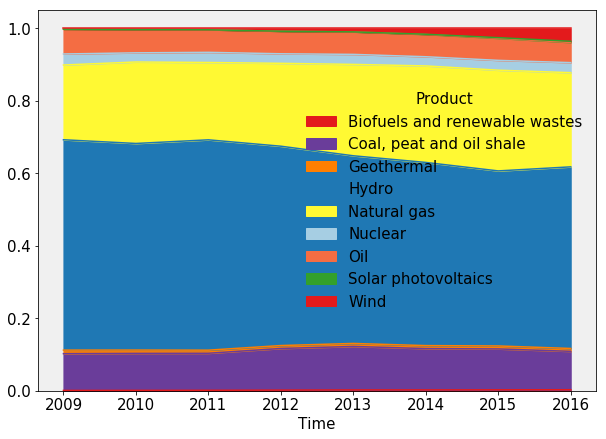

In [279]:
share_electricity_country_web_TWh_historical.iloc[:8].plot(kind='area', stacked=True, color = [color_dict_type_product.get(x, "#333333") for x in capacity_year_comissioning.columns])

#### Operational capacity by country and product

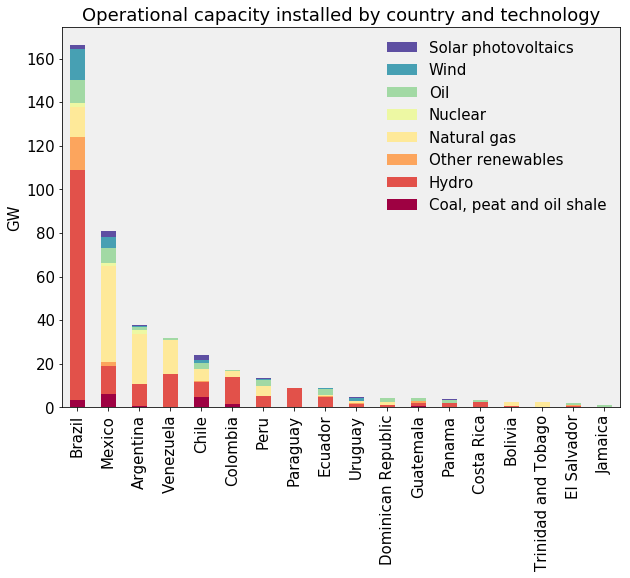

In [280]:
ax = capacity_country_operational_GW.unstack().assign(sum=lambda a:a.sum(axis=1)).sort_values('sum', ascending=False)[['Coal, peat and oil shale', 'Hydro', 'Other renewables', 'Natural gas', 'Nuclear', 'Oil', 'Wind', 'Solar photovoltaics']].plot(kind='bar', colormap='Spectral', rot= 0, stacked=True)
plt.title('Operational capacity installed by country and technology')
ax.set_ylabel("GW"), ax.set_xlabel("")
plt.xticks(rotation='vertical')
plt.legend(frameon=False, loc='best',   ncol=1)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
handles, labels = ax.get_legend_handles_labels()   #get the handles
ax.legend(reversed(handles), reversed(labels))
plt.savefig('../plots/capacity_country_operational.png', bbox_inches='tight')

#### Installed capacity by country and status

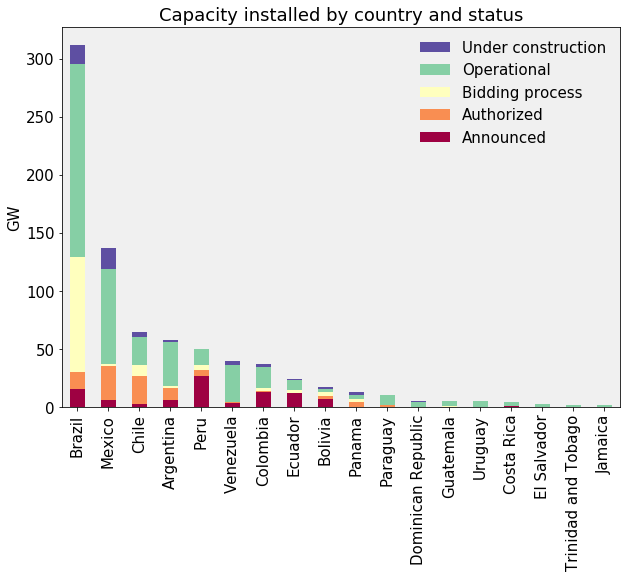

In [281]:
ax = capacity_country_status_GW.unstack().assign(sum=lambda a:a.sum(axis=1)).sort_values('sum', ascending=False)[['Announced', 'Authorized', 'Bidding process', 'Operational', 'Under construction']].plot(kind='bar', rot= 0, colormap='Spectral', stacked=True)
plt.title('Capacity installed by country and status')
ax.set_ylabel("GW"), ax.set_xlabel("")
plt.xticks(rotation='vertical')
plt.legend(frameon=False, loc='best',   ncol=1)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
handles, labels = ax.get_legend_handles_labels()   #get the handles
ax.legend(reversed(handles), reversed(labels))
plt.savefig('../plots/capacity_country_status.png', bbox_inches='tight')

#### Capacity by year of comissioning

In [282]:
capacity_year_comissioning

Product,"Coal, peat and oil shale",Natural gas,Oil,Hydro,Solar photovoltaics,Wind,Nuclear,Other renewables
year_of_comissioning,,,,,,,,
1900,NaN,NaN,0.00260,NaN,NaN,NaN,NaN,NaN
1901,NaN,NaN,0.00070,NaN,NaN,NaN,NaN,NaN
1902,NaN,NaN,NaN,0.00018,NaN,NaN,NaN,NaN
1903,NaN,NaN,NaN,0.01260,NaN,NaN,NaN,NaN
1905,NaN,NaN,NaN,0.06370,NaN,NaN,NaN,0.01400
1907,NaN,NaN,NaN,0.00062,NaN,NaN,NaN,NaN
1908,NaN,NaN,NaN,0.00386,NaN,NaN,NaN,NaN
1909,NaN,NaN,NaN,0.00833,NaN,NaN,NaN,NaN
1910,NaN,NaN,NaN,0.02099,NaN,NaN,NaN,NaN


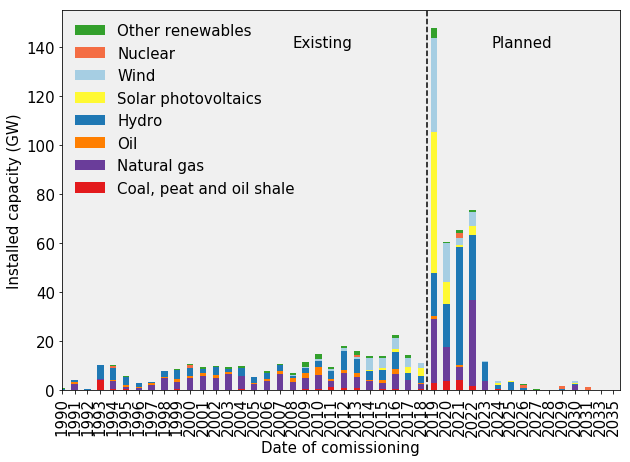

In [283]:
ax = capacity_year_comissioning.plot(kind = 'bar', stacked= 'true', color = [color_dict_type_product.get(x, "#333733") for x in capacity_year_comissioning.columns])
plt.title('')
ax.set_ylabel("Installed capacity (GW)")
ax.set_xlabel("Date of comissioning")
plt.xticks(rotation='vertical')
handles, labels = ax.get_legend_handles_labels()   #get the handles
ax.legend(loc='best', frameon=False, ncol=2)
ax.legend(reversed(handles), reversed(labels))
plt.axvline(x=110.5, color = 'black', linestyle='--')
ax.axes.text(115.5, 140, 'Planned')
ax.axes.text(100, 140, 'Existing')
ax.set_xlim([82, ax.get_xlim()[-1]])
plt.savefig('../plots/capacity_installed_yearly.png', bbox_inches='tight', dpi=1000)

In [504]:
## Reviewer 2 question 28
capacity_year_comissioning.reset_index()[['year_of_comissioning', 'Oil','Natural gas', 'Coal, peat and oil shale']].set_index('year_of_comissioning').tail()


Product,Oil,Natural gas,"Coal, peat and oil shale"
year_of_comissioning,,,
2029,NaN,0.200,NaN
2030,NaN,2.294,NaN
2031,NaN,NaN,NaN
2033,NaN,NaN,NaN
2035,NaN,NaN,NaN


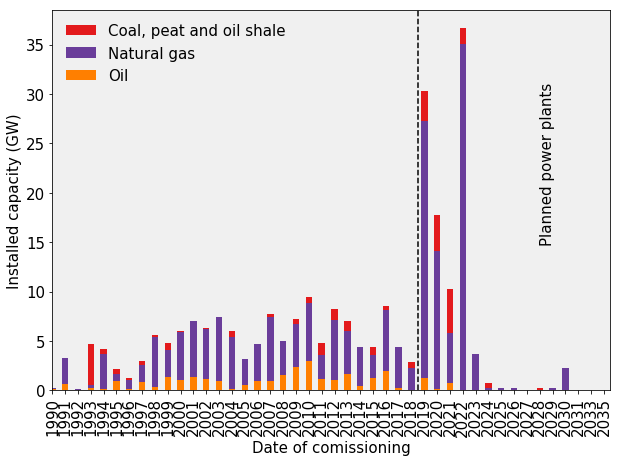

In [503]:
capacity_year_comissioning_fossil = capacity_year_comissioning.reset_index()[['year_of_comissioning', 'Oil','Natural gas', 'Coal, peat and oil shale']].set_index('year_of_comissioning')
ax = capacity_year_comissioning_fossil.plot(kind = 'bar', stacked= 'true', color = [color_dict_type_product.get(x, "#333733") for x in capacity_year_comissioning_fossil.columns])
plt.title('')
ax.set_ylabel("Installed capacity (GW)")
ax.set_xlabel("Date of comissioning")
plt.xticks(rotation='vertical')
handles, labels = ax.get_legend_handles_labels()   #get the handles
ax.legend(loc='best', frameon=False, ncol=2)
ax.legend(reversed(handles), reversed(labels))
plt.axvline(x=110.5, color = 'black', linestyle='--')
#ax.axes.text(115.5, 40, 'Planned')
ax.axes.text(120, 30, 'Planned power plants', color="black", rotation=90)
#ax.axes.text(100, 40, 'Existing')
ax.set_xlim([82, ax.get_xlim()[-1]])
plt.savefig('../plots/capacity_installed_yearly_fuel.png', bbox_inches='tight', dpi=1000)

#### Capacity installed over the time operational  + stopped + monthballed

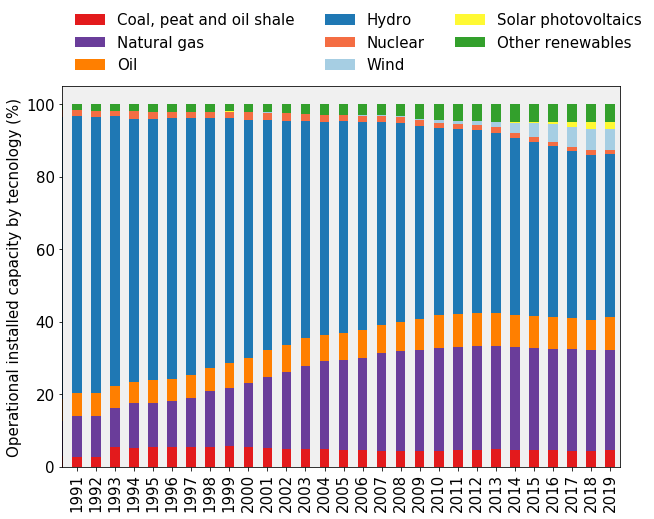

In [284]:
## Total capacity installed over the time operational + stopped + monthballed (3 categories for existing plants)
ax = capacity_over_time_year_comissioning_cum.plot(kind = 'bar', stacked= 'true', color = [color_dict_type_product.get(x, "#333333") for x in capacity_over_time_year_comissioning_cum.columns] )
plt.title('')
ax.set_ylabel("Operational installed capacity by tecnology (%)")
ax.set_xlabel("")
plt.xticks(rotation='vertical')
handles, labels = ax.get_legend_handles_labels()   #get the handles
ax.legend(reversed(handles), reversed(labels))
plt.legend(loc='best', frameon=False, ncol=3, bbox_to_anchor=(0, 1.0))
ax.set_xlim
ax.set_xlim([82.2, ax.get_xlim()[-1]])
plt.savefig('../plots/capacity_installed_overtime.png', bbox_inches='tight')

#### Committed emissions by year of comissioning

(89.5, 130.5)

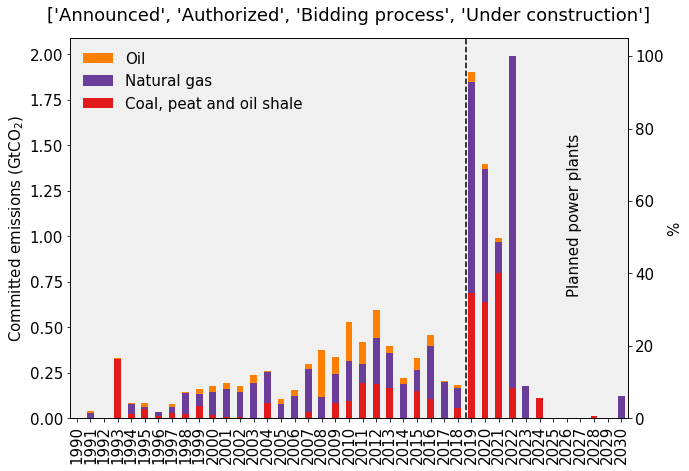

In [285]:
ax = committed_emissions_year_comissioning.plot(kind = 'bar', stacked= 'true', color = [color_dict_type_product.get(x, "#333333") for x in committed_emissions_year_comissioning.columns] )
plt.title(dict_pipeline, pad=17)
ax.set_ylabel("Committed emissions (GtCO$_2$)")
ax.set_xlabel("")
plt.xticks(rotation='vertical')
plt.legend(loc='best', frameon=True, ncol=1)
plt.axvline(x=118.6, color = 'black', linestyle='--')
#ax.axvspan(68.4, 80, facecolor='#ffffff', alpha=0.5)
handles, labels = ax.get_legend_handles_labels()   #get the handles
ax.legend(reversed(handles), reversed(labels))
ax_secondaryaxis = ax.twinx()
ax_secondaryaxis.plot(share_df[['share']].values, linestyle='', marker='', linewidth=2.0)
ax_secondaryaxis.set_ylabel("%")
ax.axes.text(126, 1.5, 'Planned power plants', color="black", rotation=90)
ax.set_xlim([89.5, ax.get_xlim()[-1]])
ax_secondaryaxis.set_ylim([0, ax_secondaryaxis.get_ylim()[-1]])
plt.savefig('../plots/committed_emissions_by_year_of_commisioning{0}.png'.format(dict_pipeline), bbox_inches='tight')
ax.get_xlim()

#### Cumulative committed emissions by year of comissioning

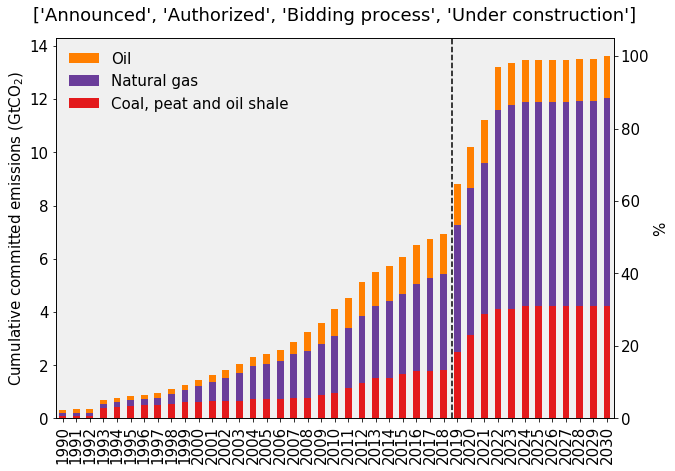

In [286]:
ax = cum_committed_emissions_year_comissioning.plot(kind = 'bar', stacked= 'true', color = [color_dict_type_product.get(x, "#333333") for x in cum_committed_emissions_year_comissioning.columns] )
plt.title(dict_pipeline, pad=17)
ax.set_ylabel("Cumulative committed emissions (GtCO$_2$)")
ax.set_xlabel("")
plt.xticks(rotation='vertical')
plt.legend(loc='best', frameon=True, ncol=1)
plt.axvline(x=118.6, color = 'black', linestyle='--')
#ax.axvspan(68.4, 80, facecolor='#ffffff', alpha=0.5)
handles, labels = ax.get_legend_handles_labels()   #get the handles
ax.legend(reversed(handles), reversed(labels))
ax_secondaryaxis = ax.twinx()
ax_secondaryaxis.plot(share_df[['share']].values, linestyle='', marker='', linewidth=2.0)
#ax.axes.text(122, 17.5, 'Planned', color="black")
ax_secondaryaxis.set_ylabel("%")
ax.set_xlim([89.5, ax.get_xlim()[-1]])
ax_secondaryaxis.set_ylim([0, ax_secondaryaxis.get_ylim()[-1]])
plt.savefig('../plots/cumulative_committed_emissions_by_year_of_commisioning{0}.png'.format(dict_pipeline), bbox_inches='tight')


#### Total committed emissions 2018-2060

In [287]:
pd.Series([committed_emissions_operational_sum, committed_emissions_pipeline_sum])

0    6.918074
1    6.701282
dtype: float64

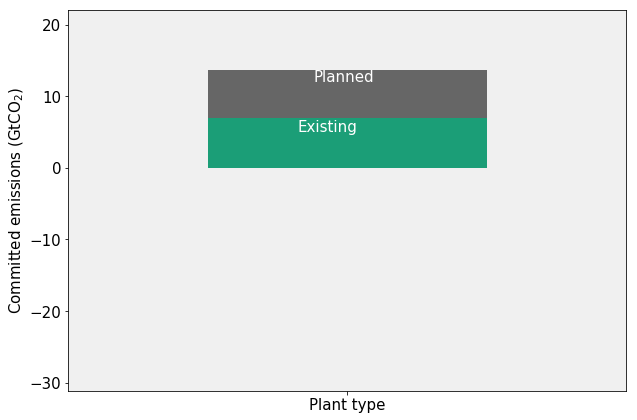

In [288]:
ax = pd.Series([committed_emissions_operational_sum, committed_emissions_pipeline_sum], index=['Operational', 'Pipeline']).to_frame().rename(columns = {0:'Plant type'}).T.plot(kind='bar', stacked=True, colormap='Dark2')
plt.title('', fontname="Lucida Sans Unicode")
ax.set_ylabel("Committed emissions (GtCO$_2$)")
ax.set_xlabel("")
plt.xticks(rotation='horizontal')
handles, labels = ax.get_legend_handles_labels()   #get the handles
ax.legend(reversed(handles), reversed(labels), loc='lower right', frameon=False, ncol=1)
ax.set_ylim(-31.126329706869065, 22)
ax.axes.text(-0.06, 12, 'Planned', color="white")
ax.axes.text(-0.09, 5, 'Existing', color="white")
ax.get_legend().remove()
plt.savefig('../plots/total_cum_com_emis_oper_and_pipeline.png', bbox_inches='tight') 

#### Cumulative committed emissions by country 2013-2060

In [289]:
## Reading committed emissions with emission factor calculated from balances and emissions IEA
committed_emissions_factor_balances_eia = pd.read_csv('../results_exported/committed_emissions_EIA_balances.csv') ## Replace the space by _ in the columns's name
committed_emissions_factor_balances_eia.sum(axis=1).sum()

17528.864346869737

In [290]:
committed_emissions.groupby(['plant_type', 'Product']).sum(axis=1).sum(axis=1).unstack('Product')/1000

Product,"Coal, peat and oil shale",Natural gas,Oil
plant_type,,,
Existing,1.822616,3.609371,1.486086
Planned,2.412997,4.188729,0.099556


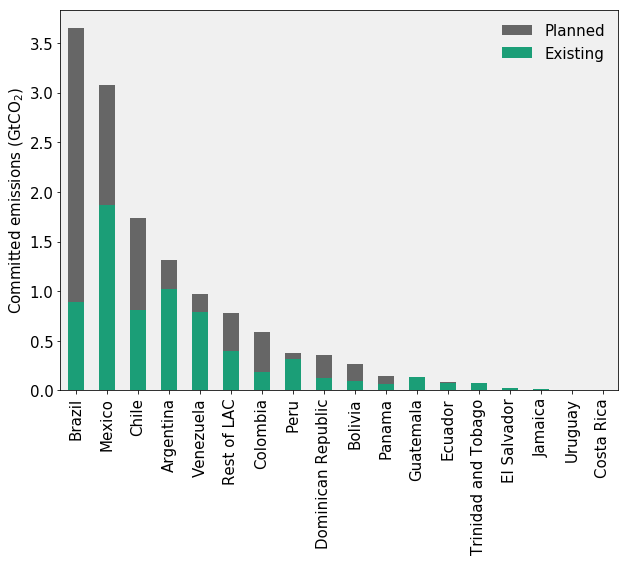

In [291]:
ax = (committed_emissions.groupby(['plant_type', 'Country']).sum().sum(axis=1).unstack()/1000).T.assign(sum=lambda a:a.sum(axis=1)).sort_values('sum', ascending=False)[['Existing', 'Planned']].plot(kind = 'bar', stacked= True, colormap='Dark2')
#plt.hlines(x=emissions_2018_and_2018_2064.emissions_2018_MtCO2, ymax=emissions_2018_and_2018_2064['emissions_2018_2064_GtCO2_existing'], ymin=emissions_2018_and_2018_2064['emissions_2018_2064_GtCO2_existing_planned'], color='grey', alpha=0.4)
plt.title('', fontname="Lucida Sans Unicode")
ax.set_ylabel("Committed emissions (GtCO$_2$)")
ax.set_xlabel("", fontname="Arial", fontsize=12)
plt.xticks(rotation='vertical')
plt.legend(title= "Status", loc='best', frameon=False, ncol=1)
plt.legend(["AAA", "BBB"])
handles, labels = ax.get_legend_handles_labels()   #get the handles
ax.legend(reversed(handles), reversed(labels))
plt.savefig('../plots/cum_com_emis_oper_and_pipeline_by_country.png', bbox_inches='tight')

#### Committed emissions by plant status (Historical + future)

In [292]:
committed_emissions_plant_status_product_hist.loc[2018:2064].cumsum()

Plant / Product,"Existing / Coal, peat and oil shale",Existing / Natural gas,Existing / Oil,"Planned / Coal, peat and oil shale",Planned / Natural gas,Planned / Oil
,,,,,,
2018,101.326638,171.398483,84.618161,0.000000,0.000000,0.000000
2019,194.659445,341.455622,169.154013,18.554440,33.102450,1.698772
2020,287.487973,510.038574,253.686510,54.347956,87.159836,4.202253
2021,379.284591,678.560046,338.217564,111.651157,146.178565,7.304281
2022,470.284239,847.081518,422.536304,173.522066,257.228324,10.406309
2023,559.735984,1015.538304,505.243097,235.392974,373.419683,13.508336
2024,641.782372,1166.493915,568.742439,300.236787,489.611042,16.619448
2025,722.764603,1317.195165,632.064254,365.080600,605.802400,19.730560
2026,803.746834,1464.148398,695.061878,429.924413,721.993759,22.841671


In [293]:
2046-2018

28

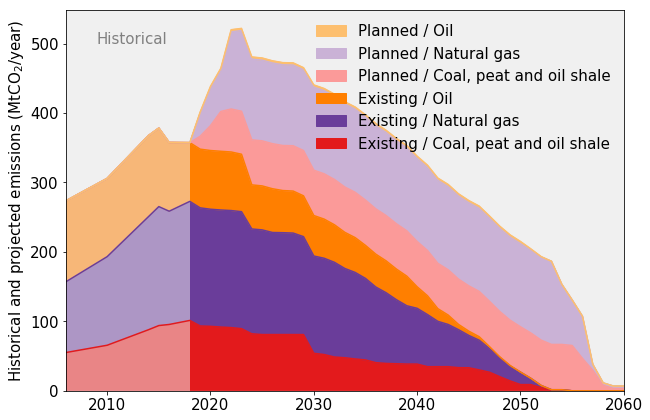

In [294]:
ax = committed_emissions_plant_status_product_hist.plot(kind='area', color = [color_dict_type_product.get(x, "#333333") for x in committed_emissions_plant_status_product.columns], rot= 0, stacked=True)
plt.title('')
ax.set_ylabel("Historical and projected emissions (MtCO$_2$/year)")
ax.set_xlabel("")
#plt.xticks(rotation='vertical')
plt.legend(loc='best', ncol=3)
handles, labels = ax.get_legend_handles_labels()   #get the handles
plt.xlim((2006, 2060))
#plt.axvline(x=2017, color = 'black')
ax.axes.text(2009, 500, 'Historical', color= 'grey')
ax.axvspan(2006, 2018, facecolor='#f0f0f0', alpha=0.5)
ax.legend(reversed(handles), reversed(labels))
#plt.legend(loc='t', frameon=False, ncol=1, bbox_to_anchor=(0, 1.0))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.savefig('../plots/com_emis_oper_and_pipeline_lam_over_time.png', bbox_inches='tight')

#### Committed emissions by plant status and product by country


In [295]:
committed_emissions_plant_status_product_country.index

MultiIndex(levels=[['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Jamaica', 'Mexico', 'Panama', 'Peru', 'Rest of LAC', 'Trinidad and Tobago', 'Uruguay', 'Venezuela'], ['Existing / Coal, peat and oil shale', 'Existing / Natural gas', 'Existing / Oil', 'Planned / Coal, peat and oil shale', 'Planned / Natural gas', 'Planned / Oil']],
           labels=[[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 6, 6, 6, 7, 7, 8, 9, 9, 10, 11, 11, 11, 12, 12, 13, 13, 13, 15, 16, 17, 17, 14, 14, 14, 0, 0, 1, 2, 2, 2, 3, 3, 3, 4, 4, 6, 6, 6, 7, 11, 11, 11, 12, 12, 13, 17, 14, 14, 14], [0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 4, 5, 4, 3, 4, 5, 3, 4, 5, 3, 4, 3, 4, 5, 4, 3, 4, 5, 3, 5, 4, 4, 3, 4, 5]],
           names=['Country', 'Plant / Product'])

Argentina
Bolivia
Brazil
Chile
Colombia
Dominican Republic
Ecuador
Jamaica
Mexico
Panama
!!!!Country Paraguay is MISSING. SKIPING
Peru
Trinidad and Tobago
Uruguay
Venezuela
Costa Rica
!!!!Country Cuba is MISSING. SKIPING
El Salvador
Guatemala
!!!!Country Haiti is MISSING. SKIPING
!!!!Country Honduras is MISSING. SKIPING
!!!!Country Nicaragua is MISSING. SKIPING
!!!!Country Other non-OECD Americas is MISSING. SKIPING
!!!!Country Curaçao is MISSING. SKIPING
Rest of LAC


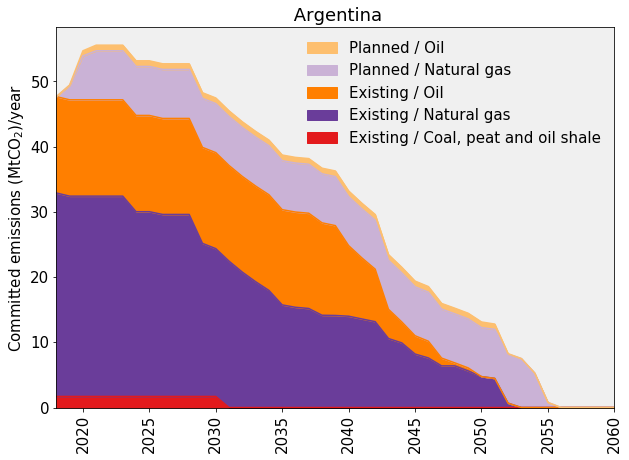

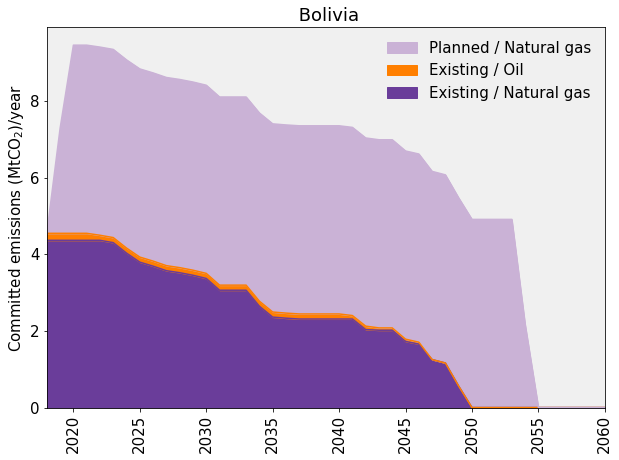

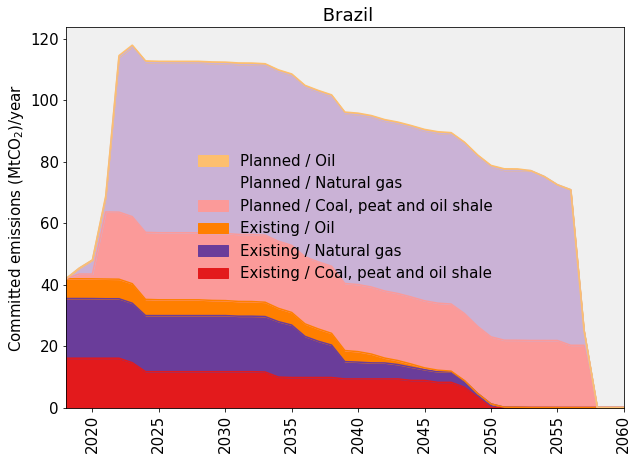

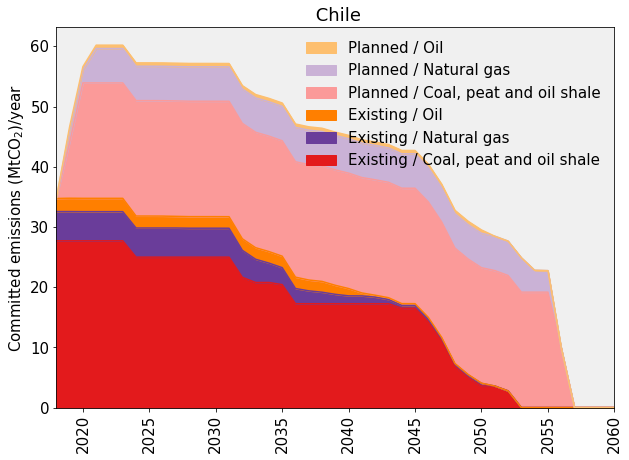

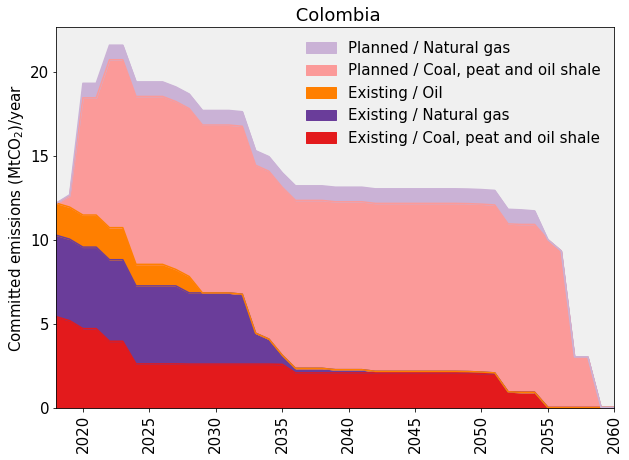

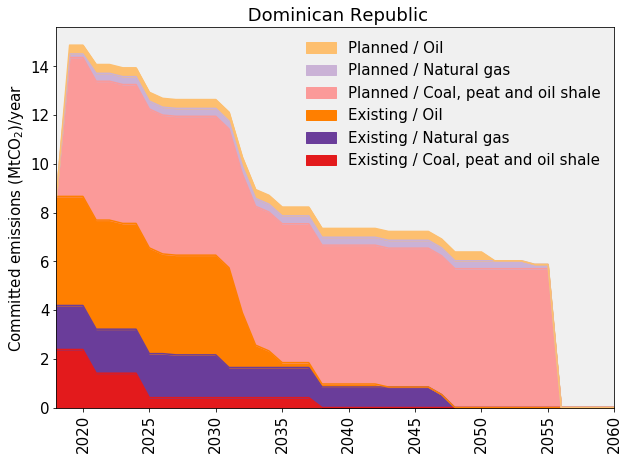

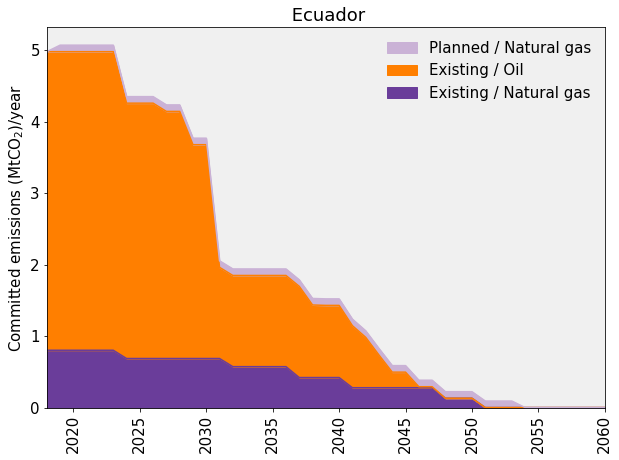

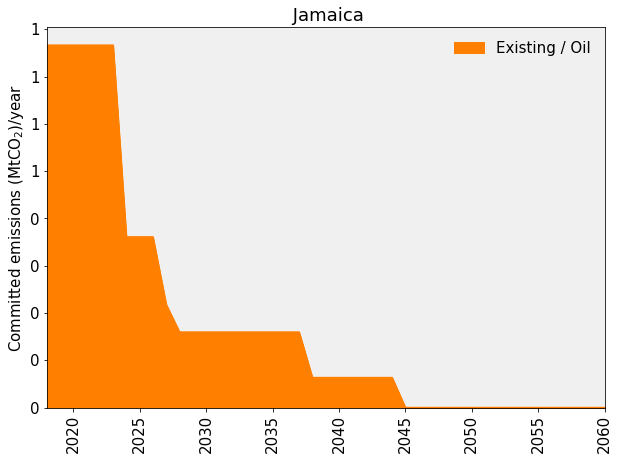

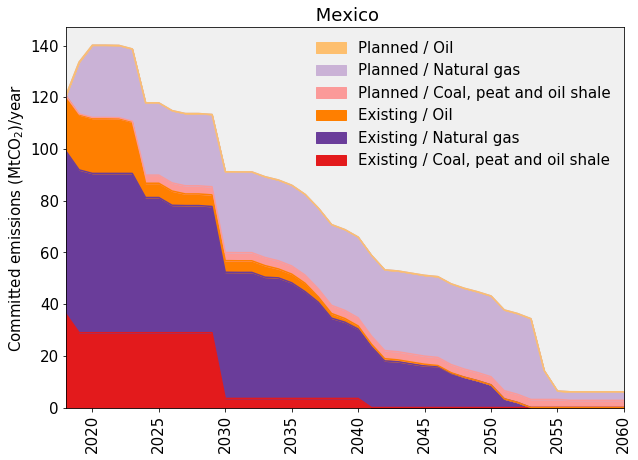

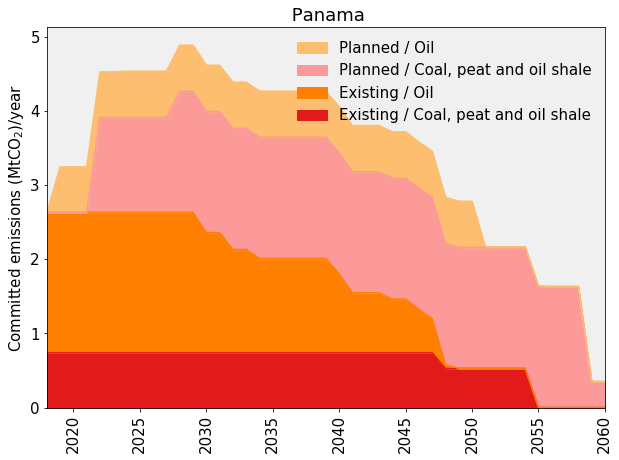

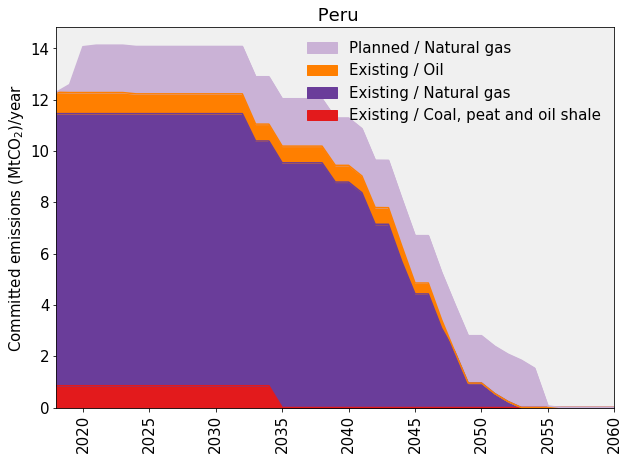

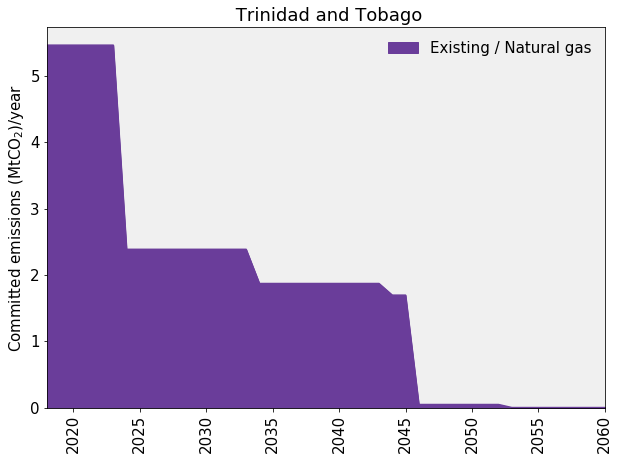

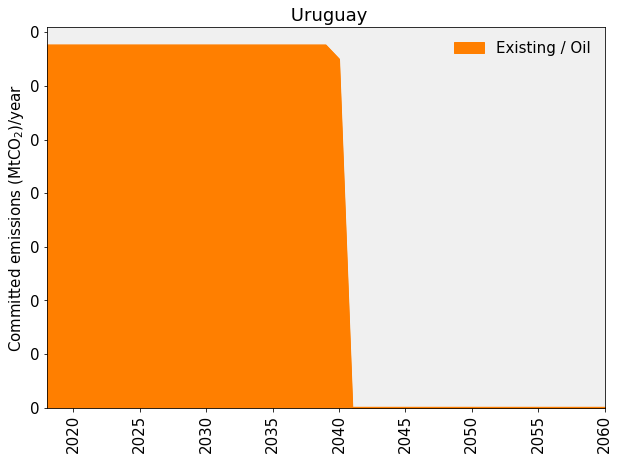

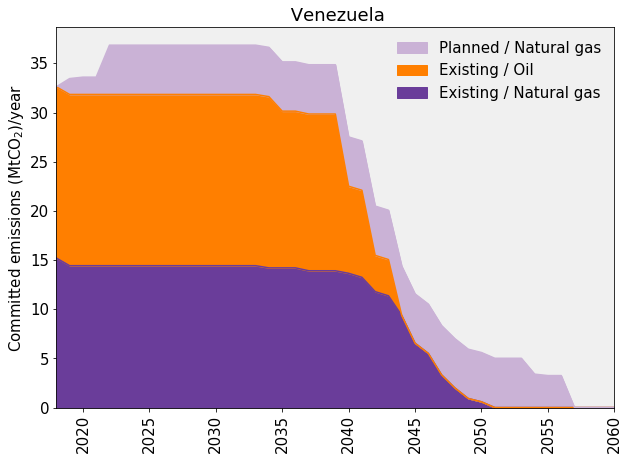

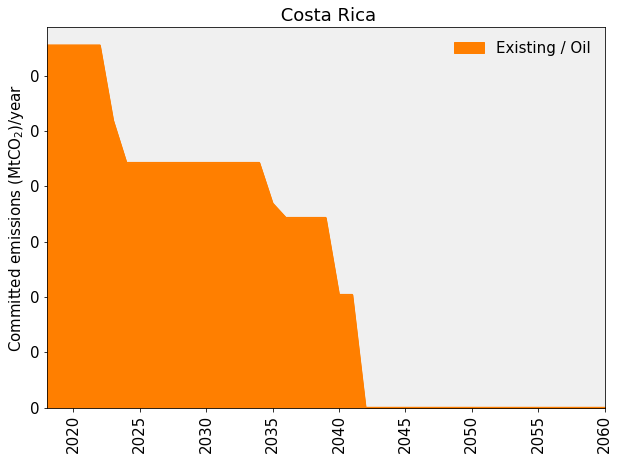

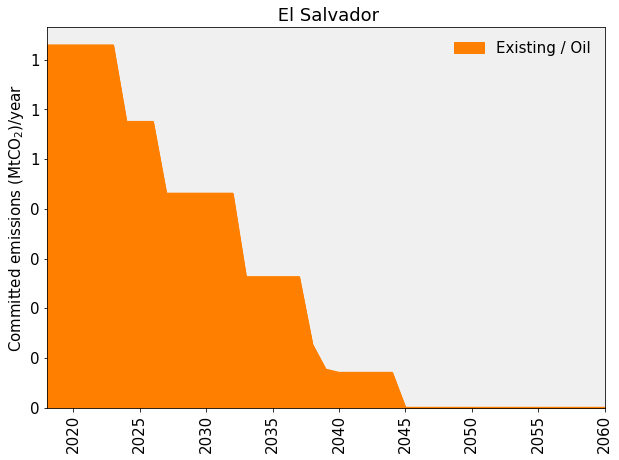

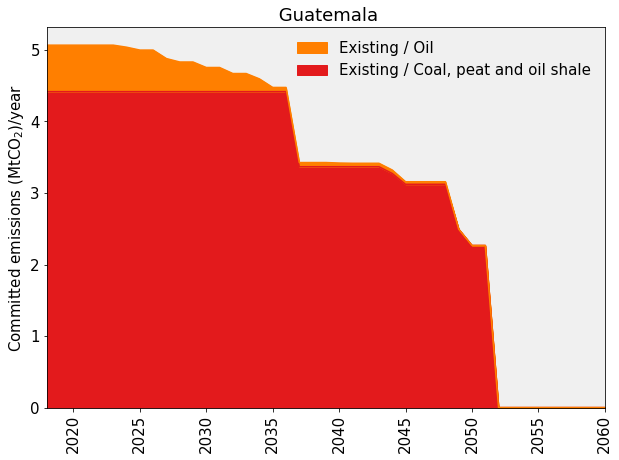

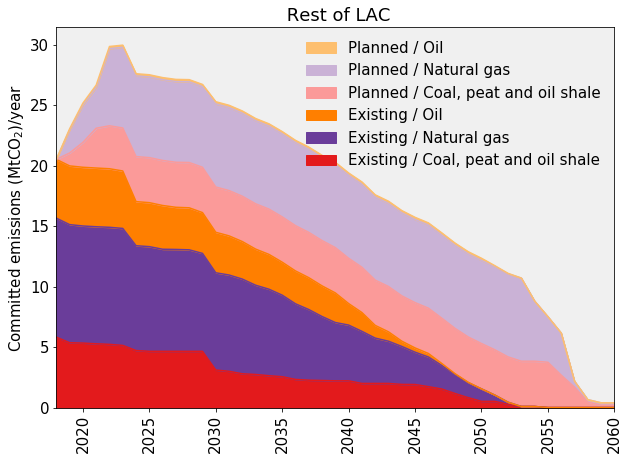

In [296]:
for c in countries_lac_all:
    try:
        ax6 = committed_emissions_plant_status_product_country.loc[c].T.plot(kind='area', rot= 0, stacked=True,color = [color_dict_type_product.get(x, "#333333") for x in committed_emissions_plant_status_product_country.loc[c].T.columns])
    except KeyError:
        print("!!!!Country {COU} is MISSING. SKIPING".format(COU=c))
        continue 
    print(c)
    plt.title('' + ' ' + c)
    ax6.set_ylabel("Committed emissions (MtCO$_2$)/year")
    plt.xticks(rotation='vertical')
    plt.xlim((2018, 2060))
    plt.legend(loc='right', frameon=False, ncol=1)  
    handles, labels = ax6.get_legend_handles_labels()   #get the handles
    ax6.legend(reversed(handles), reversed(labels))
    ax6.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    plt.savefig('../plots/committed_emissions_op_+_pipeline{0}.png'.format(c), bbox_inches='tight')  
#    plt.close()

#### Scenario 1.5 IPCC

(-0.5, 6.5)

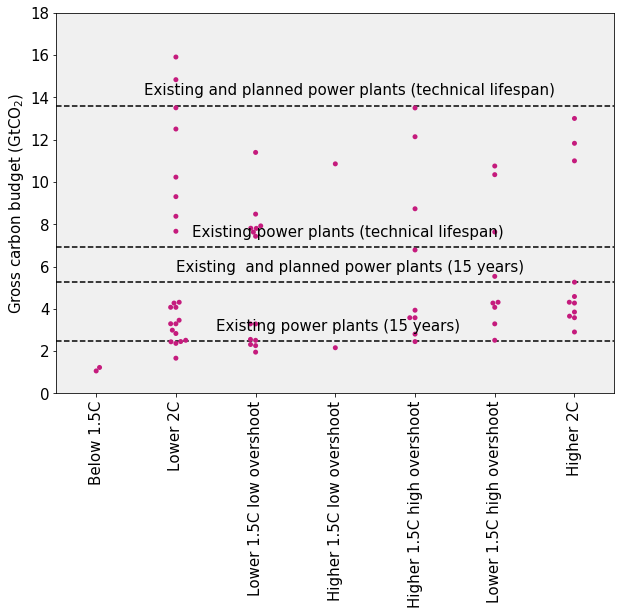

In [297]:
## Cumulative CO$_2$ emissions by category in R5LAM (2013-2060)
ax7 = R5_LAM_net_emissions_BECCs_gross
ax7 = sns.swarmplot(x="subcategory", y="gross_emissions", hue="subcategory",
              palette=["#c51b7d", "#c51b7d", "#c51b7d"], data = ax7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('')
plt.ylabel('Gross carbon budget (GtCO$_2$)')
plt.title('')
plt.xticks(rotation='vertical')
plt.legend(loc='upper left', frameon=False, ncol=1).remove()

plt.axhline(y=committed_emissions_operational_sum, color = 'black', linestyle='--')
plt.axhline(y=committed_emissions_pipeline_sum+committed_emissions_operational_sum, color = 'black', linestyle='--')

plt.axhline(y=2.4572019255843824, color = 'black', linestyle='--')
plt.axhline(y=2.4572019255843824+2.8200782927287236, color = 'black', linestyle='--')
#plt.axhline(y=6.9180736213080545+2.8200782927287236, color = 'black', linestyle='--')

#ax7.axes.text(2,committed_emissions_operational_sum+0.5, 'Existing power plants', color="black")
#ax7.axes.text(1.5, committed_emissions_pipeline_sum+committed_emissions_operational_sum+0.5, 'Existing and planned power plants', color="black")

ax7.axes.text(0.6, committed_emissions_pipeline_sum+committed_emissions_operational_sum+0.5, 'Existing and planned power plants (technical lifespan)', color="black")
ax7.axes.text(1.2, committed_emissions_operational_sum+0.5, 'Existing power plants (technical lifespan)', color="black")
ax7.axes.text(1.5, 2.4572019255843824+0.5, 'Existing power plants (15 years)', color="black")
ax7.axes.text(1, 2.4572019255843824+2.8200782927287236+0.5, 'Existing  and planned power plants (15 years)', color="black")
#ax7.axes.text(-0.32, 6.9180736213080545+2.8200782927287236+0.5, 'Existing power plant (technical lifespan) and planned power plant (15 years)', size=14, color="black")
#ax7.axes.text(0, 6.9180736213080545+4.307722409193077, 'Existing (technical lifespan) and oil and planned (technical) and gas (15 years)', color="black")
ax7.set_ylim(0, 18)
plt.savefig('../plots/cumulative_emissions_scenarios_R5LAM.png'.format(c), bbox_inches='tight')
ax7.get_xlim()

In [298]:
committed_emissions_operational_sum_15 = 2.4572019255843824
committed_emissions_pipeline_sum_15 = 2.8200782927287236
committed_emissions_operational_tecnical_lifespan_planned_15= 6.9180736213080545+2.8200782927287236
committed_emissions_operational_tecnical_lifespan_planned_15
committed_emissions_operational_tecnical_lifespan_planned_oil_coal_technical_gas_15= 6.9180736213080545+4.307722409193077

In [299]:
committed_emissions_operational_tecnical_lifespan_planned_oil_coal_technical_gas_15

11.225796030501131

(-0.5, 1.5)

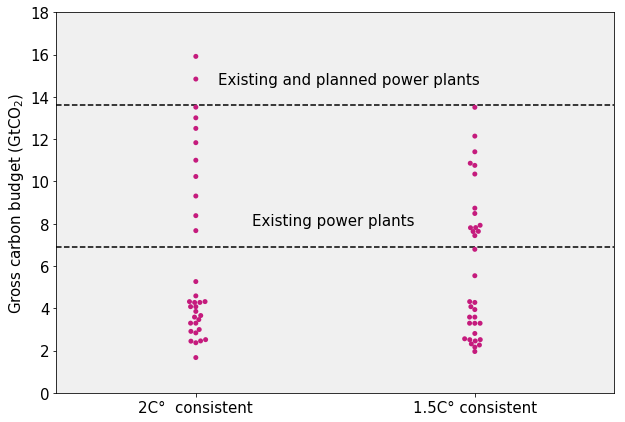

In [300]:
## Cumulative CO$_2$ emissions by category in R5LAM (2013-2060)
ax7 = R5_LAM_net_emissions_BECCs_gross
ax7 = sns.swarmplot(x="pathway_group", y="gross_emissions", hue="subcategory",
              palette=["#c51b7d", "#c51b7d", "#c51b7d"], data = ax7)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('')
plt.ylabel('Gross carbon budget (GtCO$_2$)')
plt.title('')
plt.xticks(rotation='horizontal')
plt.legend(loc='upper left', frameon=False, ncol=1).remove()
plt.axhline(y=committed_emissions_operational_sum, color = 'black', linestyle='--')
plt.axhline(y=committed_emissions_pipeline_sum+committed_emissions_operational_sum, color = 'black', linestyle='--')
ax7.axes.text(0.2, committed_emissions_operational_sum+1, 'Existing power plants', color="black")
ax7.axes.text(0.08, committed_emissions_pipeline_sum+committed_emissions_operational_sum+1, 'Existing and planned power plants', color="black")
ax7.set_ylim(0, 18)
plt.savefig('../plots/cumulative_emissions_scenarios_R5LAM_pathway_consistent.png'.format(c), bbox_inches='tight')
ax7.get_xlim()

No handles with labels found to put in legend.


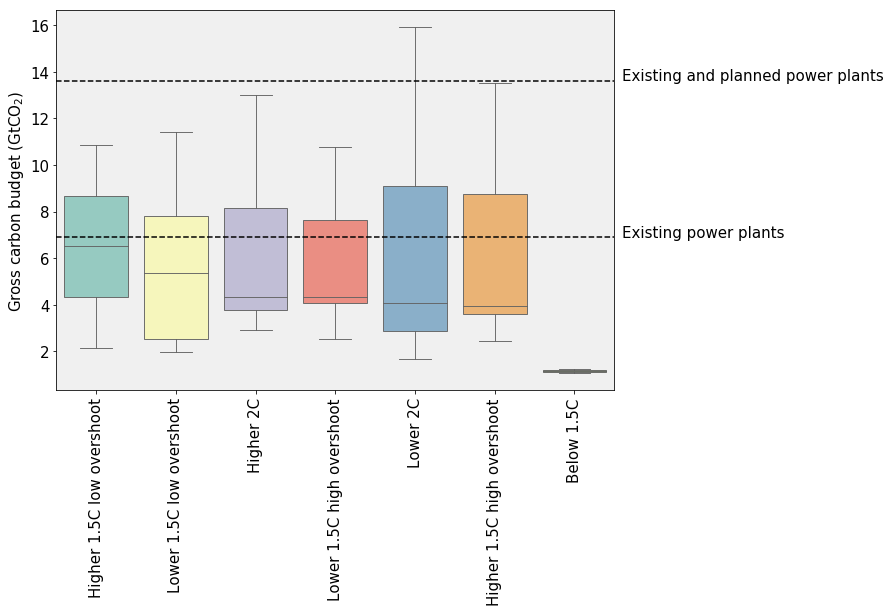

In [301]:
## Boxplot
#R5_LAM_net_emissions_BECCs_gross.boxplot(x="subcategory", y="gross_emissions")
ax = sns.boxplot(x="subcategory", y="gross_emissions", data = R5_LAM_net_emissions_BECCs_gross, linewidth=0.9, 
                 order=["Higher 1.5C low overshoot", "Lower 1.5C low overshoot", "Higher 2C", "Lower 1.5C high overshoot",
                        "Lower 2C", "Higher 1.5C high overshoot", "Below 1.5C"],
                palette="Set3")
plt.xlabel('')
plt.ylabel('Gross carbon budget (GtCO$_2$)')
plt.title('')
plt.xticks(rotation='vertical')
plt.legend(loc='upper left', frameon=False, ncol=1).remove()
plt.axhline(y=committed_emissions_operational_sum, color = 'black', linestyle='--')
plt.axhline(y=committed_emissions_pipeline_sum+committed_emissions_operational_sum, color = 'black', linestyle='--')
ax.axes.text(6.6, committed_emissions_operational_sum, 'Existing power plants', color="black")
ax.axes.text(6.6, committed_emissions_pipeline_sum+committed_emissions_operational_sum, 'Existing and planned power plants', color="black")
plt.savefig('../plots/boxplot_carbon_budgets_committed_emissions.png'.format(c), bbox_inches='tight')


In [302]:
R5_LAM_net_emissions_BECCs_gross

,model_scenario,subcategory,net_emissions,BECCs,gross_emissions,pathway_group
267,REMIND-MAgPIE 1.7-3.0SMP_1p5C_early,Below 1.5C,-11.687140,12.750470,1.063330,NaN
266,REMIND-MAgPIE 1.7-3.0SMP_1p5C_Sust,Below 1.5C,1.085850,0.142430,1.228280,NaN
272,REMIND-MAgPIE 1.7-3.0SMP_2C_early,Lower 2C,0.809330,0.857800,1.667130,2C° consistent
269,REMIND-MAgPIE 1.7-3.0SMP_1p5C_regul,Lower 1.5C low overshoot,1.953430,0.000420,1.953850,1.5C° consistent
271,REMIND-MAgPIE 1.7-3.0SMP_2C_Sust,Higher 1.5C low overshoot,2.160750,0.000420,2.161170,1.5C° consistent
302,WITCH-GLOBIOM 4.2ADVANCE_2020_1.5C-2100,Lower 1.5C low overshoot,-28.856120,31.116860,2.260740,1.5C° consistent
265,REMIND-MAgPIE 1.7-3.0SMP_1p5C_Def,Lower 1.5C low overshoot,-6.357460,8.672490,2.315030,1.5C° consistent
306,WITCH-GLOBIOM 4.2ADVANCE_2030_Price1.5C,Lower 2C,-28.749450,31.116860,2.367410,2C° consistent
307,WITCH-GLOBIOM 4.2ADVANCE_2030_WB2C,Lower 2C,-28.674460,31.116860,2.442400,2C° consistent
192,REMIND 1.7ADVANCE_2020_1.5C-2100,Higher 1.5C high overshoot,-10.148720,12.600710,2.451990,1.5C° consistent


### Reading results emissions pipeline by status

In [348]:
under_construction = pd.read_excel('../results_exported/committed_emissions_year_comissioning_planned[Under_construction].xlsx').set_index('year_of_comissioning')
under_construction_authorized = pd.read_excel('../results_exported/committed_emissions_year_comissioning_planned[Authorized_Under construction].xlsx').set_index('year_of_comissioning')
under_construction_authorized_bidding = pd.read_excel('../results_exported/committed_emissions_year_comissioning_planned[Authorized_Bidding process_Under_construction].xlsx').set_index('year_of_comissioning')
under_construction_authorized_bidding_announced = pd.read_excel('../results_exported/committed_emissions_year_comissioning_planned[Announced_Authorized_Bidding process_Under_construction].xlsx').set_index('year_of_comissioning')
under_construction
#.sum().sum()

,"Coal, peat and oil shale",Natural gas,Oil
year_of_comissioning,,,
2019,0.40726,0.776062,0.014884
2020,0.00000,0.158485,0.020355
2021,0.00000,0.014090,0.000000
2022,0.00000,0.000000,0.000000
2023,0.00000,0.000000,0.000000
2024,0.00000,0.000000,0.000000
2025,0.00000,0.000000,0.000000
2026,0.00000,0.000000,0.000000
2027,0.00000,0.000000,0.000000


In [304]:
authorized = under_construction_authorized.sum().sum() - under_construction.sum().sum()
authorized

1.4613396806123689

In [305]:
bidding = under_construction_authorized_bidding.sum().sum()-under_construction_authorized.sum().sum()
bidding

2.9621482212977575

In [306]:
announced = under_construction_authorized_bidding_announced.sum().sum()-under_construction_authorized_bidding.sum().sum()
announced

0.8881084590072419

In [307]:
bidding+under_construction.sum().sum()

4.353285407221325

In [308]:
under_construction_authorized_bidding_announced.sum()

Coal, peat and oil shale    2.412997
Natural gas                 4.188729
Oil                         0.101007
dtype: float64

In [309]:
4.188729/under_construction_authorized_bidding_announced.sum().sum()

0.6249284669795937

In [310]:
announced/under_construction_authorized_bidding_announced.sum().sum()
authorized/under_construction_authorized_bidding_announced.sum().sum()
bidding/under_construction_authorized_bidding_announced.sum().sum()
under_construction.sum().sum()/under_construction_authorized_bidding_announced.sum().sum()

0.2075477379791151

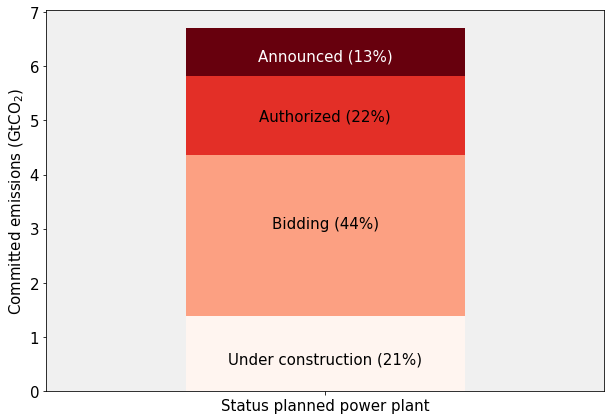

In [311]:
ax = pd.Series([under_construction.sum().sum(), bidding, authorized, announced], index=['Under Construction', 'Bidding', 'Authorized', 'Announced']).to_frame().rename(columns = {0:'Status planned power plant'}).T.plot(kind='bar', stacked=True, colormap='Reds')
plt.title('', fontname="Lucida Sans Unicode")
ax.set_ylabel("Committed emissions (GtCO$_2$)")
ax.set_xlabel("")
plt.xticks(rotation='horizontal')
handles, labels = ax.get_legend_handles_labels()   #get the handles
ax.legend(reversed(handles), reversed(labels), loc='lower right', frameon=False, ncol=1)
#ax.set_ylim(-31.126329706869065, 22)
ax.axes.text(0, 0.5, 'Under construction (21%)', color="black", horizontalalignment='center')
ax.axes.text(0, 3, 'Bidding (44%)', color="black", horizontalalignment='center')
ax.axes.text(0, 5, 'Authorized (22%)', color="black", horizontalalignment='center')
ax.axes.text(0, 6.1, 'Announced (13%)', color="white", horizontalalignment='center')
#ax.axes.text(-0.09, 5, 'Existing', color="white")
ax.get_legend().remove()
plt.savefig('../plots/committed_emissions_planned_status.png', bbox_inches='tight') 

### Decils by pathway group

In [312]:
R5_LAM_net_emissions_BECCs_gross.head()

,model_scenario,subcategory,net_emissions,BECCs,gross_emissions,pathway_group
267,REMIND-MAgPIE 1.7-3.0SMP_1p5C_early,Below 1.5C,-11.68714,12.75047,1.06333,NaN
266,REMIND-MAgPIE 1.7-3.0SMP_1p5C_Sust,Below 1.5C,1.08585,0.14243,1.22828,NaN
272,REMIND-MAgPIE 1.7-3.0SMP_2C_early,Lower 2C,0.80933,0.85780,1.66713,2C° consistent
269,REMIND-MAgPIE 1.7-3.0SMP_1p5C_regul,Lower 1.5C low overshoot,1.95343,0.00042,1.95385,1.5C° consistent
271,REMIND-MAgPIE 1.7-3.0SMP_2C_Sust,Higher 1.5C low overshoot,2.16075,0.00042,2.16117,1.5C° consistent


In [313]:
R5_LAM_net_emissions_BECCs_gross.query("pathway_group == '2C°  consistent'").gross_emissions.quantile([0,0.10,0.2,0.3,0.4,0.5,0.6,0.7,0.7,0.8,0.9,0.95,1])

0.00     1.667130
0.10     2.466344
0.20     2.941050
0.30     3.395936
0.40     3.811476
0.50     4.273720
0.60     4.368272
0.70     7.954655
0.70     7.954655
0.80    10.694058
0.90    12.907450
0.95    14.043606
1.00    15.913510
Name: gross_emissions, dtype: float64

In [347]:
R5_LAM_net_emissions_BECCs_gross.query("pathway_group == '1.5C° consistent'").gross_emissions.quantile([0,0.10,0.2,0.3,0.4,0.5,0.6,0.7,0.7,0.8,0.9,1])

0.0     1.953850
0.1     2.356118
0.2     2.539084
0.3     3.289205
0.4     3.652420
0.5     4.293615
0.6     7.305032
0.7     7.808579
0.7     7.808579
0.8     8.583408
0.9    10.828873
1.0    13.505270
Name: gross_emissions, dtype: float64

In [315]:
R5_LAM_net_emissions_BECCs_gross.query("pathway_group == '2C°  consistent'").gross_emissions.mean()

6.202898939393939

In [316]:
R5_LAM_net_emissions_BECCs_gross.query("pathway_group == '1.5C° consistent'").gross_emissions.mean()

5.881291323529413

In [317]:
1-(6.2/13.6), 1-(5.8/13.6)

(0.5441176470588235, 0.5735294117647058)

In [318]:
1-(6.2/8.2), 1-(5.8/8.2)

(0.24390243902439013, 0.2926829268292682)

In [319]:
1-(6.2/8.2), 1-(5.8/8.2)

(0.24390243902439013, 0.2926829268292682)

In [320]:
(2/6.2), (2.38/5.8)

(0.3225806451612903, 0.4103448275862069)

#### Years committed

In [321]:
emissions_2018_and_2018_2064.emissions_2018_MtCO2.sum()
emissions_2018_and_2018_2064.emissions_2018_2064_GtCO2_existing_planned.sum()
#emissions_2018_and_2018_2064.emissions_2018_2064_GtCO2_existing.sum()
(emissions_2018_and_2018_2064.emissions_2018_2064_GtCO2_existing_planned.sum()-emissions_2018_and_2018_2064.emissions_2018_2064_GtCO2_existing.sum())

6.701281640776296

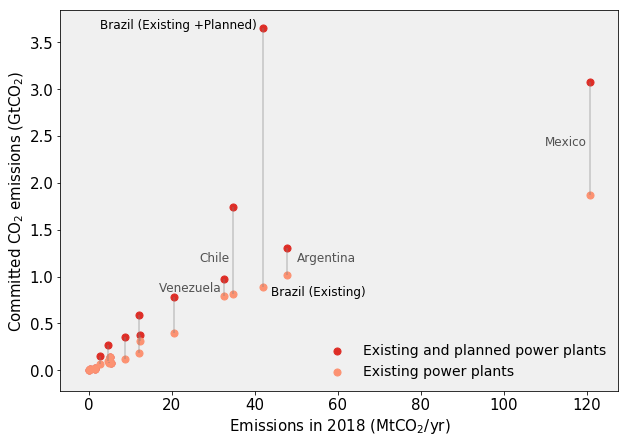

In [322]:
## All countries
ax =emissions_2018_and_2018_2064.plot.scatter(y="emissions_2018_2064_GtCO2_existing_planned", x="emissions_2018_MtCO2", s= 50, color='#de2d26', label='Existing and planned power plants') 
emissions_2018_and_2018_2064.plot.scatter(y="emissions_2018_2064_GtCO2_existing", x="emissions_2018_MtCO2", ax=ax, s= 50, legend='full', color='#fc9272', label='Existing power plants') 
plt.vlines(x=emissions_2018_and_2018_2064.emissions_2018_MtCO2, ymax=emissions_2018_and_2018_2064['emissions_2018_2064_GtCO2_existing'], ymin=emissions_2018_and_2018_2064['emissions_2018_2064_GtCO2_existing_planned'], color='grey', alpha=0.4)
plt.title('')
plt.xlabel("Emissions in 2018 (MtCO$_2$/yr)")
plt.ylabel("Committed CO$_2$ emissions (GtCO$_2$)")
ax.axes.text(44,  0.80, 'Brazil (Existing)',  color="black", horizontalalignment='left', fontsize='12')
ax.axes.text(40.5,  3.65, 'Brazil (Existing +Planned)',  color="black", horizontalalignment='right', fontsize='12')
ax.axes.text(120,  2.4, 'Mexico',  color="#525252", horizontalalignment='right', fontsize='12')
ax.axes.text(50,  1.16, 'Argentina',  color="#525252", horizontalalignment='left', fontsize='12')
ax.axes.text(34,  1.16, 'Chile',  color="#525252", horizontalalignment='right', fontsize='12')
ax.axes.text(32,  0.835, 'Venezuela',  color="#525252", horizontalalignment='right', fontsize='12')
plt.legend(loc='lower right', frameon=False, fontsize='14', ncol=1)
plt.savefig('../plots/Committed_years_emissions.png'.format(c), bbox_inches='tight')

In [ ]:
## Answer the reviwer 2

In [548]:
emissions_2018_and_2018_2064

,Country,emissions_2018_MtCO2,emissions_2018_2064_GtCO2_existing_planned,emissions_2018_2064_GtCO2_existing,years
0,Argentina,47.667000,1.309905,1.019277,27.0
1,Bolivia,4.548000,0.267622,0.095726,59.0
2,Brazil,41.923000,3.648830,0.889818,87.0
3,Chile,34.725000,1.739410,0.812298,50.0
4,Colombia,12.182000,0.587791,0.187070,48.0
5,Costa Rica,0.131000,0.002163,0.002163,17.0
6,Dominican Republic,8.666000,0.356963,0.123151,41.0
7,Ecuador,4.980000,0.083526,0.080328,17.0
8,El Salvador,1.459000,0.021121,0.021121,14.0
9,Guatemala,5.067000,0.139297,0.139297,27.0


Text(32,0.835,'Venezuela')

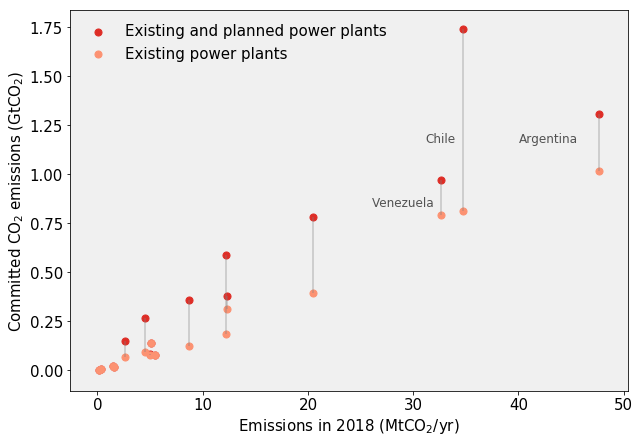

In [539]:
## Without Brazil and Mexico
ax=emissions_2018_and_2018_2064.drop([2,11], axis=0).plot.scatter(y="emissions_2018_2064_GtCO2_existing_planned", x="emissions_2018_MtCO2", s= 50, color='#de2d26', label='Existing and planned power plants')
emissions_2018_and_2018_2064.drop([2,11], axis=0).plot.scatter(y="emissions_2018_2064_GtCO2_existing", x="emissions_2018_MtCO2", ax=ax, s= 50, legend='full', color='#fc9272', label='Existing power plants')
plt.vlines(x=emissions_2018_and_2018_2064.drop([2,11], axis=0).emissions_2018_MtCO2, ymax=emissions_2018_and_2018_2064.drop([2,11], axis=0)['emissions_2018_2064_GtCO2_existing'], ymin=emissions_2018_and_2018_2064.drop([2,11], axis=0)['emissions_2018_2064_GtCO2_existing_planned'], color='grey', alpha=0.4)
plt.title('')
plt.xlabel("Emissions in 2018 (MtCO$_2$/yr)")
plt.ylabel("Committed CO$_2$ emissions (GtCO$_2$)")
ax.axes.text(40,  1.16, 'Argentina',  color="#525252", horizontalalignment='left', fontsize='12')
ax.axes.text(34,  1.16, 'Chile',  color="#525252", horizontalalignment='right', fontsize='12')
ax.axes.text(32,  0.835, 'Venezuela',  color="#525252", horizontalalignment='right', fontsize='12')

Text(120,2.4,'Mexico')

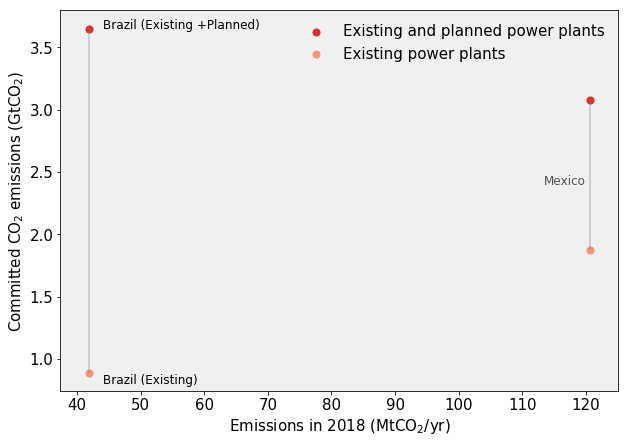

In [547]:
## Without Brazil and Mexico
ax=emissions_2018_and_2018_2064.iloc[[2,11]].plot.scatter(y="emissions_2018_2064_GtCO2_existing_planned", x="emissions_2018_MtCO2", s= 50, color='#de2d26', label='Existing and planned power plants')
emissions_2018_and_2018_2064.iloc[[2,11]].plot.scatter(y="emissions_2018_2064_GtCO2_existing", x="emissions_2018_MtCO2", ax=ax, s= 50, legend='full', color='#fc9272', label='Existing power plants')
plt.vlines(x=emissions_2018_and_2018_2064.iloc[[2,11]].emissions_2018_MtCO2, ymax=emissions_2018_and_2018_2064.iloc[[2,11]]['emissions_2018_2064_GtCO2_existing'], ymin=emissions_2018_and_2018_2064.iloc[[2,11]]['emissions_2018_2064_GtCO2_existing_planned'], color='grey', alpha=0.4)
plt.title('')
plt.xlabel("Emissions in 2018 (MtCO$_2$/yr)")
plt.ylabel("Committed CO$_2$ emissions (GtCO$_2$)")
ax.axes.text(44,  0.80, 'Brazil (Existing)',  color="black", horizontalalignment='left', fontsize='12')
ax.axes.text(44,  3.65, 'Brazil (Existing +Planned)',  color="black", horizontalalignment='left', fontsize='12')
ax.axes.text(120,  2.4, 'Mexico',  color="#525252", horizontalalignment='right', fontsize='12')

Text(0,0.5,'')

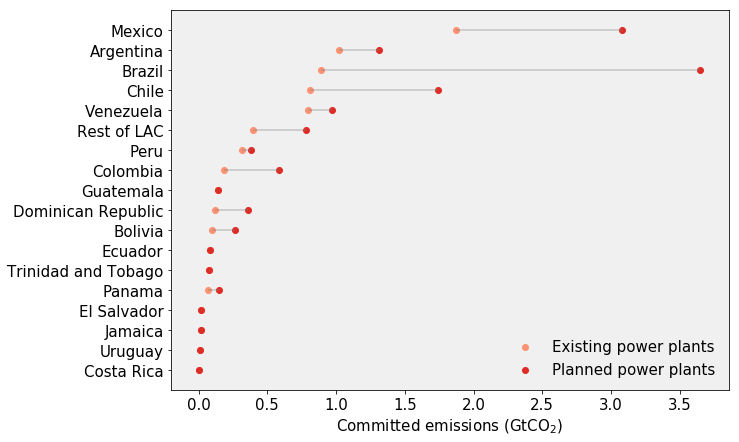

In [323]:
# Create a dataframe
emissions_2018_and_2018_2064_lollipop = emissions_2018_and_2018_2064
ordered_emissions_2018_and_2018_2064_lollipop = emissions_2018_and_2018_2064_lollipop.sort_values(by='emissions_2018_2064_GtCO2_existing')
my_range=range(1,len(emissions_2018_and_2018_2064_lollipop.index)+1)
# The vertical plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_emissions_2018_and_2018_2064_lollipop['emissions_2018_2064_GtCO2_existing'], xmax=ordered_emissions_2018_and_2018_2064_lollipop['emissions_2018_2064_GtCO2_existing_planned'], color='grey', alpha=0.4)
plt.scatter(ordered_emissions_2018_and_2018_2064_lollipop['emissions_2018_2064_GtCO2_existing'], my_range, color='#fc9272', alpha=1, label='Existing power plants')
plt.scatter(ordered_emissions_2018_and_2018_2064_lollipop['emissions_2018_2064_GtCO2_existing_planned'], my_range, color='#de2d26', alpha=1 , label='Planned power plants')
plt.legend()
# Add title and axis names
plt.yticks(my_range, ordered_emissions_2018_and_2018_2064_lollipop['Country'])
#plt.title("Comparison of the value 1 and the value 2", loc='left')
plt.xlabel("Committed emissions (GtCO$_2$)")
plt.ylabel("")
#plt.savefig('../plots/emissions_2018_and_2018_2064_lollipop.png'.format(c), bbox_inches='tight')

### Technical lifespan vs payback time

In [324]:
## Reading emissions technical lifespan and payback

In [325]:
emissions_technical_lifespan_payback = pd.read_csv('../results_exported/emissions_technical_lifespan_payback.csv') ## Replace the space by _ in the columns's name

In [326]:
emissions_technical_lifespan_payback

,lifespan,Plant type,"Coal, peat and oil shale",Natural Gas,Oil
0,Technical lifespan,Existing,1.822616,3.609371,1.486086
1,Technical lifespan,Planned,2.412997,4.188729,0.099556
2,Payback lifespan,Existing,1.302900,1.553590,1.045349
3,Payback lifespan,Planned,1.956484,2.393559,0.077778


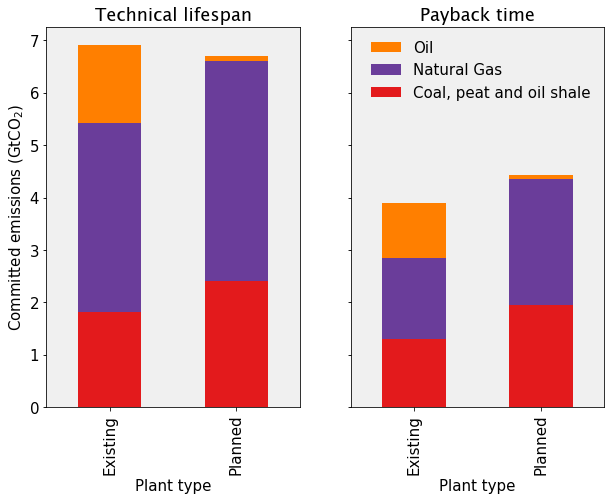

In [327]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
technical_lifespan = emissions_technical_lifespan_payback.set_index(['Plant type']).query("lifespan == 'Technical lifespan'").plot(kind='bar', stacked=True, ax=ax1, color = ['#e31a1c', '#6a3d9a', '#ff7f00'])
payback_time = emissions_technical_lifespan_payback.set_index(['Plant type']).query("lifespan == 'Payback lifespan'").plot(kind='bar', stacked=True, ax=ax2, color = ['#e31a1c', '#6a3d9a', '#ff7f00'])
ax1.set_title('Technical lifespan', fontname="Lucida Sans Unicode")
ax2.set_title('Payback time',  fontname="Lucida Sans Unicode")
ax1.set_ylabel("Committed emissions (GtCO$_2$)")
handles, labels = ax2.get_legend_handles_labels()   #get the handles
ax2.legend(reversed(handles), reversed(labels))
ax1.get_legend().remove()
plt.savefig('../plots/committed_emissions_technicallifespan_payback.png', bbox_inches='tight') 


### Investment

In [328]:
## committed emissions pipeline (GtCO2)
committed_emissions_pipeline_product.sum()/1000

6.7012816407763

In [329]:
## committed emissions existing plants (GtCO2)
committed_emissions_operational_product.sum()/1000

6.9180736213080545

In [330]:
## Mean carbon budget (GtCO2)
R5_LAM_net_emissions_BECCs_gross[['model_scenario', 'gross_emissions', 'pathway_group']].groupby(['pathway_group']).mean().reset_index()

,pathway_group,gross_emissions
0,1.5C° consistent,5.881291
1,2C° consistent,6.202899


In [331]:
## Electricity generation (TWh)
electricity_generation.sum(axis=1).sum()

80247.88800110416

In [332]:
capacity_over_time_year_comissioning[['Coal, peat and oil shale', 'Natural gas', 'Oil']].head()

Product,"Coal, peat and oil shale",Natural gas,Oil
year_of_comissioning,,,
1900,NaN,NaN,0.0026
1901,NaN,NaN,0.0007
1902,NaN,NaN,NaN
1903,NaN,NaN,NaN
1905,NaN,NaN,NaN


In [333]:
df.set_index('Unit_status').loc[['Operational', 'Synchronized']].year_of_comissioning.mean()

2002.9967008365736

In [334]:
## Mean year_decommissioning_expected
df.set_index('Unit_status').loc[['Operational', 'Synchronized']].year_decommissioning_expected.mean()

2045.7864969954048

In [335]:
## Mean year_of_comissioning
df.set_index('Unit_status').loc[['Announced', 'Authorized', 'Bidding process', 'Under construction']].year_of_comissioning.mean()

2019.990030097818

In [336]:
df.set_index('Unit_status').loc[['Announced', 'Authorized', 'Bidding process', 'Under construction']].year_decommissioning_expected.mean()

2056.7795334838224

In [337]:
## Installed capacity (TW)
installed_capacity_total = (df[df.apply(unit_status_pip_operational, axis=1)].set_index(["Unit_status"]).sum(level=["Unit_status"])[last]).sum(axis=1).sum()/1000000

In [338]:
## Total capacity installed over the time operational + stopped + monthballed
capacity_over_time_year_comissioning = df.set_index('Unit_status').loc[['Operational', 'Synchronized', 'Announced', 'Authorized', 'Bidding process', 'Under construction']].set_index('Product').loc[['Natural gas', 'Oil', 'Coal, peat and oil shale']].reset_index().astype({"year_of_comissioning": int})
capacity_over_time_year_comissioning = (capacity_over_time_year_comissioning[['year_of_comissioning', 'Product', 'Net_capacity_MW_']].pivot_table(index='year_of_comissioning', columns='Product', values='Net_capacity_MW_', aggfunc=np.sum).sort_values(by=['year_of_comissioning']))/1000
## replace the na by 0 to cumsum
capacity_over_time_year_comissioning_cum = capacity_over_time_year_comissioning.fillna(0).cumsum()
capacity_over_time_year_comissioning_cum.tail()

Product,"Coal, peat and oil shale",Natural gas,Oil
year_of_comissioning,,,
2026,31.25497,200.85739,36.93301
2027,31.25497,200.92739,36.93301
2028,31.45497,200.92739,36.93301
2029,31.45497,201.12739,36.93301
2030,31.45497,203.42139,36.93301


In [339]:
31.45497+203.42139+36.93301

271.80937

In [340]:
## Diverging stacked bar plot

In [341]:
sensitivity = pd.read_csv('../dictionary/test_sensitivity analysis.csv', sep= ',', squeeze='true')
sens = sensitivity.drop(columns = ['Lifespan'])
sens
width = 0.35 

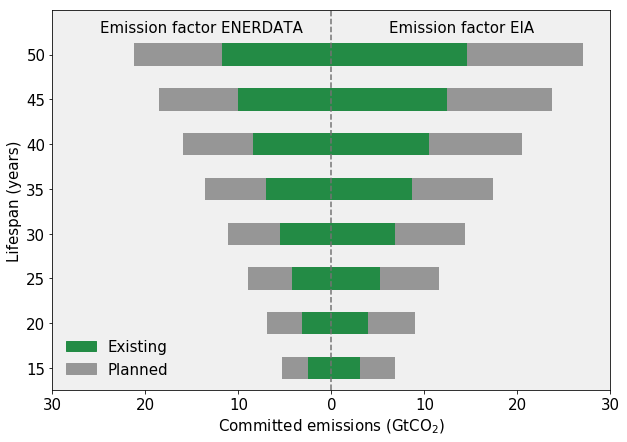

In [342]:
ax = sens.plot.barh(stacked=True, color = [color_dict_type_product.get(x, "#333333") for x in sens.columns])
ax.set_xticklabels([30,20,10,0,10,20,30])
ax.set_yticklabels([15,20,25,30,35,40,45,50])
plt.axvline(x=0, color = '#737373', linestyle='--')
plt.legend(loc='best', frameon=False, ncol=2, bbox_to_anchor=(0.5, 1.0))
ax.set_ylabel("Lifespan (years)")
plt.xlabel("Committed emissions (GtCO$_2$)")
ax.axes.text(-14, 7.5, 'Emission factor ENERDATA', color="black", horizontalalignment='center')
ax.axes.text(14, 7.5, 'Emission factor EIA', color="black", horizontalalignment='center')
ax.set_xlim(-30,30)
ax.set_ylim(-0.5,8)
#plt.legend(['', 'Existing', 'Planned'])
green_patch = mpatches.Patch(color='#238b45', label='Existing')
gray_patch = mpatches.Patch(color='#969696', label='Planned')
plt.legend(handles=[green_patch, gray_patch])
#plt.legend(handles=[gray_patch])
plt.savefig('../plots/diverging_sensitivity.png'.format(c), bbox_inches='tight')